In [1]:
import pandas as pd

pd.options.mode.chained_assignment = None  

#load and clean vacme data
vacme = pd.read_csv('Data_Private/cleaned_VacMe_Gemeinden_ueber_500.csv')
vacme = vacme.fillna('')
vacme.head()

Registration Geschlecht Vollstaendiger_Impfschutz Imfgruppe Wohngemeinde  \
0   2021-02-28  MAENNLICH                      WAHR         N         Thun   
1   2021-10-02   WEIBLICH                      WAHR         G         Thun   
2   2021-07-05   WEIBLICH                    FALSCH         F         Thun   
3   2021-10-03  MAENNLICH                      WAHR         N         Thun   
4   2021-01-15   WEIBLICH                      WAHR         A         Thun   

  Erstimpfung ODI Typ Erstimpfung Gemeinde Erstimpfung Zweitimpfung ODI Typ  \
0         Impfzentrum                 Thun  02.06.2021          Impfzentrum   
1         Impfzentrum                 Thun  03.07.2021          Impfzentrum   
2                                                                             
3         Impfzentrum                 Thun  03.08.2021          Impfzentrum   
4         Impfzentrum                 Bern  11.02.2021          Impfzentrum   

  Zweitimpfung Gemeinde Zweitimpfung  
0                  Thun   30.06.2021  
1                  Thun   02.08.2021  
2                                     
3                  Thun   31.08.2021  
4                  Bern   11.03.2021

In [2]:
# load community data
communities = pd.read_csv('Data_Public/gemeindeportraits.csv')
communities.head()

bfs_nummer   gemeinde_name  bevoelkerung_einwohner  \
0         301         Aarberg                    4632   
1         302     Bargen (BE)                    1025   
2         303  Grossaffoltern                    3031   
3         304        Kallnach                    2204   
4         305        Kappelen                    1414   

   bevoelkerung_veraenderung  bevoelkerung_bevoelkerungsdichte  \
0                       13.3                               584   
1                        4.6                               130   
2                        9.0                               201   
3                        3.9                               123   
4                       12.5                               129   

   bevoelkerung_auslaender  altersverteilung_0_19  altersverteilung_20_64  \
0                     12.9                   19.6                    59.0   
1                      9.3                   21.1                    59.7   
2                      6.0                   19.5                    60.4   
3                     10.1                   18.1                    60.1   
4                      5.7                   21.5                    62.0   

   altersverteilung_65  bevoelkerungsbewegung_heiratsziffer  ...  wahl_fdp  \
0                 21.3                                  4.8  ...  9.919586   
1                 19.2                                  3.0  ...  3.455095   
2                 20.1                                  4.3  ...  7.896241   
3                 21.9                                  4.5  ...  5.994442   
4                 16.5                                  4.9  ...  5.925121   

   wahl_cvp    wahl_sp   wahl_svp  wahl_evp_csp  wahl_glp   wahl_bdp  \
0  0.993350  14.825120  33.668160      3.817580  9.844459  12.190100   
1  0.697999  12.785016  40.309446      4.769660  6.235458  14.006515   
2  1.611405  13.702301  32.195941      3.862370  9.282550  13.955981   
3  1.100210  10.695854  41.325923      2.500992  7.287472  13.480406   
4  0.376066  11.950526  40.297510      2.983453  7.253886  17.482868   

   wahl_pda_sol   wahl_gps  wahl_rechtsparteien  
0      0.303292  10.256268             1.811403  
1      0.116333   9.806887             4.234528  
2      0.435901  11.719308             1.243390  
3      0.181478   9.045540             4.236375  
4      0.543206   7.655023             2.390105  

[5 rows x 43 columns]

In [3]:
community_sizes = {}
for index, row in communities.iterrows():
    community_sizes[row['gemeinde_name']] = row['bevoelkerung_einwohner']
community_sizes

{'Aarberg': 4632,
 'Bargen (BE)': 1025,
 'Grossaffoltern': 3031,
 'Kallnach': 2204,
 'Kappelen': 1414,
 'Lyss': 15525,
 'Meikirch': 2473,
 'Radelfingen': 1287,
 'Rapperswil (BE)': 2560,
 'Schüpfen': 3773,
 'Seedorf (BE)': 3084,
 'Aarwangen': 4620,
 'Auswil': 440,
 'Bannwil': 661,
 'Bleienbach': 713,
 'Busswil bei Melchnau': 181,
 'Gondiswil': 728,
 'Langenthal': 16066,
 'Lotzwil': 2628,
 'Madiswil': 3275,
 'Melchnau': 1489,
 'Oeschenbach': 221,
 'Reisiswil': 174,
 'Roggwil (BE)': 4056,
 'Rohrbach': 1484,
 'Rohrbachgraben': 394,
 'Rütschelen': 566,
 'Schwarzhäusern': 525,
 'Thunstetten': 3425,
 'Ursenbach': 879,
 'Wynau': 1660,
 'Bern': 134591,
 'Bolligen': 6286,
 'Bremgarten bei Bern': 4369,
 'Kirchlindach': 3214,
 'Köniz': 42044,
 'Muri bei Bern': 13023,
 'Oberbalm': 849,
 'Stettlen': 3137,
 'Vechigen': 5345,
 'Wohlen bei Bern': 9266,
 'Zollikofen': 10471,
 'Ittigen': 11306,
 'Ostermundigen': 17772,
 'Biel/Bienne': 55602,
 'Evilard': 2654,
 'Arch': 1629,
 'Büetigen': 870,
 'Büren an d

In [4]:
#clean vacme data
#remove records from small communities or other countries. All resident communities are valid!
vacme = vacme[(vacme['Wohngemeinde'] != 'Kleine Gemeinde') & (vacme['Wohngemeinde'] != '')]

#remove records with no first vaccination.
#attention, here we have Biel instead of Biel/Bienne and Langnau instead of Langnau im Emmental.
vacme = vacme[vacme['Erstimpfung'] != '']

#remove invalid gender entries
vacme = vacme[(vacme['Geschlecht'] == 'MAENNLICH') | (vacme['Geschlecht'] == 'WEIBLICH') | (vacme['Geschlecht'] == 'ANDERE')]

vacme.shape

(686682, 11)

In [5]:
import datetime

datetime.date(2021, 1, 4).isocalendar()[1]

def calendarweek(datestring):
    year = datestring[6:]
    month = datestring[3:5]
    day = datestring[0:2]
    return datetime.date(int(year), int(month), int(day)).isocalendar()[1]

for index, row in vacme[:10].iterrows():
    community = row['Wohngemeinde']
    vacc_date = row['Erstimpfung']
    print(community + ', ' + vacc_date + ', ' + str(calendarweek(vacc_date)))

Thun, 02.06.2021, 22
Thun, 03.07.2021, 26
Thun, 03.08.2021, 31
Thun, 11.02.2021, 6
Thun, 04.02.2021, 5
Thun, 15.09.2021, 37
Thun, 02.05.2021, 17
Thun, 22.04.2021, 16
Thun, 12.06.2021, 23
Thun, 17.06.2021, 24


In [10]:
stats = {}
total_population = 0

communities_with_vaccinations = vacme['Wohngemeinde'].unique().tolist()

for community in communities_with_vaccinations:
    #these two are spelled differently
    if community == 'Biel':
        total_population += community_sizes['Biel/Bienne']
    elif community == 'Langnau':
        total_population += community_sizes['Langnau im Emmental']
    else:
        total_population += community_sizes[community]
    stats[community] = {}
    for i in range(54):
        stats[community][i] = 0
stats['kanton'] = {}
for i in range(54):
    stats['kanton'][i] = 0

In [11]:
for index, row in vacme.iterrows():
    community = row['Wohngemeinde']
    week = calendarweek(row['Erstimpfung'])
    stats[community][week] += 1
    stats['kanton'][week] += 1
    
stats

{'Thun': {0: 0,
  1: 1,
  2: 337,
  3: 547,
  4: 432,
  5: 528,
  6: 609,
  7: 246,
  8: 202,
  9: 268,
  10: 778,
  11: 465,
  12: 534,
  13: 627,
  14: 799,
  15: 1111,
  16: 1304,
  17: 1852,
  18: 2059,
  19: 1749,
  20: 1237,
  21: 1119,
  22: 1283,
  23: 1597,
  24: 1864,
  25: 813,
  26: 575,
  27: 397,
  28: 368,
  29: 318,
  30: 319,
  31: 309,
  32: 357,
  33: 459,
  34: 498,
  35: 404,
  36: 498,
  37: 604,
  38: 421,
  39: 316,
  40: 191,
  41: 276,
  42: 217,
  43: 149,
  44: 103,
  45: 75,
  46: 0,
  47: 0,
  48: 0,
  49: 0,
  50: 0,
  51: 1,
  52: 1,
  53: 2},
 'Evilard': {0: 0,
  1: 0,
  2: 5,
  3: 26,
  4: 38,
  5: 40,
  6: 63,
  7: 8,
  8: 6,
  9: 9,
  10: 32,
  11: 44,
  12: 25,
  13: 42,
  14: 53,
  15: 84,
  16: 85,
  17: 81,
  18: 172,
  19: 112,
  20: 67,
  21: 45,
  22: 65,
  23: 100,
  24: 86,
  25: 37,
  26: 26,
  27: 23,
  28: 24,
  29: 19,
  30: 21,
  31: 24,
  32: 25,
  33: 33,
  34: 36,
  35: 7,
  36: 28,
  37: 43,
  38: 16,
  39: 9,
  40: 10,
  41: 14,
  

In [16]:
stats_relative = {}
for community in communities_with_vaccinations:
    stats_relative[community] = {}
    for i in range(54):
        stats_relative[community][i] = stats[community][i] / community_sizes[community]

stats_relative['kanton'] = {}
for i in range(54):
    stats_relative['kanton'][i] = stats['kanton'][i] / total_population

stats_relative

{'Thun': {0: 0.0,
  1: 2.291895856252292e-05,
  2: 0.007723689035570224,
  3: 0.012536670333700036,
  4: 0.009900990099009901,
  5: 0.0121012101210121,
  6: 0.013957645764576457,
  7: 0.005638063806380638,
  8: 0.004629629629629629,
  9: 0.006142280894756142,
  10: 0.01783094976164283,
  11: 0.010657315731573157,
  12: 0.012238723872387239,
  13: 0.01437018701870187,
  14: 0.018312247891455812,
  15: 0.02546296296296296,
  16: 0.029886321965529886,
  17: 0.04244591125779244,
  18: 0.04719013568023469,
  19: 0.04008525852585258,
  20: 0.02835075174184085,
  21: 0.025646314631463146,
  22: 0.029405023835716904,
  23: 0.0366015768243491,
  24: 0.04272093876054272,
  25: 0.018633113311331134,
  26: 0.013178401173450678,
  27: 0.0090988265493216,
  28: 0.008434176751008434,
  29: 0.007288228822882288,
  30: 0.007311147781444811,
  31: 0.007081958195819582,
  32: 0.008182068206820683,
  33: 0.01051980198019802,
  34: 0.011413641364136414,
  35: 0.009259259259259259,
  36: 0.01141364136413641

In [29]:
stats_cumulative = {}

#this time first the canton for no real reason
stats_cumulative['kanton'] = {}
for i in range(46):
    stats_cumulative['kanton'][i] = stats_relative['kanton'][i]
    for j in range(i):
        stats_cumulative['kanton'][i] += stats_relative['kanton'][j]
    stats_cumulative['kanton'][i] *= 100
    

for community in communities_with_vaccinations:
    stats_cumulative[community] = {}
    for i in range(46):
        stats_cumulative[community][i] = stats_relative[community][i]
        #ignoring the very very few vaccinations from the end of 2020
        for j in range(i):
            stats_cumulative[community][i] += stats_relative[community][j]
        stats_cumulative[community][i] *= 100
            
stats_cumulative

{'kanton': {0: 0.0,
  1: 0.0004912899209907549,
  2: 0.41730165888954723,
  3: 1.3663755282594876,
  4: 2.36104110229737,
  5: 3.423995975352968,
  6: 4.485771752598187,
  7: 5.535167023834439,
  8: 6.051610988779921,
  9: 6.5361211088610025,
  10: 7.852385065179435,
  11: 8.981565819584587,
  12: 9.945476644568446,
  13: 11.287680708715191,
  14: 12.836521313630644,
  15: 15.491943336585676,
  16: 18.519468345699103,
  17: 22.36381197745176,
  18: 27.15231657936445,
  19: 31.265101023946457,
  20: 34.8123125114839,
  21: 37.83590720122941,
  22: 40.727148386260005,
  23: 44.44866953776497,
  24: 48.500337516175726,
  25: 50.313885130520994,
  26: 51.801216237328404,
  27: 52.94238446580574,
  28: 53.91425418750965,
  29: 54.867160118263314,
  30: 55.627676915957004,
  31: 56.27018587462871,
  32: 57.05615149022971,
  33: 58.03863307422703,
  34: 59.23836306128645,
  35: 60.03140325174974,
  36: 61.20725654864901,
  37: 62.72406505071587,
  38: 63.89588977026301,
  39: 64.6890282187104

<ipython-input-57-b48a1f24e6b7>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure(figsize=(12, 8), dpi=80)


ValueError: Format ' stephan' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

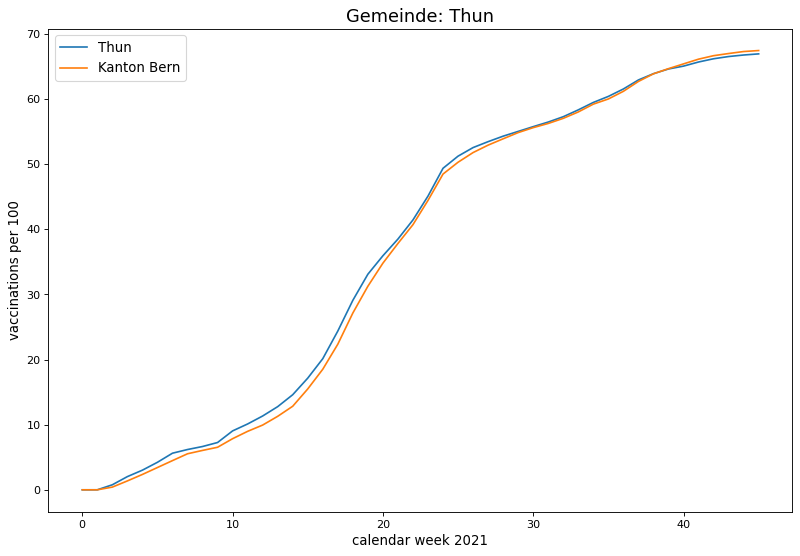

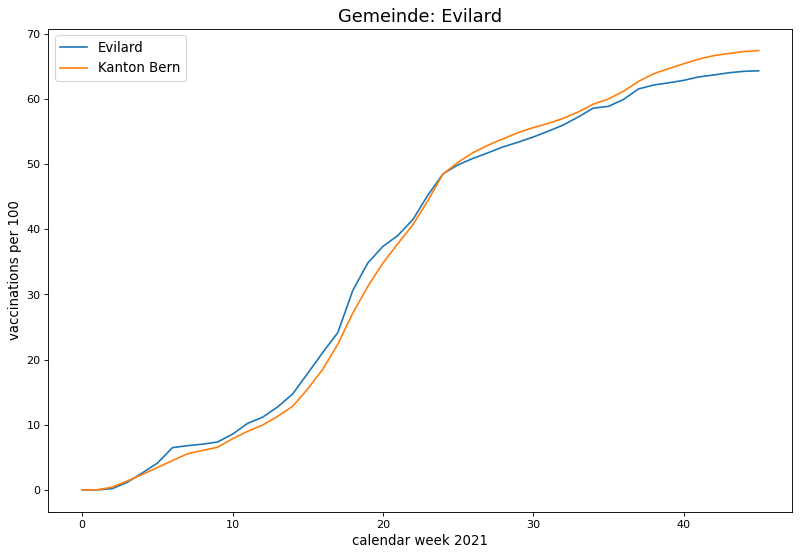

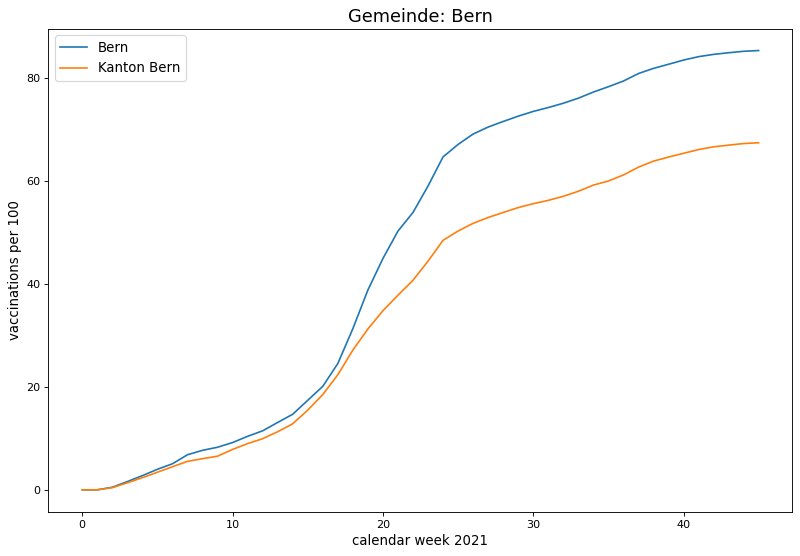

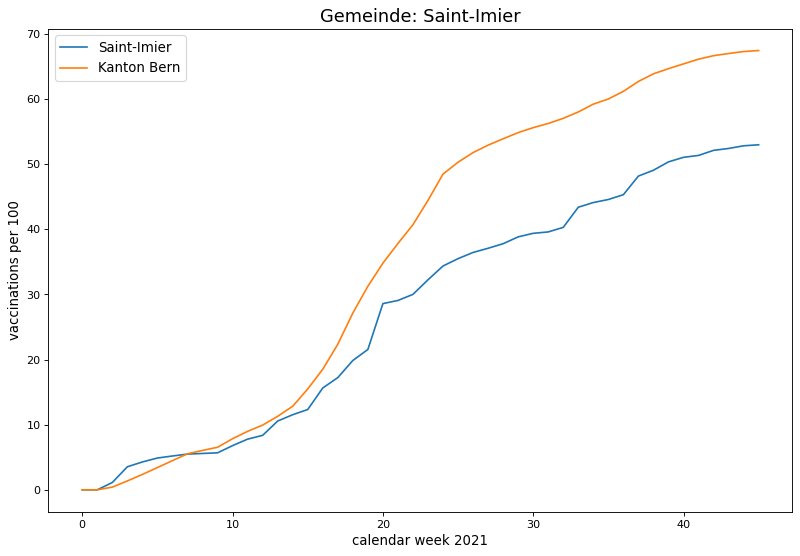

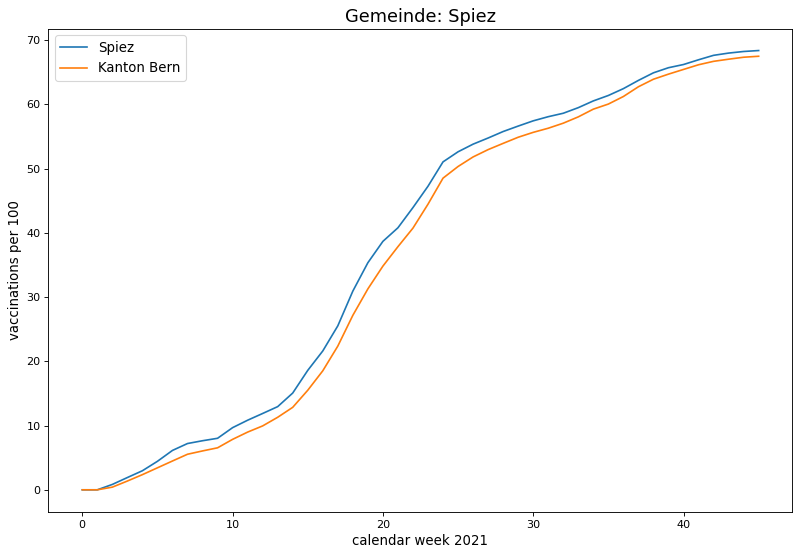

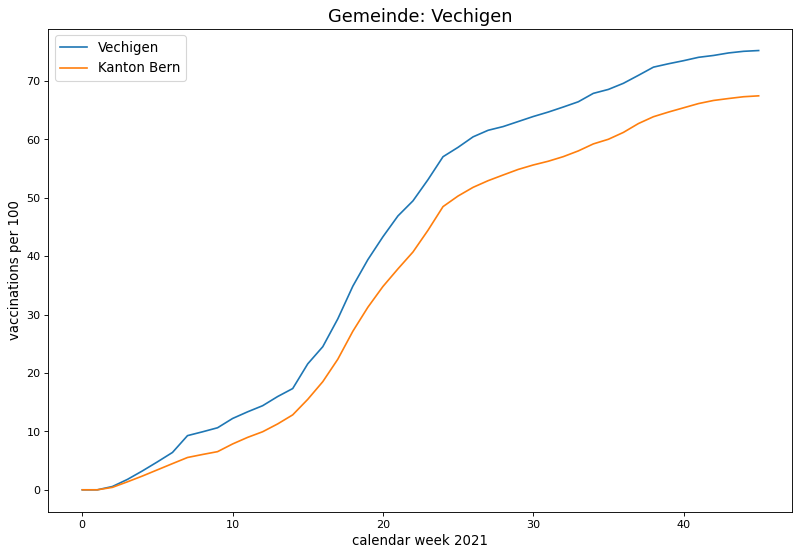

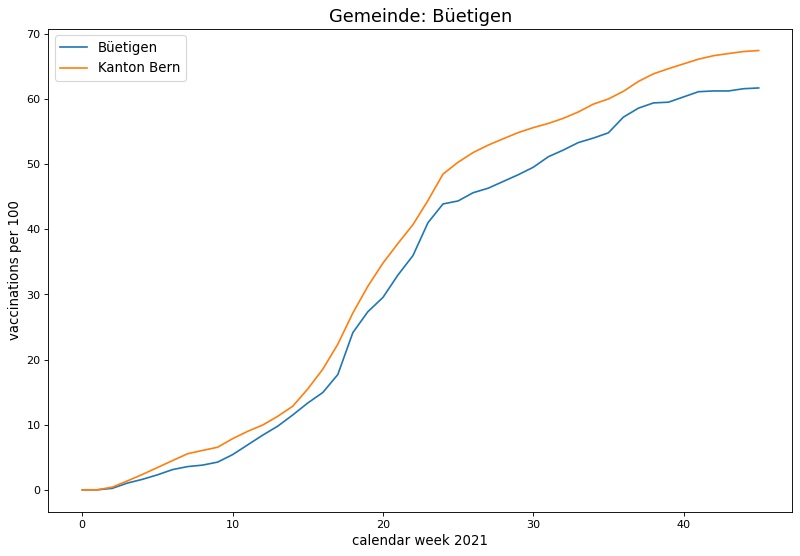

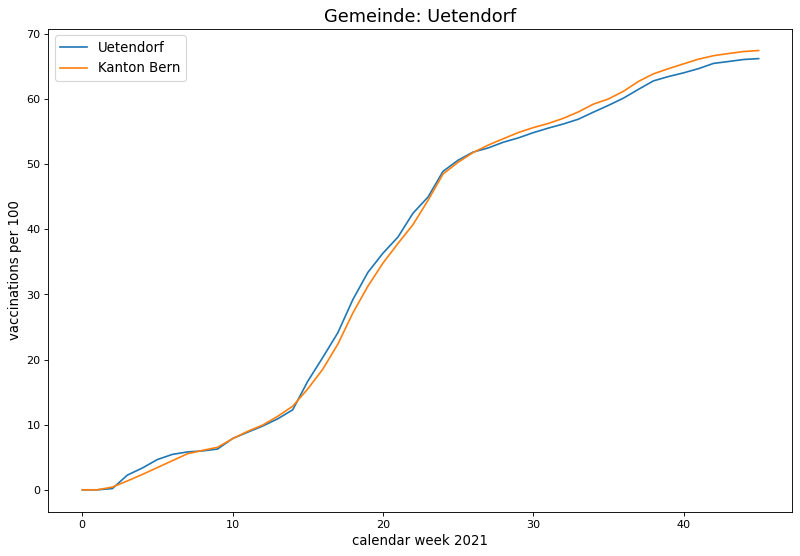

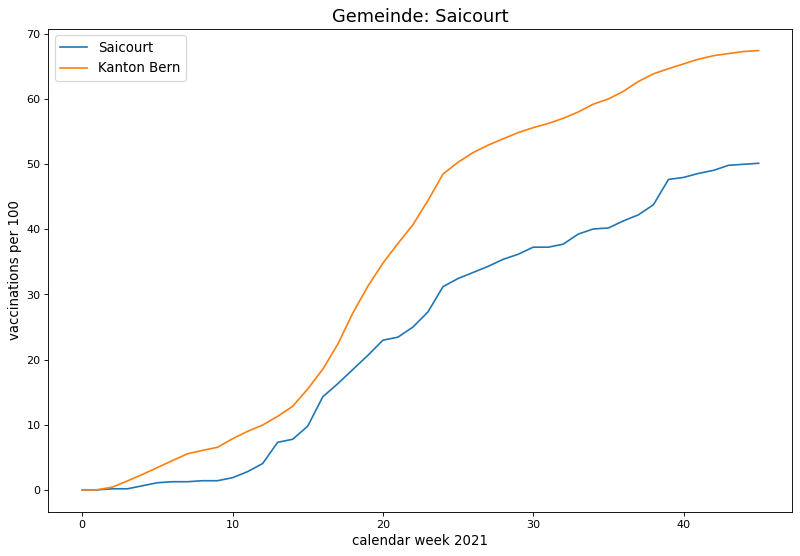

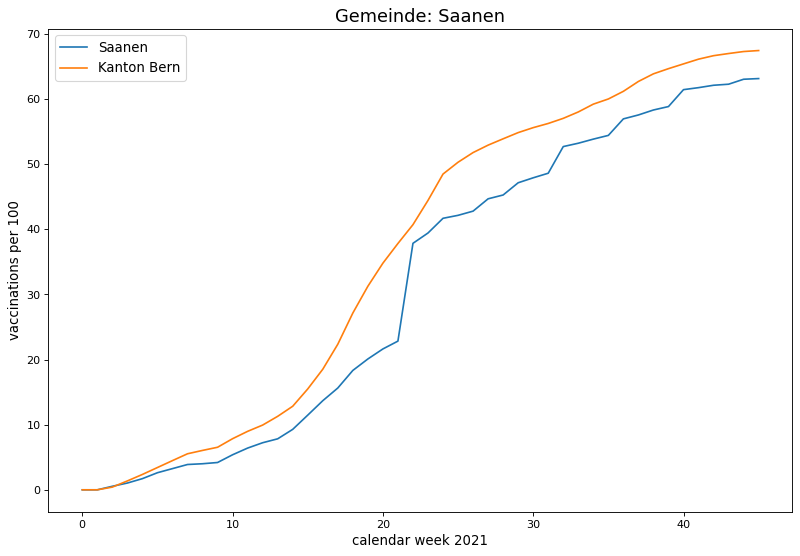

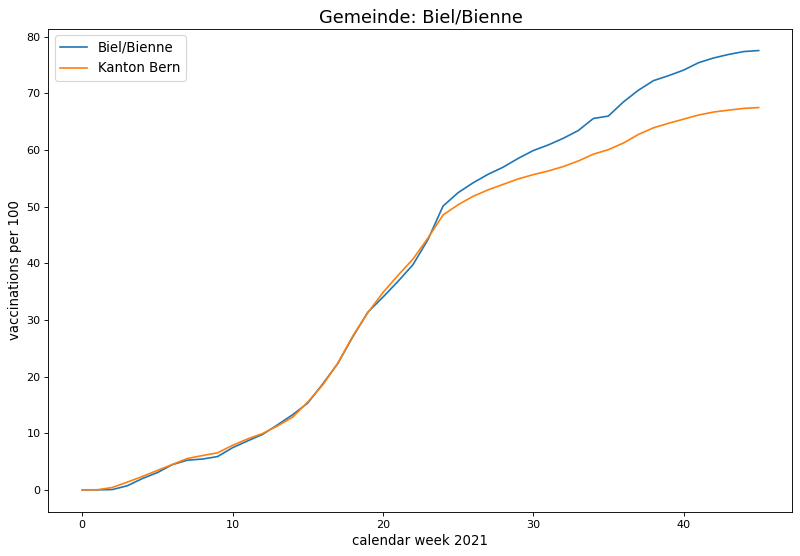

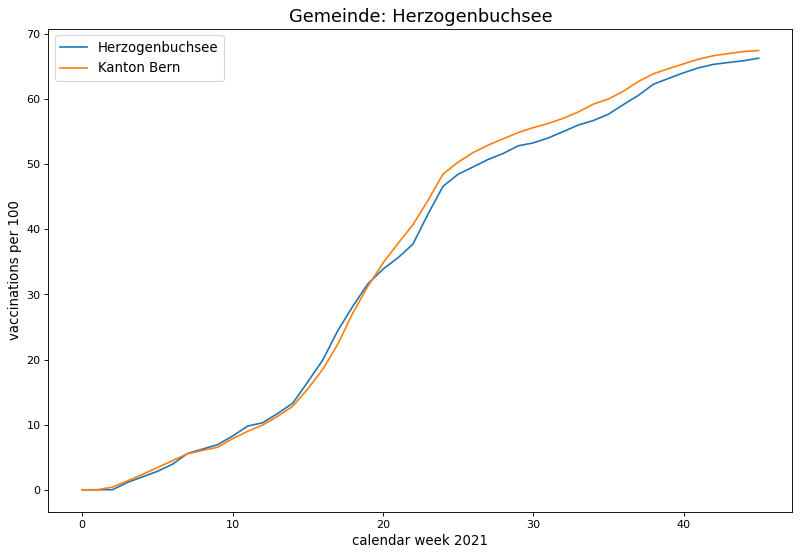

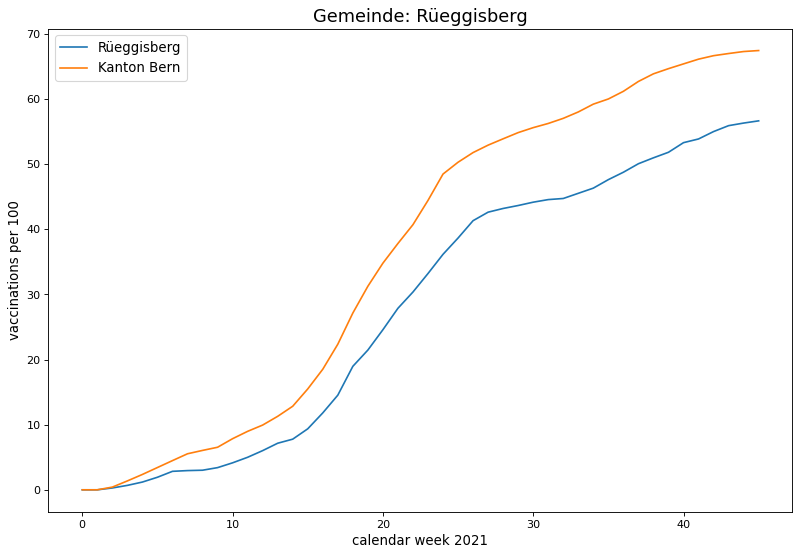

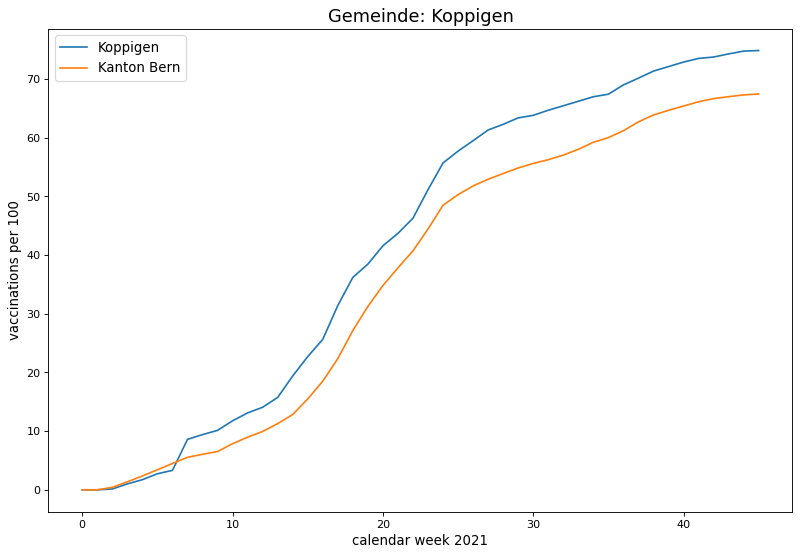

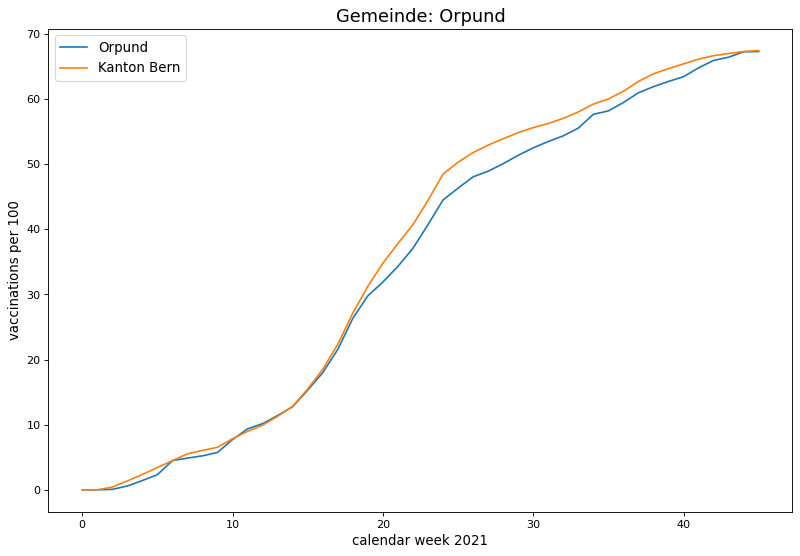

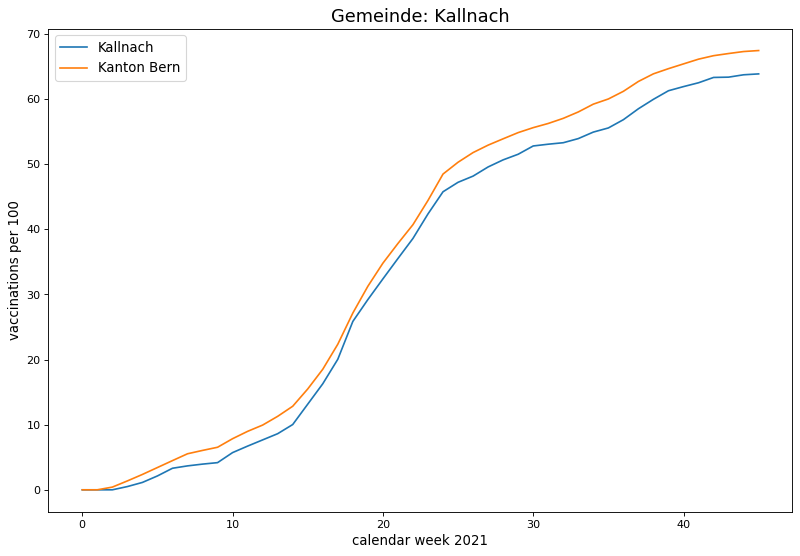

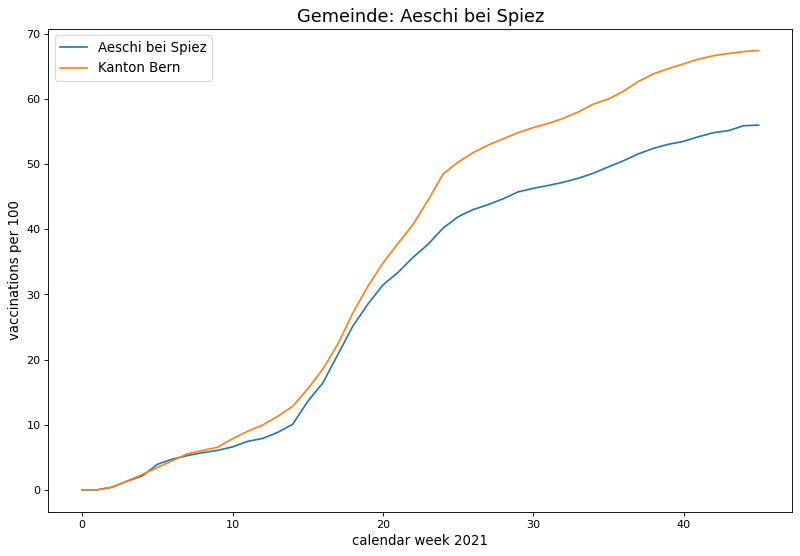

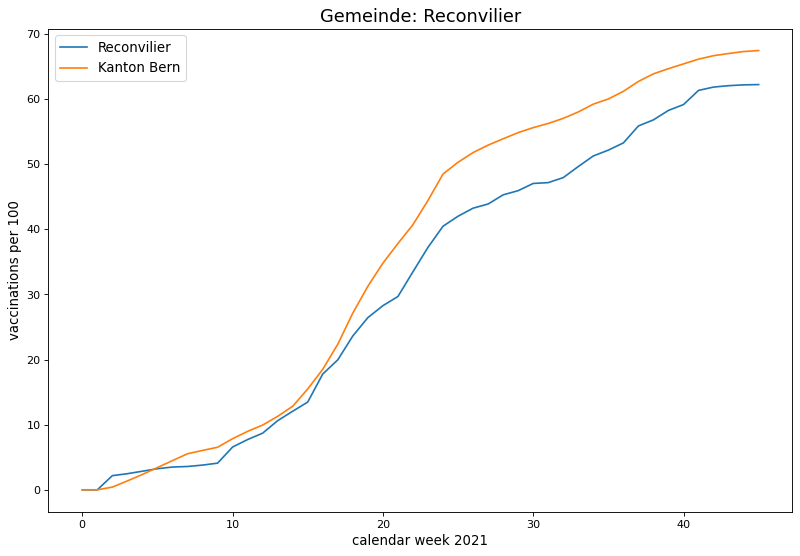

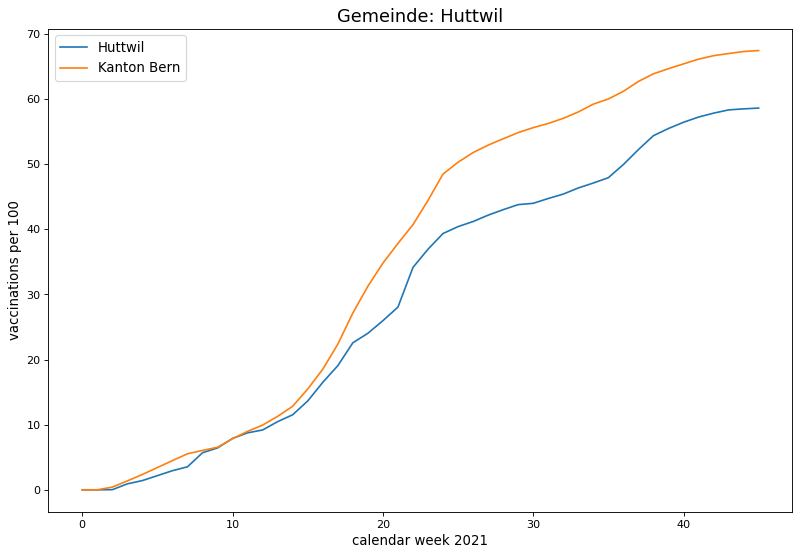

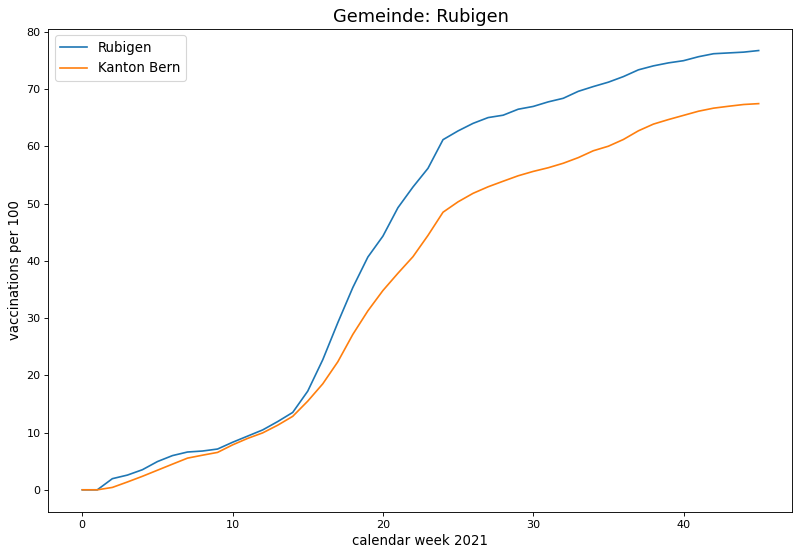

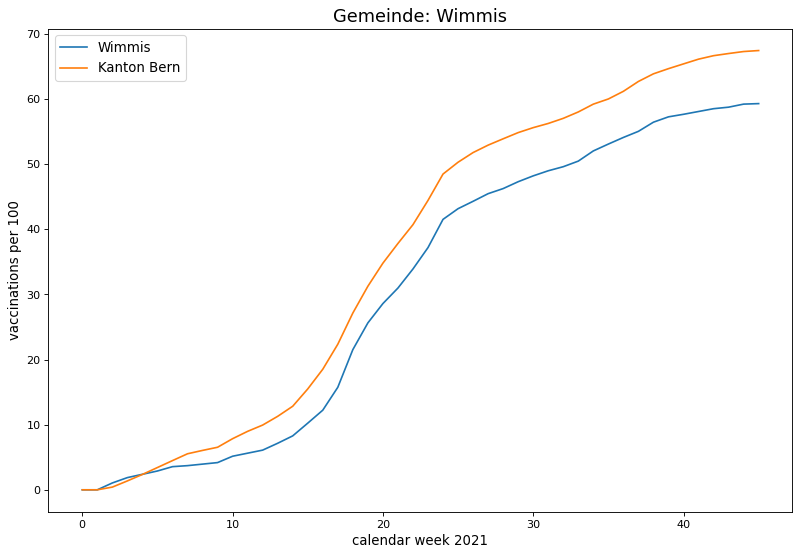

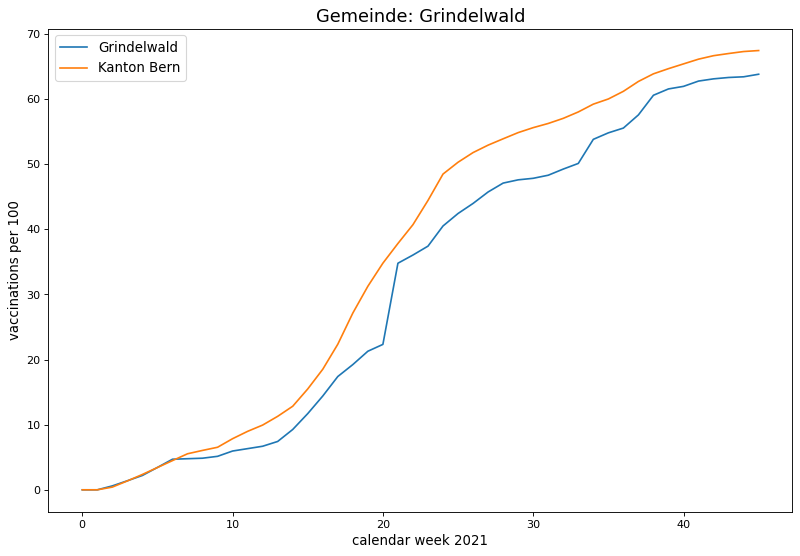

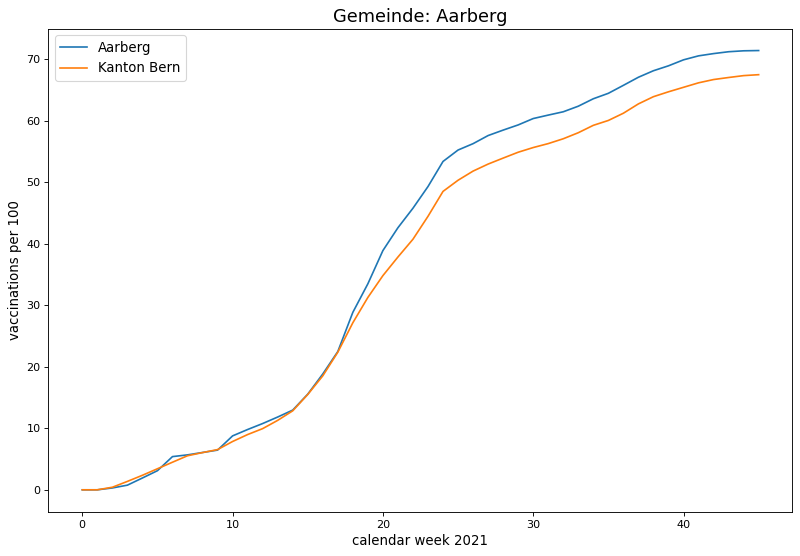

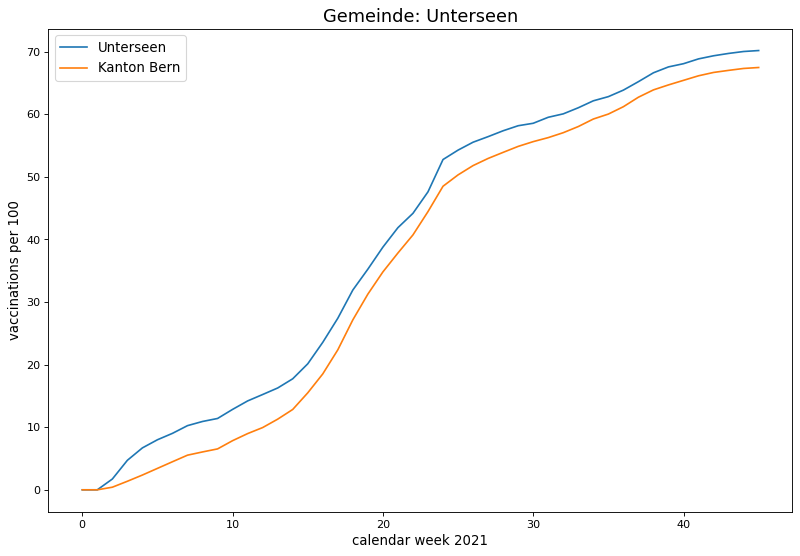

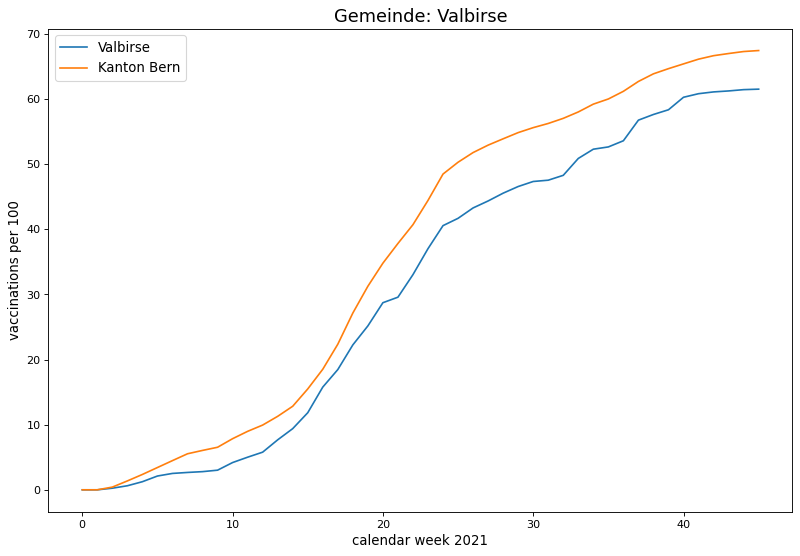

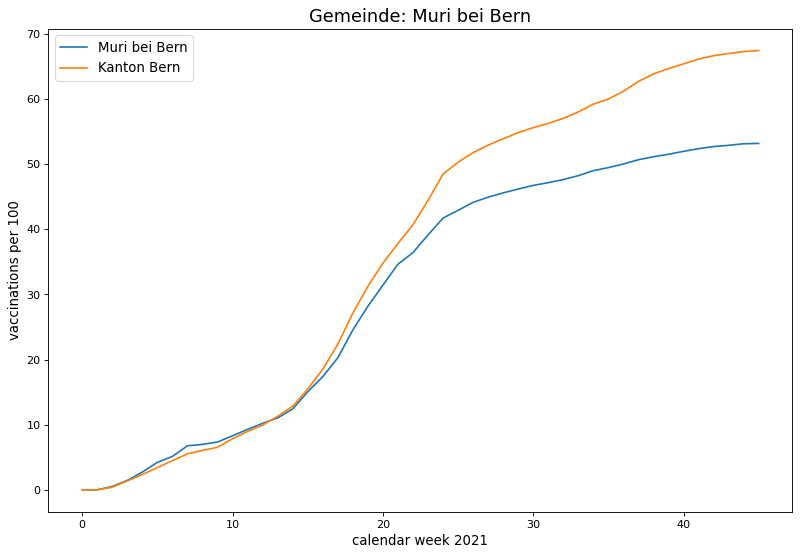

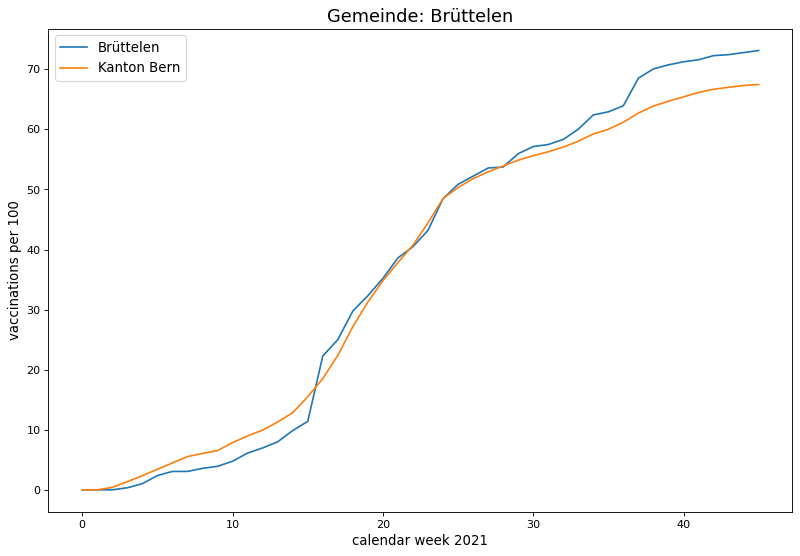

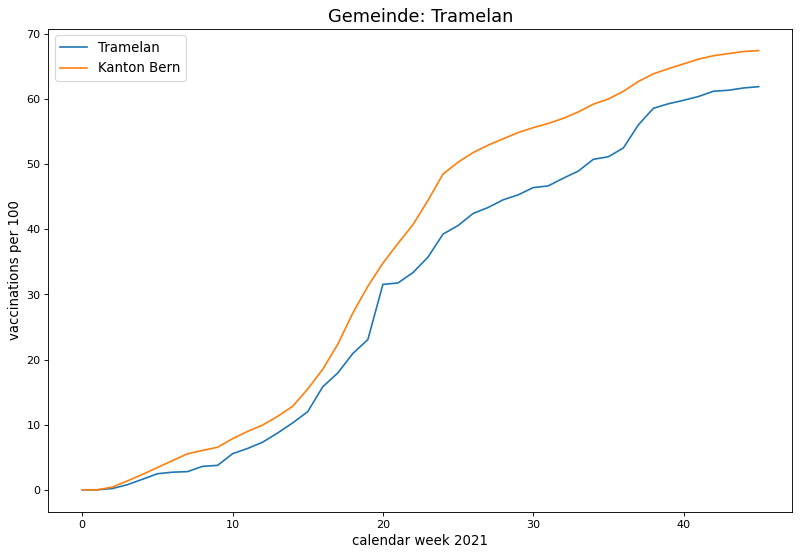

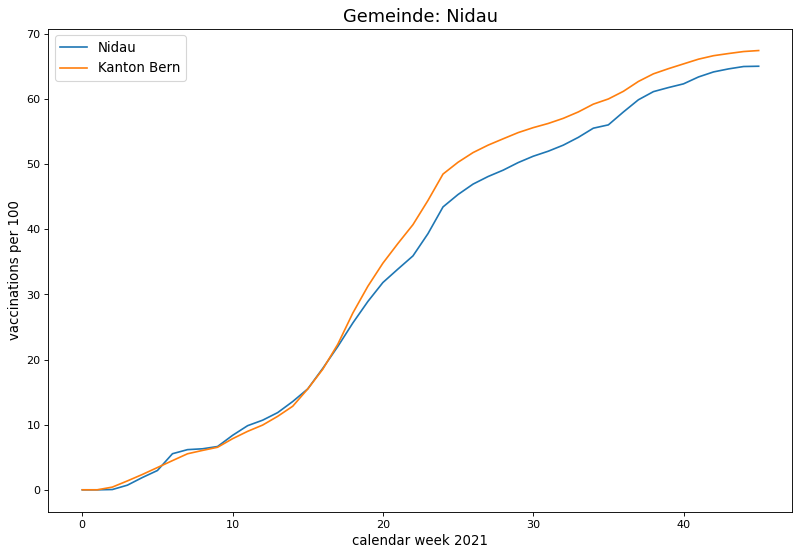

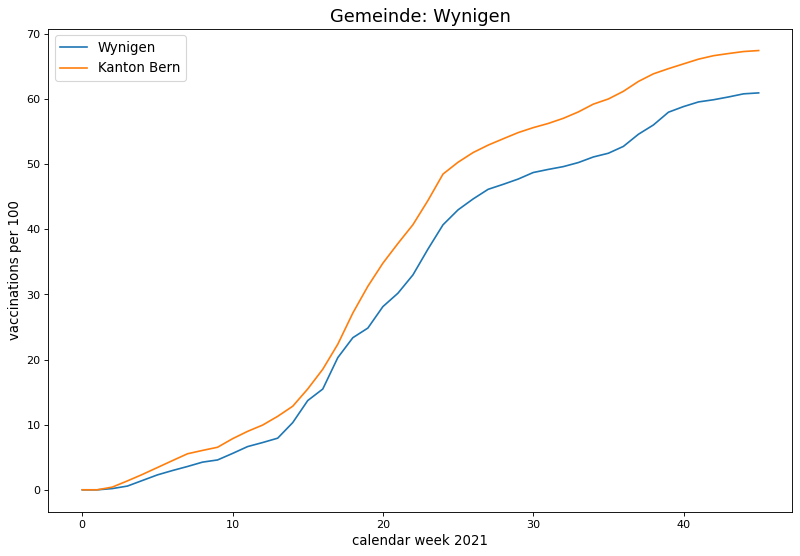

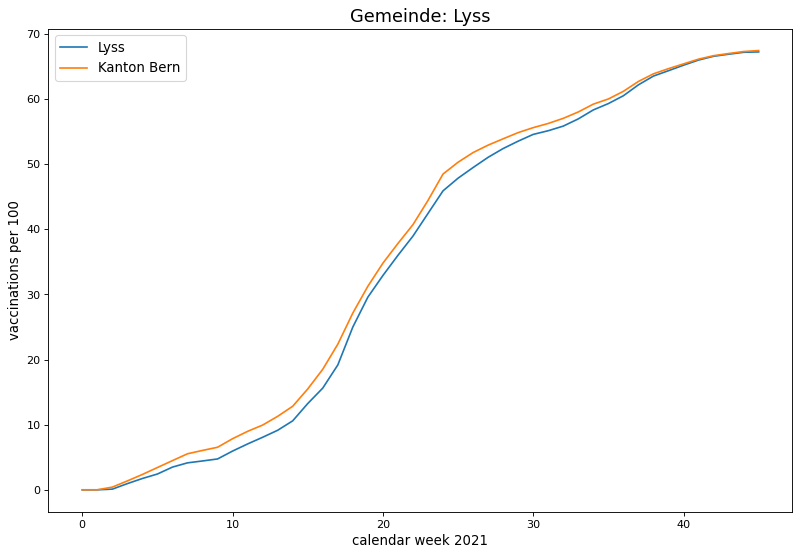

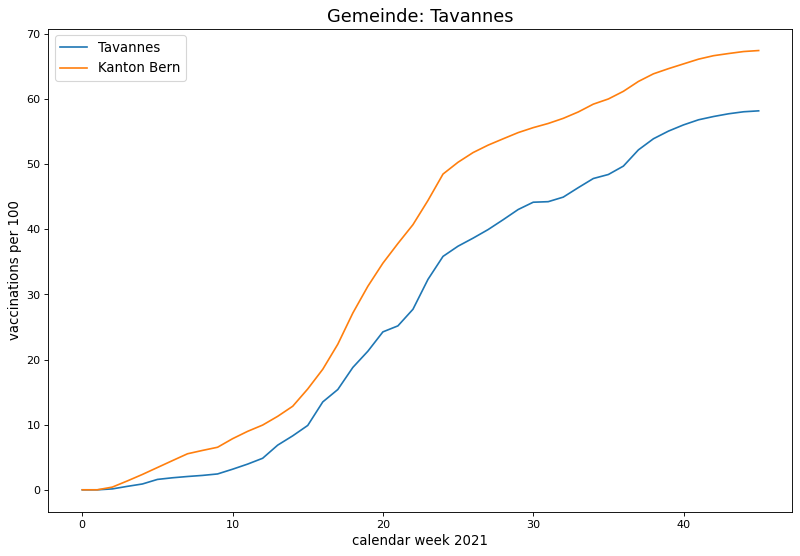

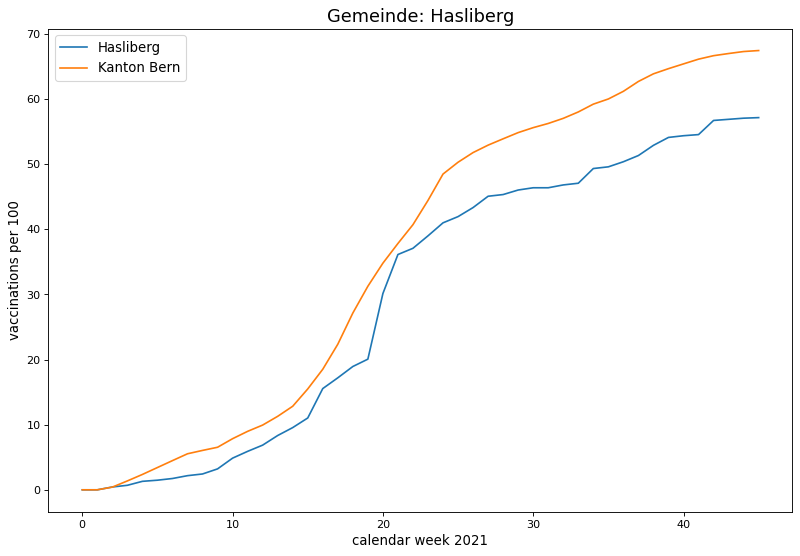

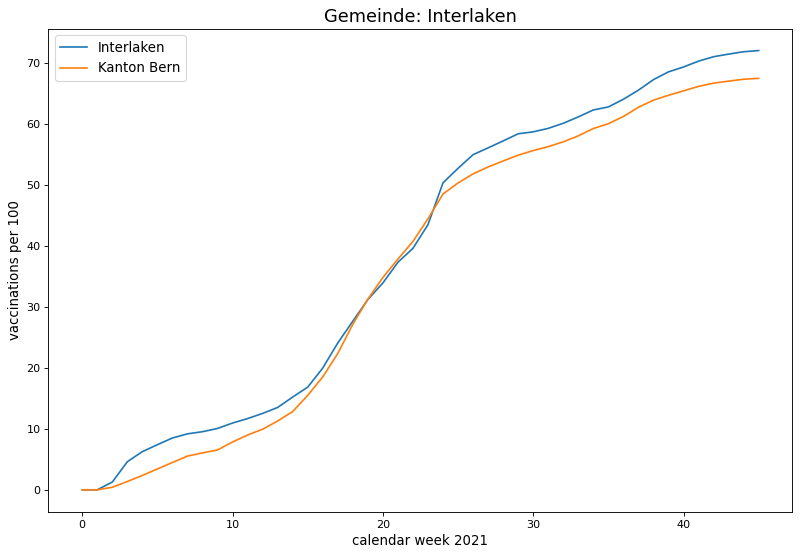

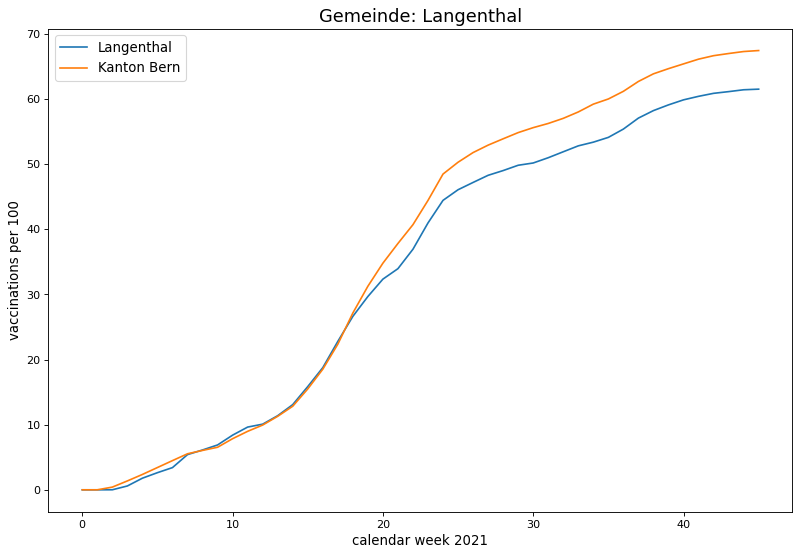

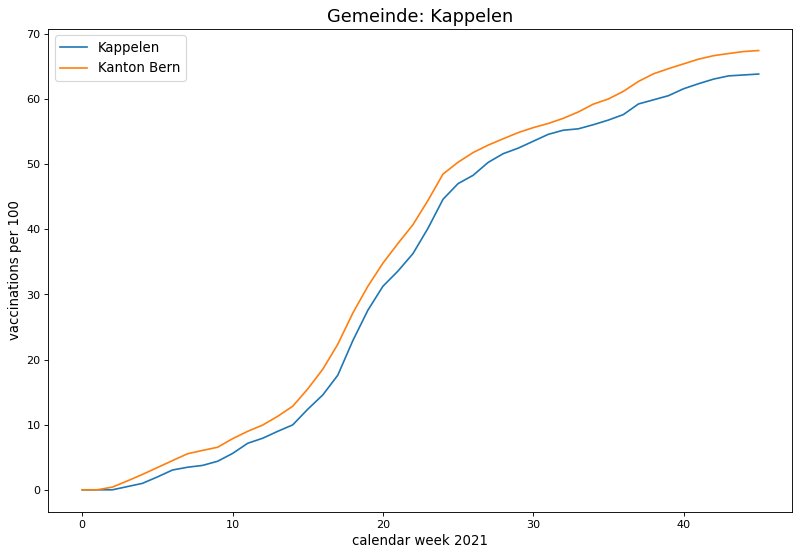

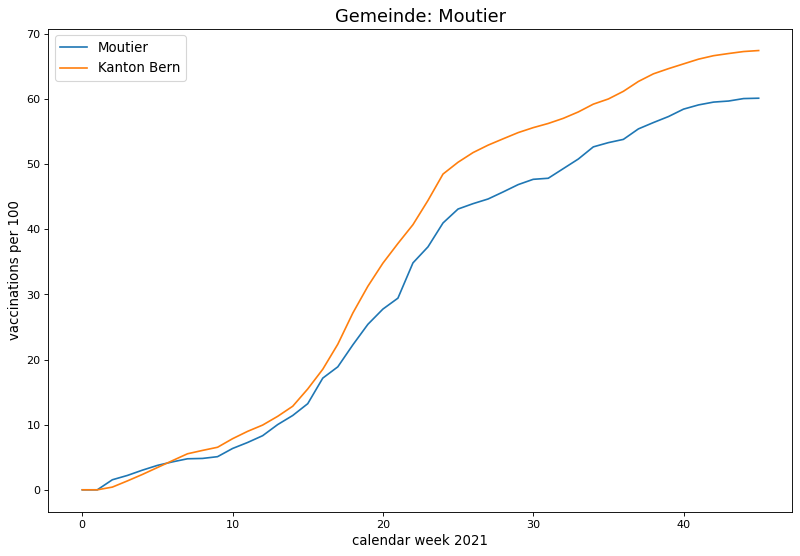

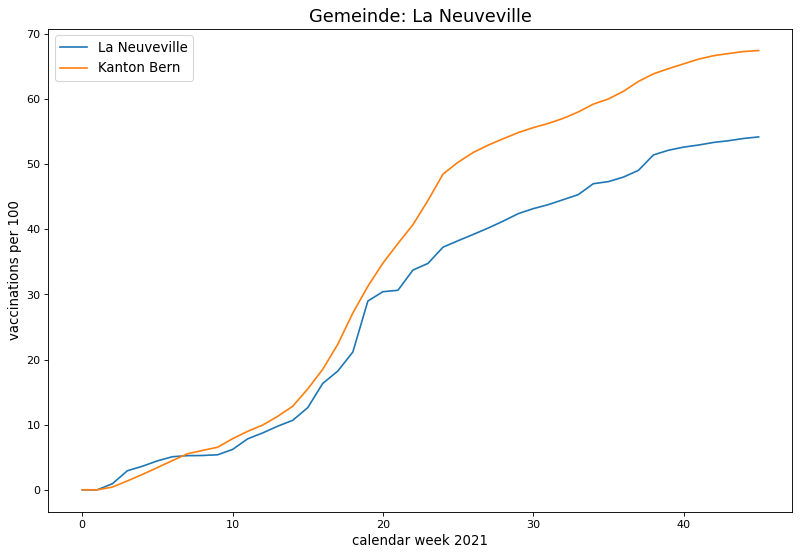

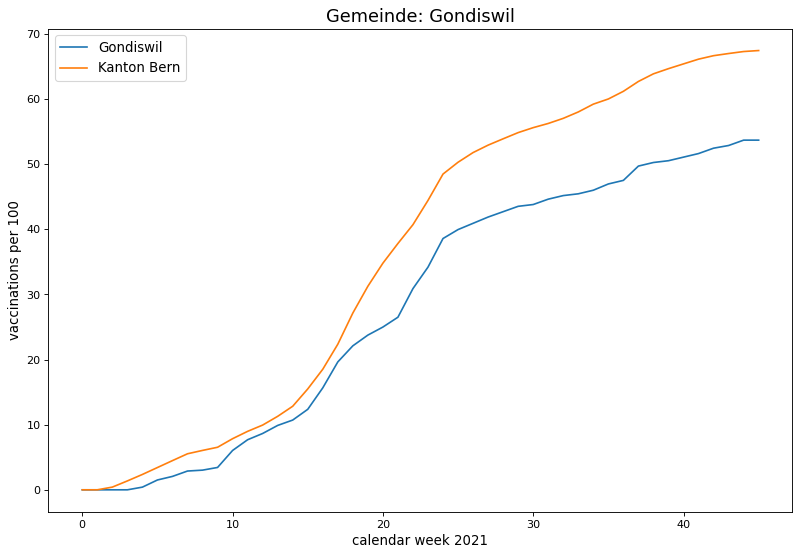

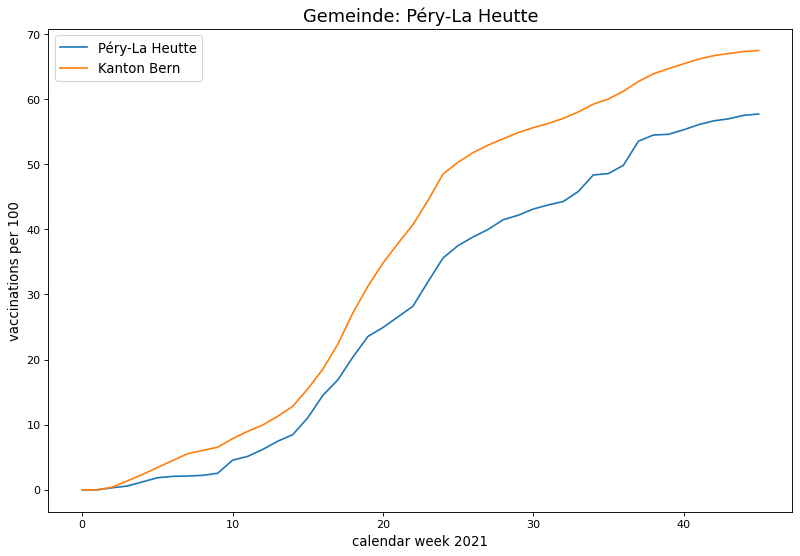

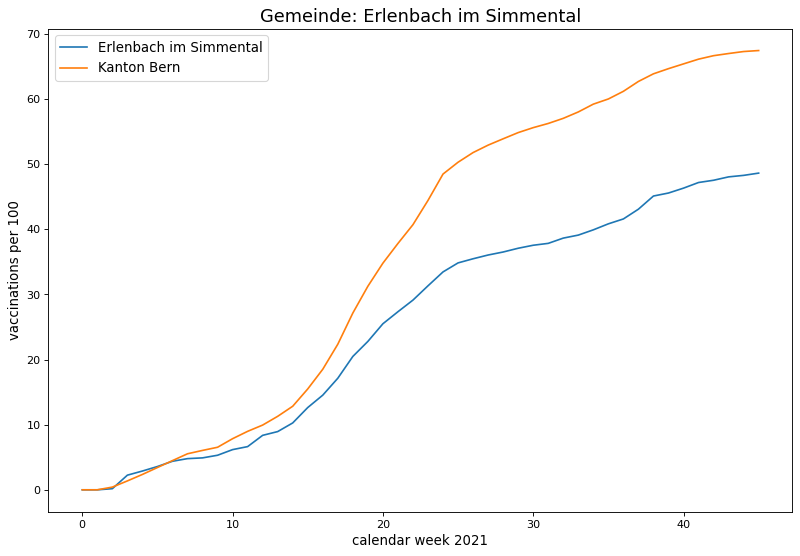

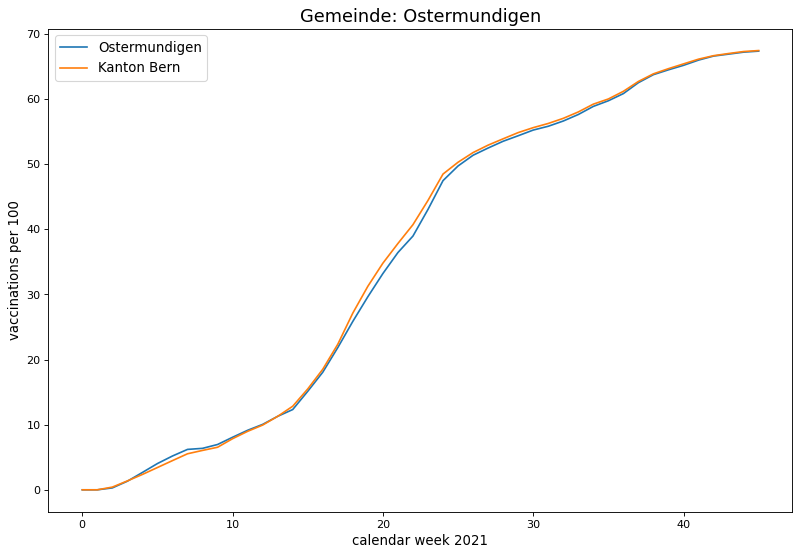

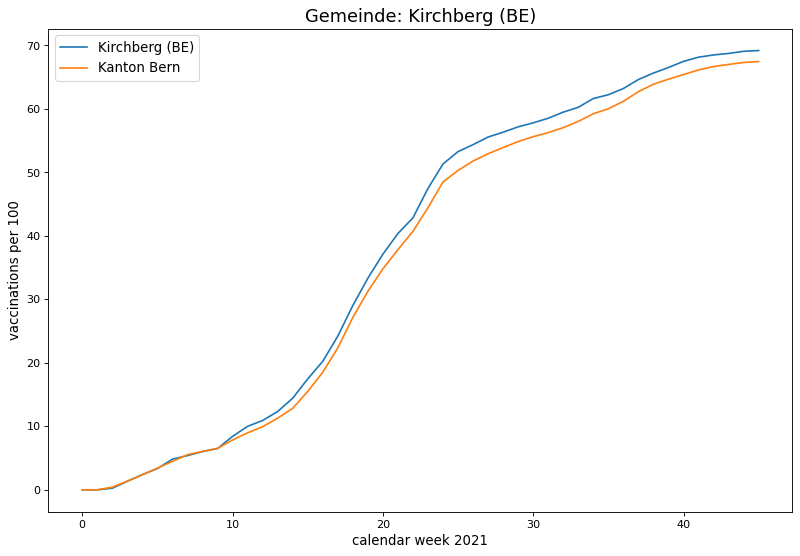

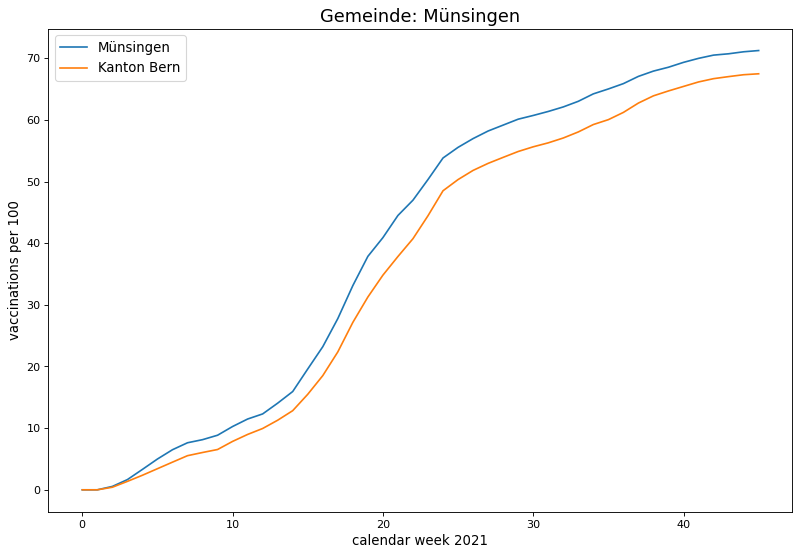

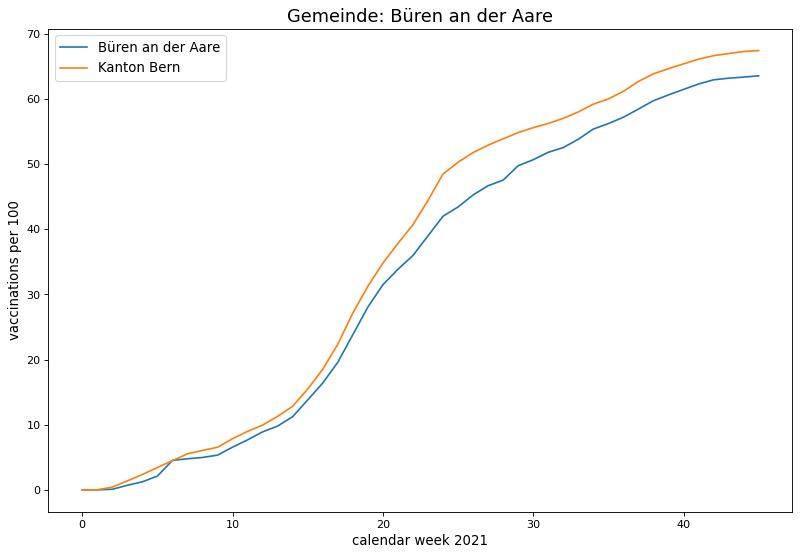

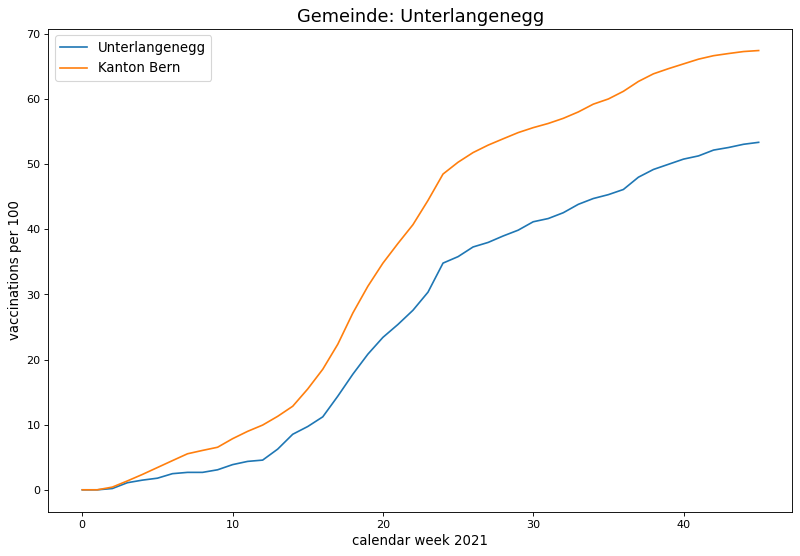

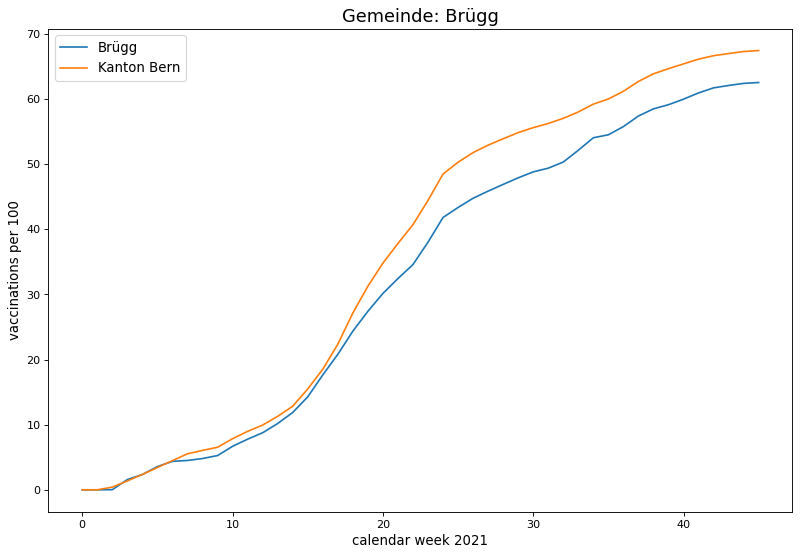

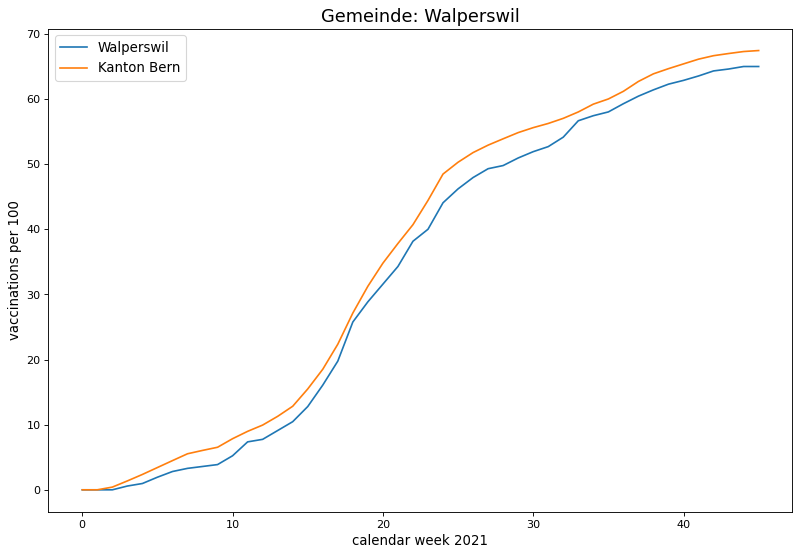

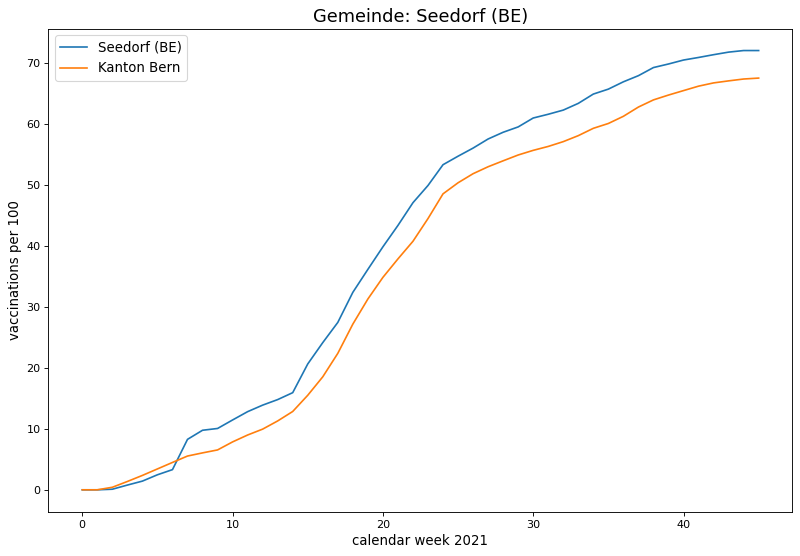

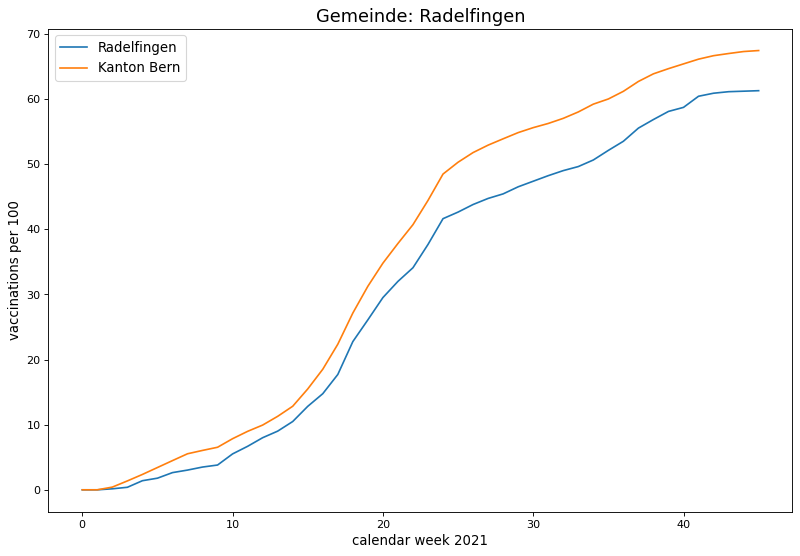

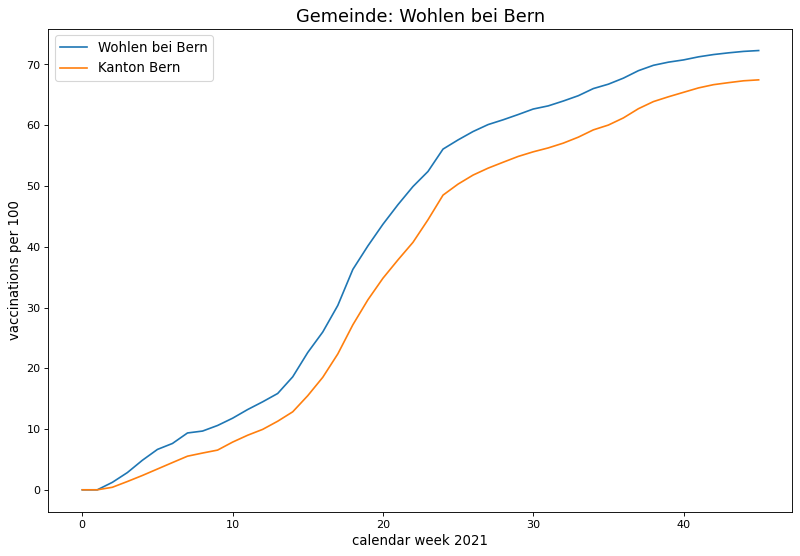

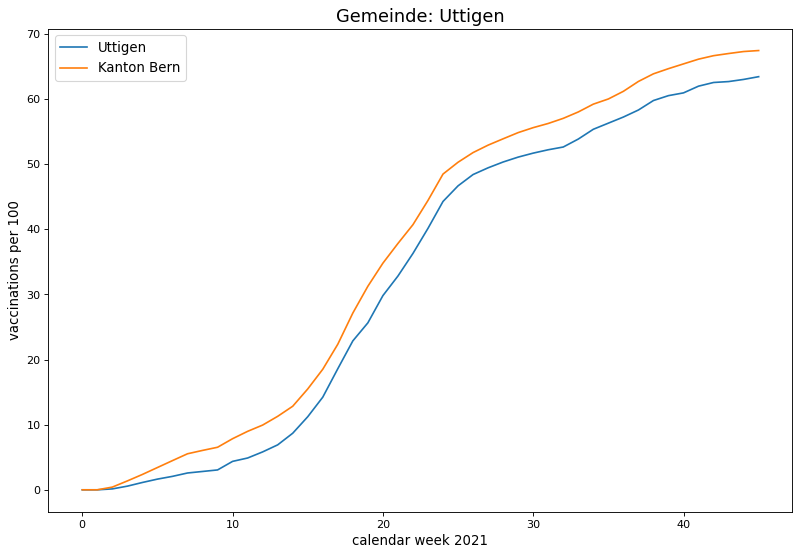

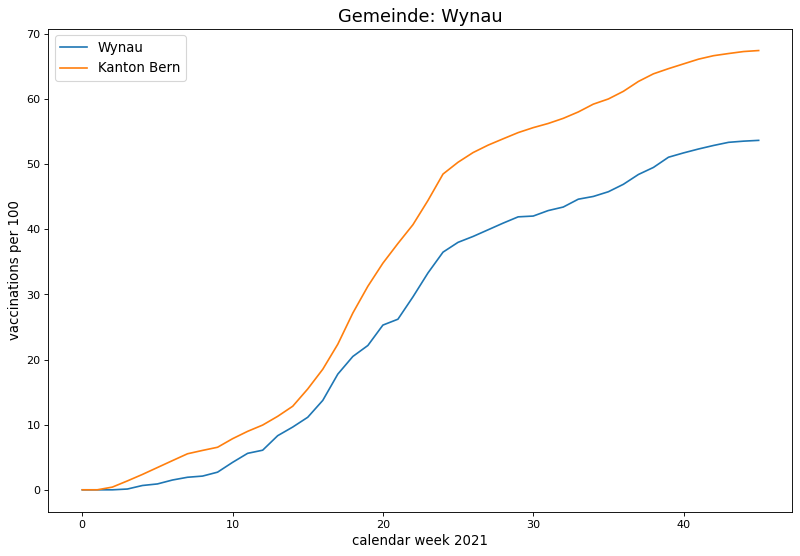

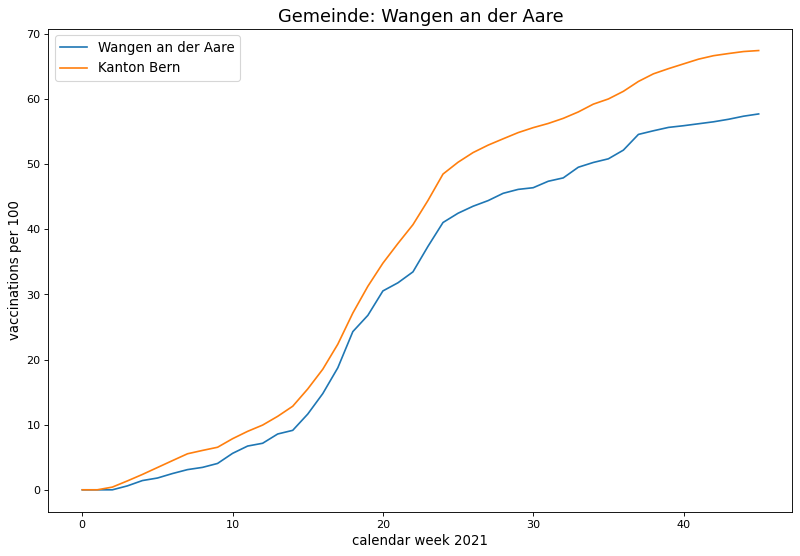

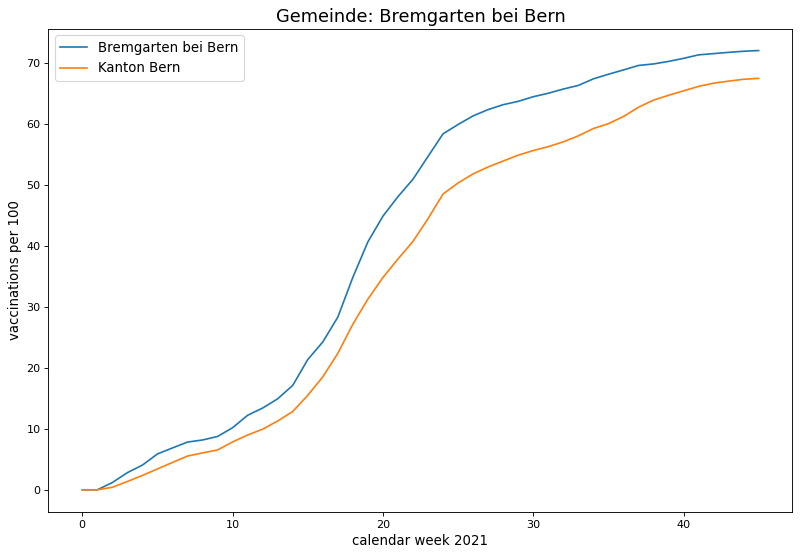

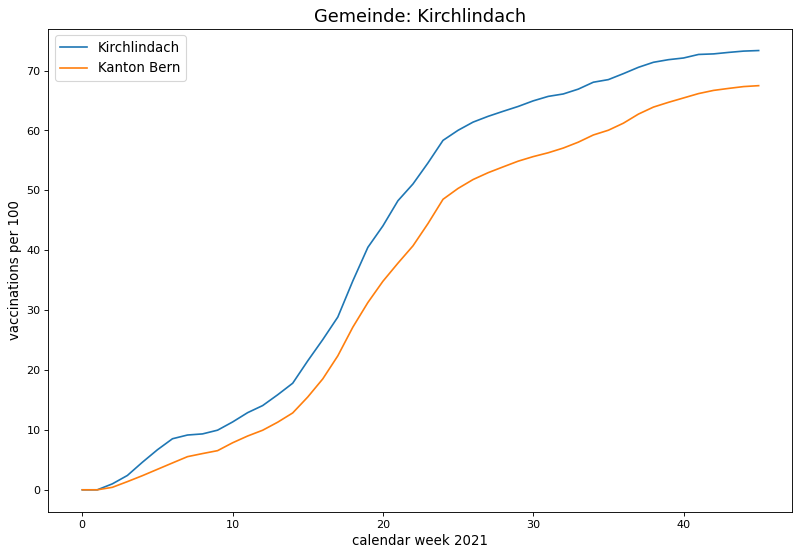

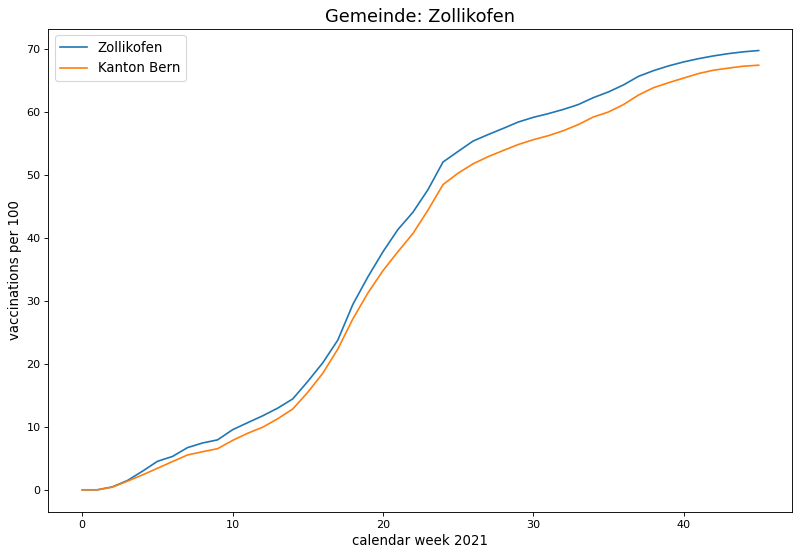

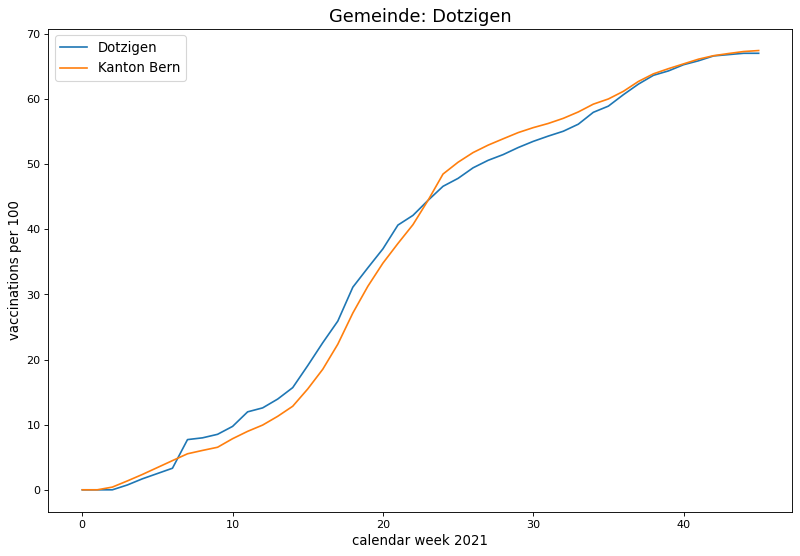

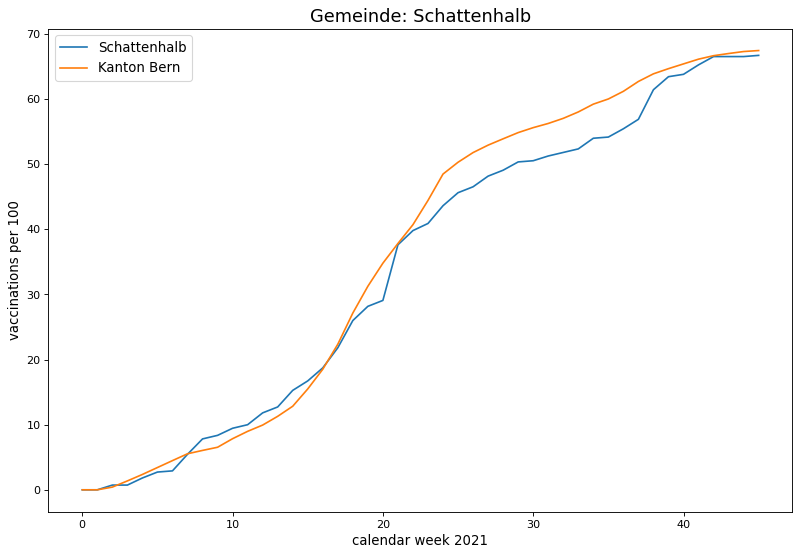

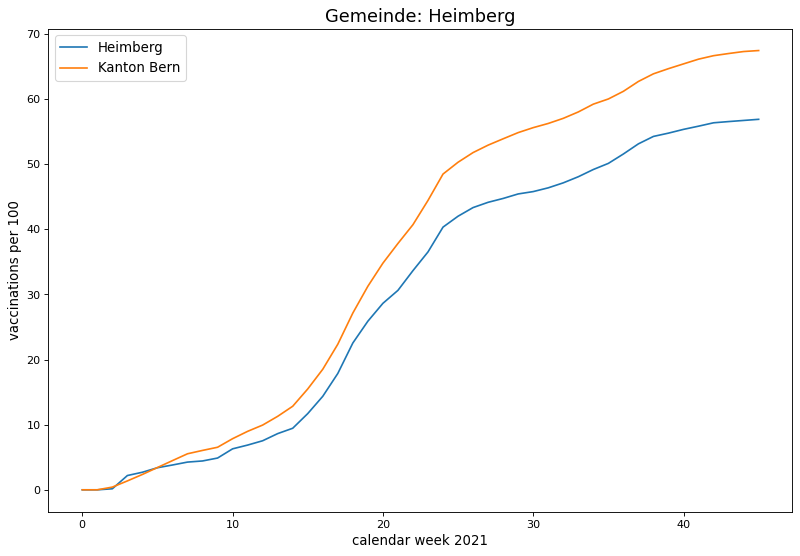

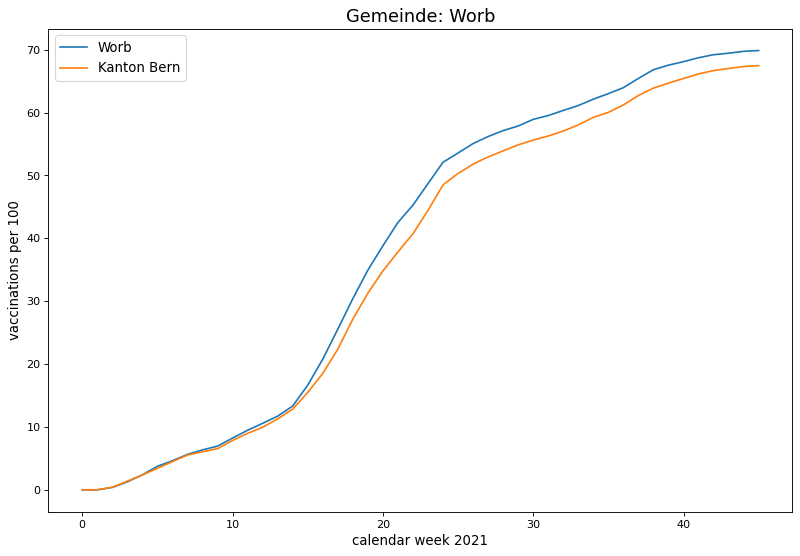

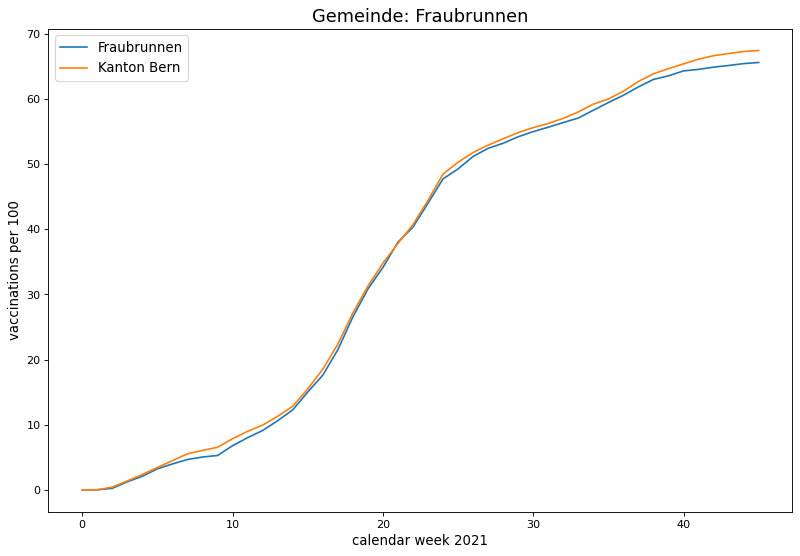

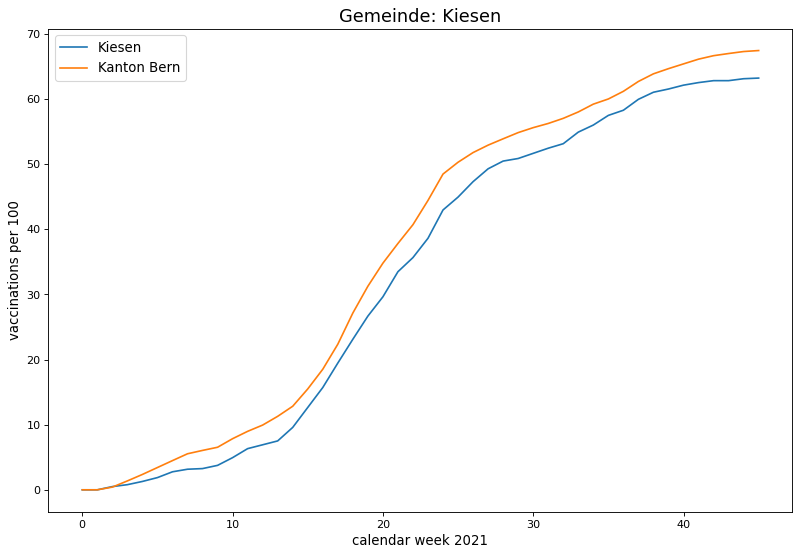

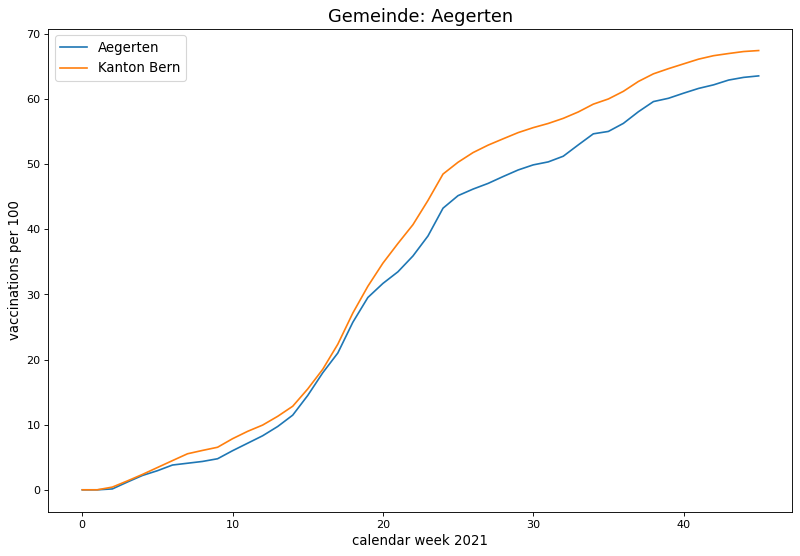

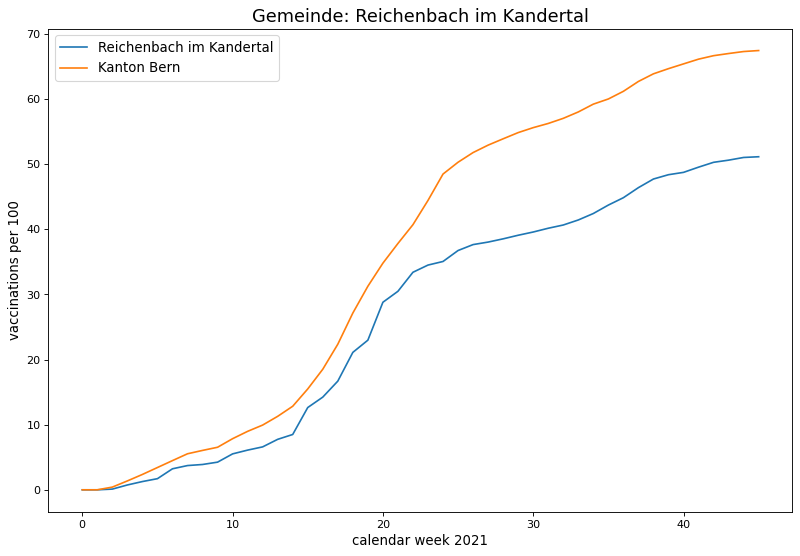

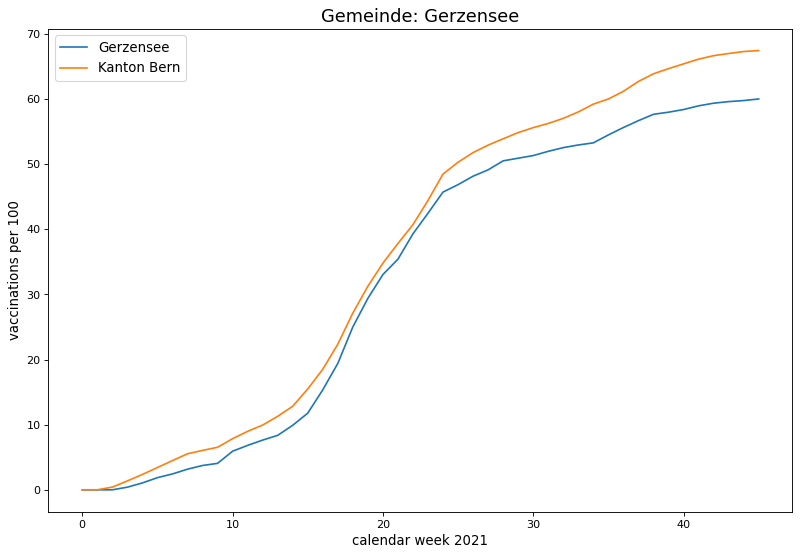

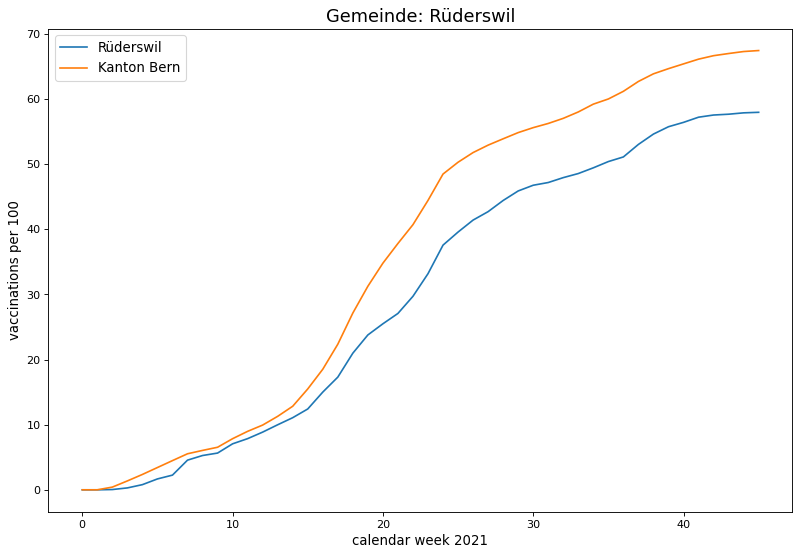

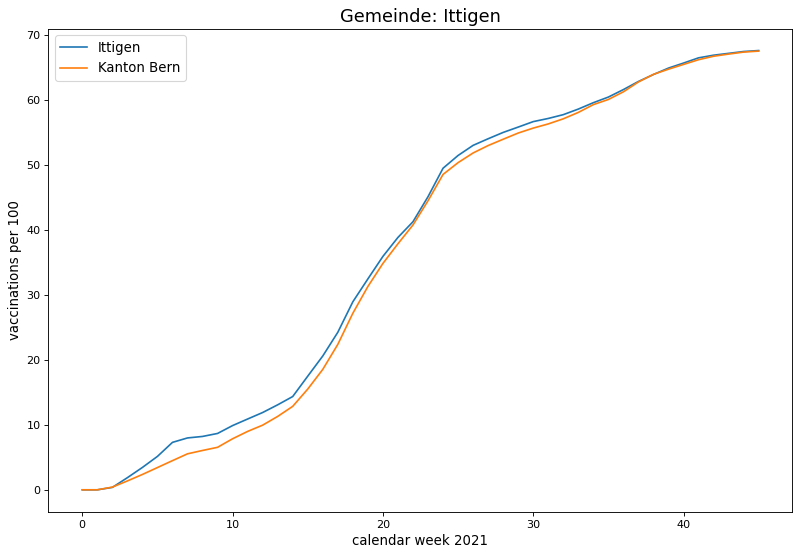

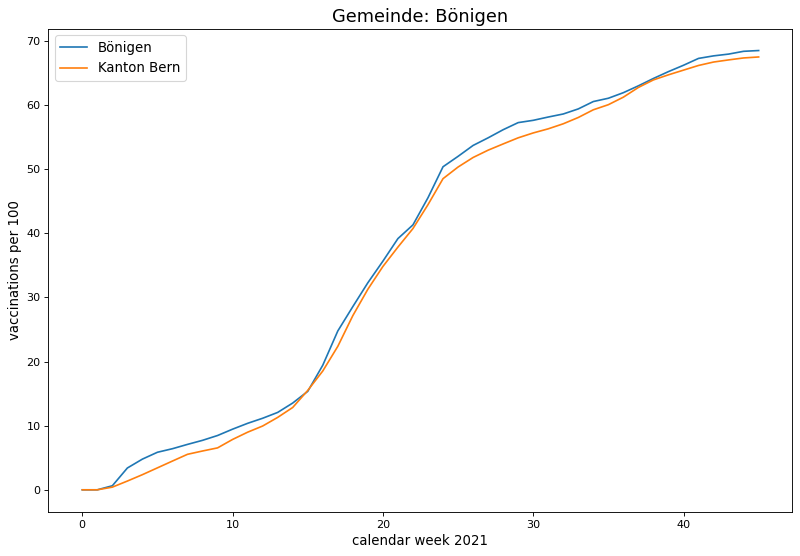

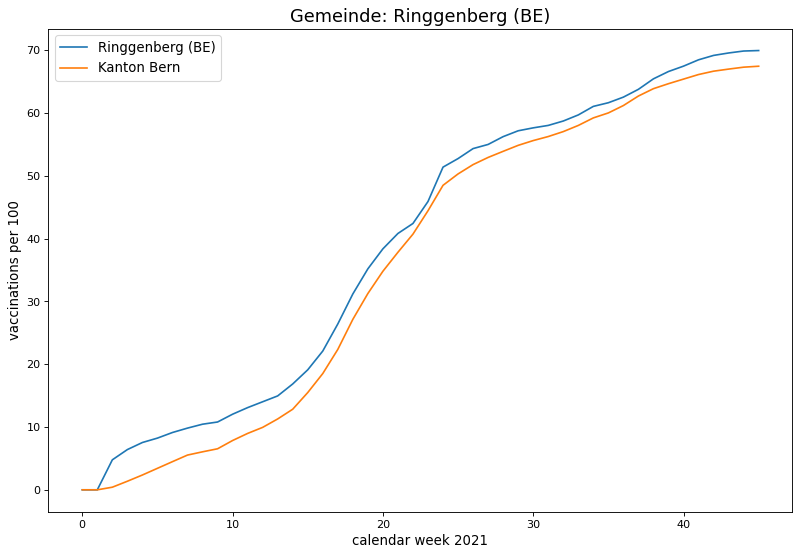

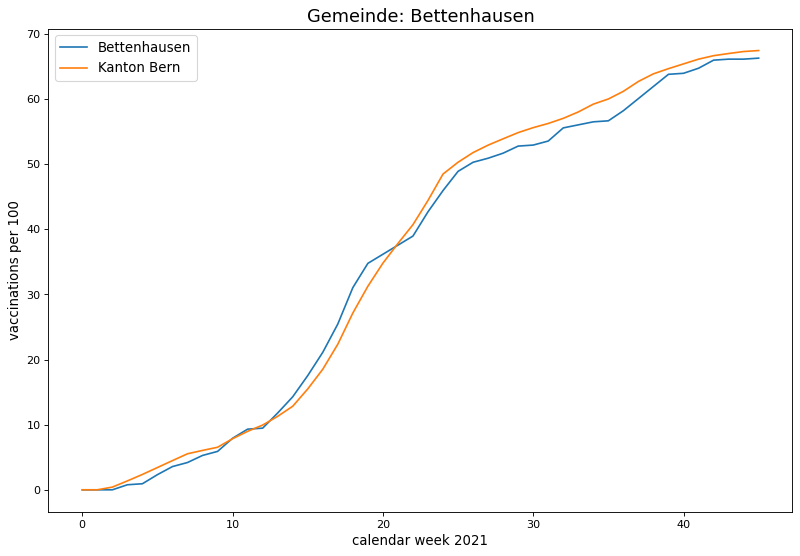

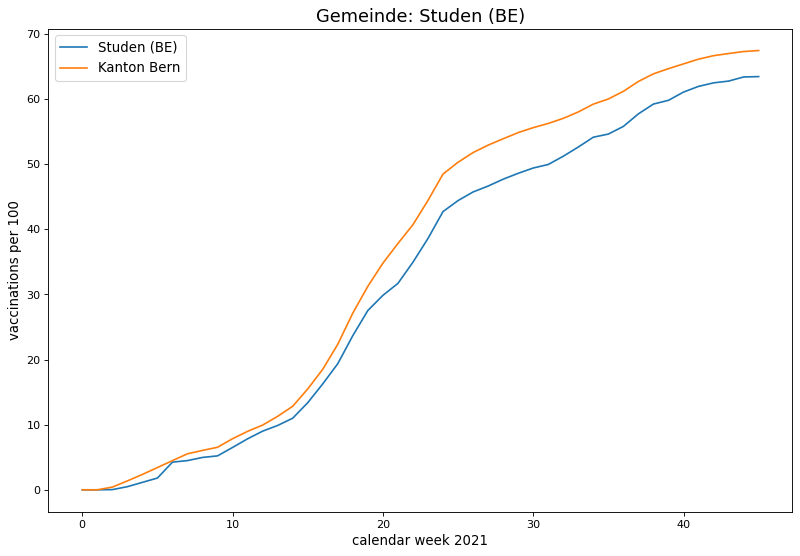

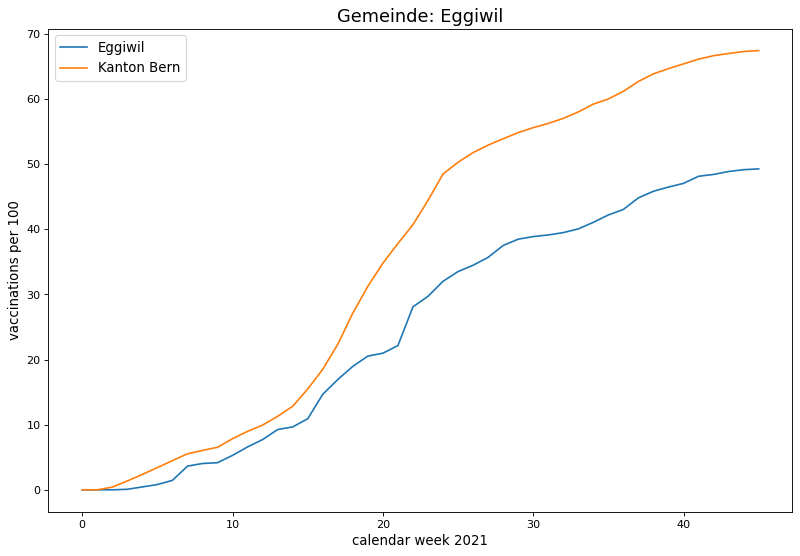

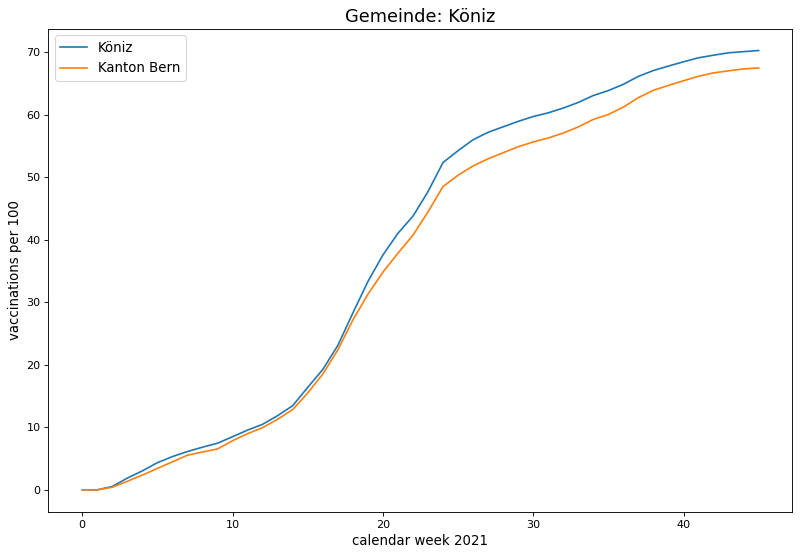

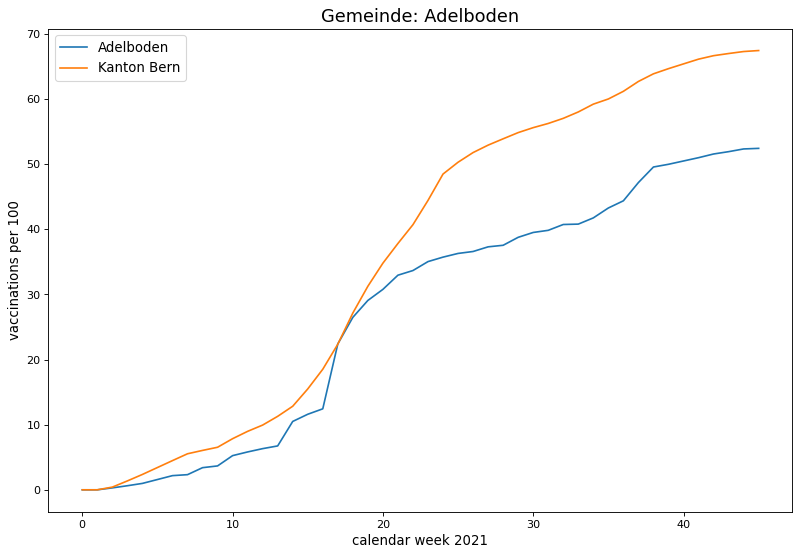

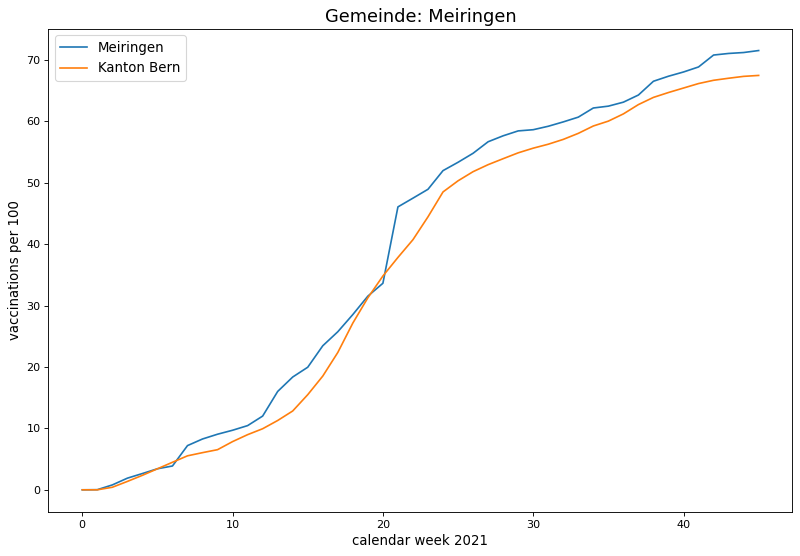

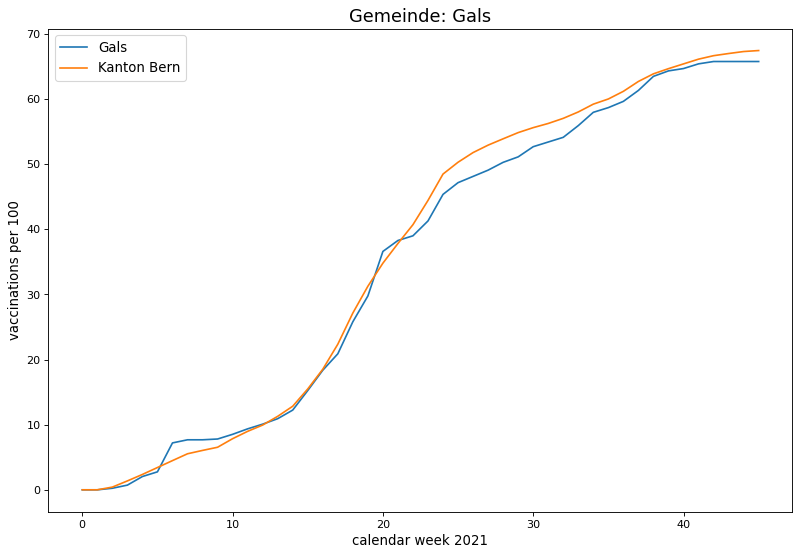

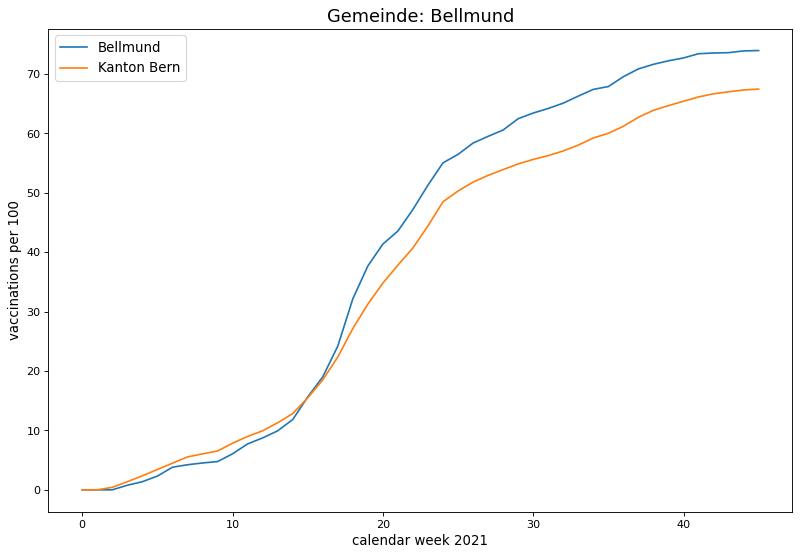

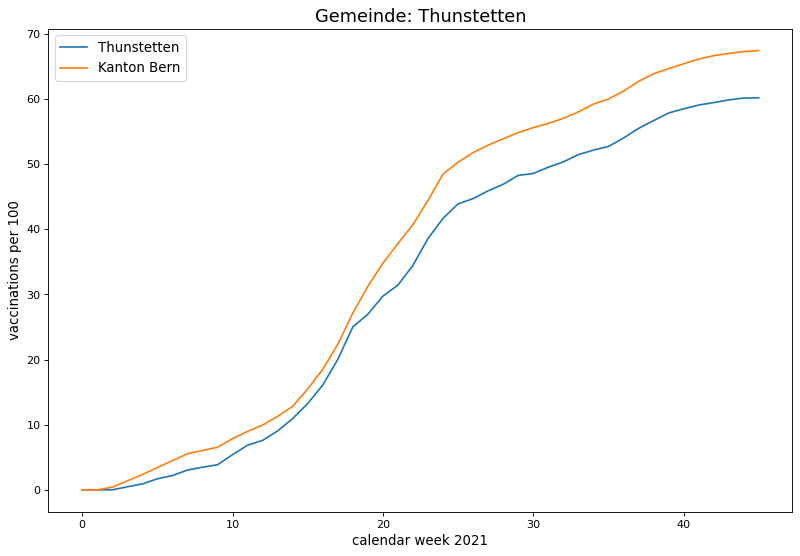

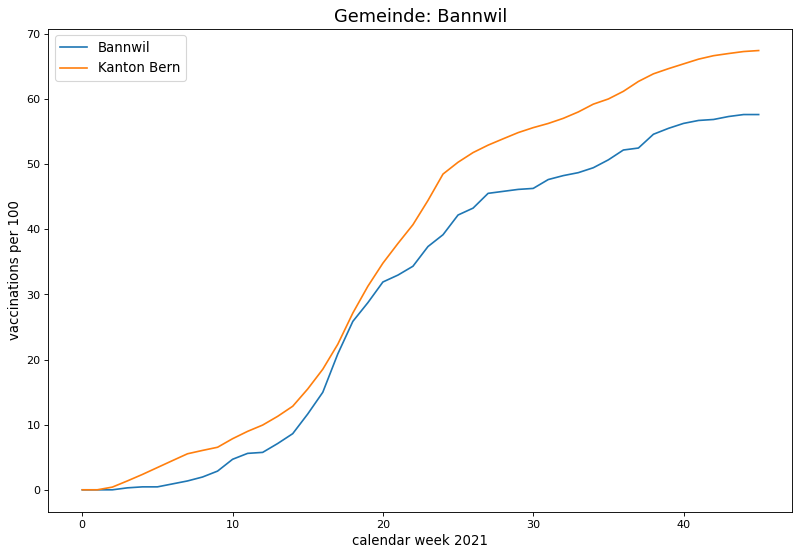

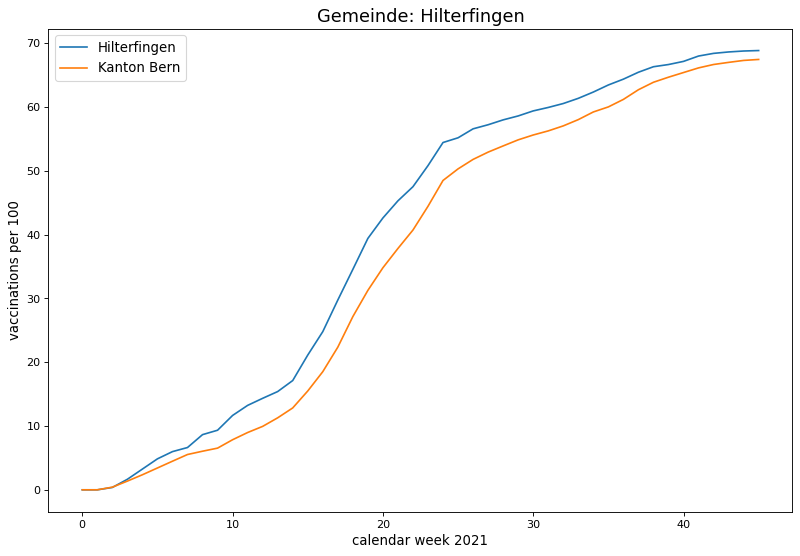

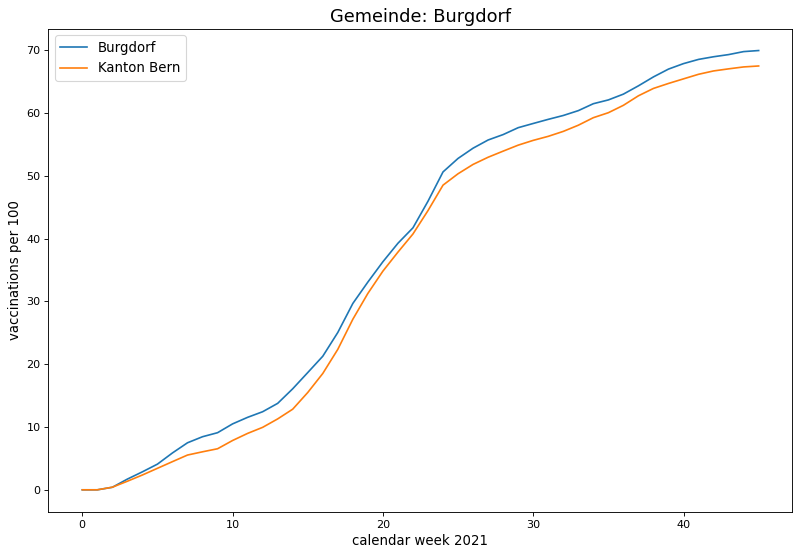

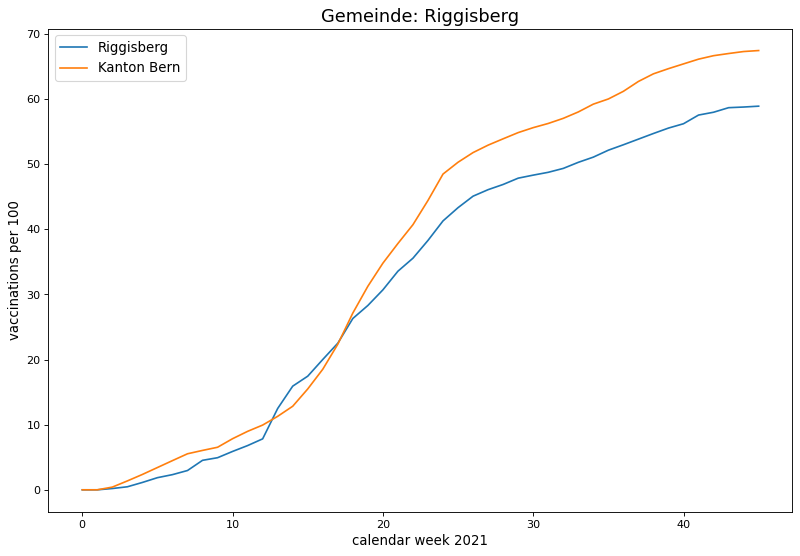

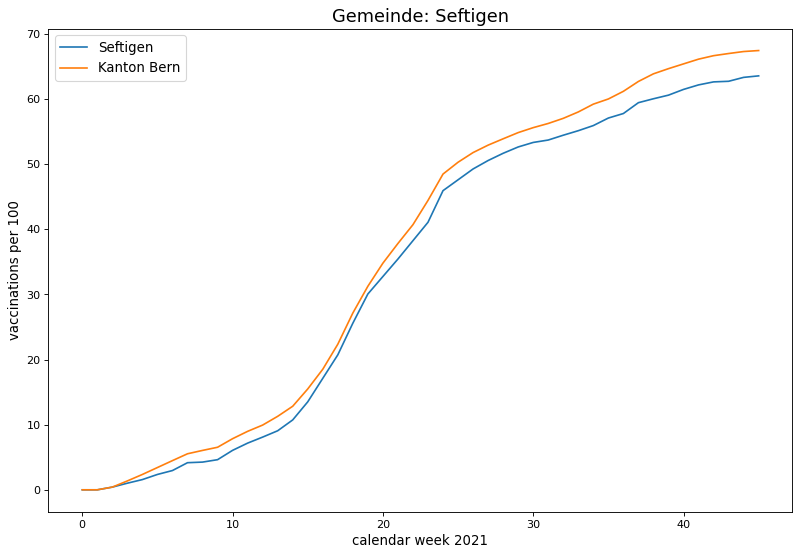

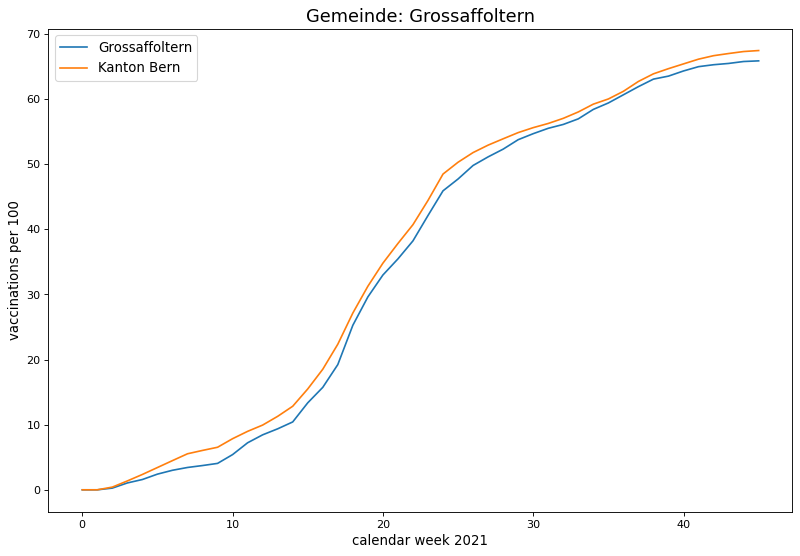

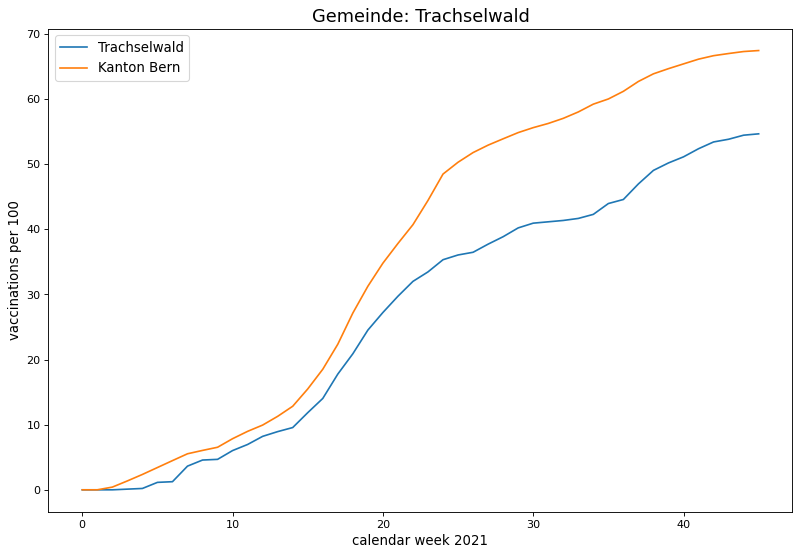

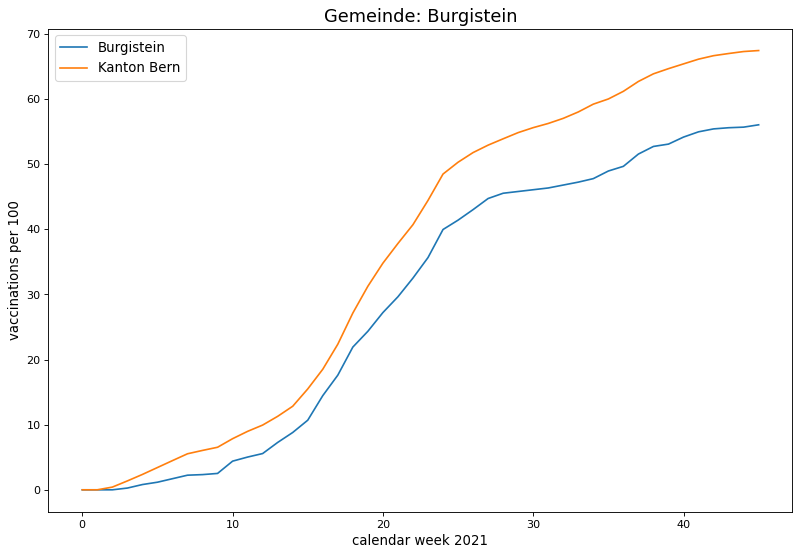

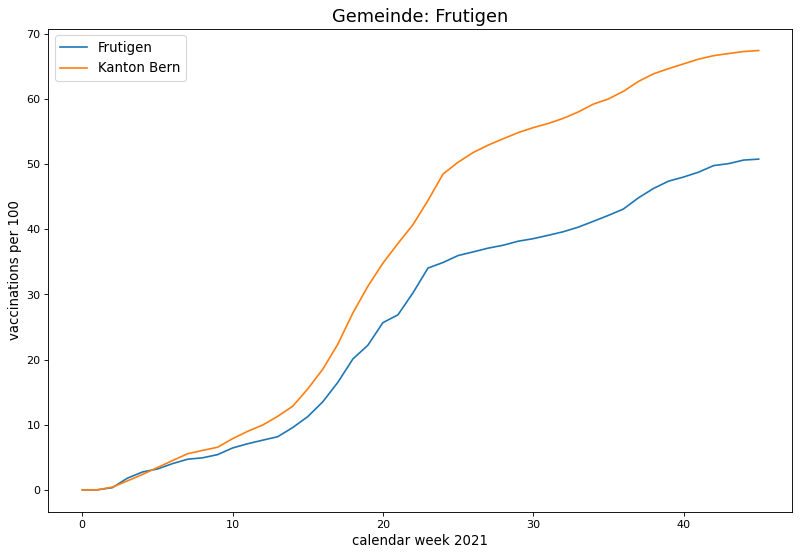

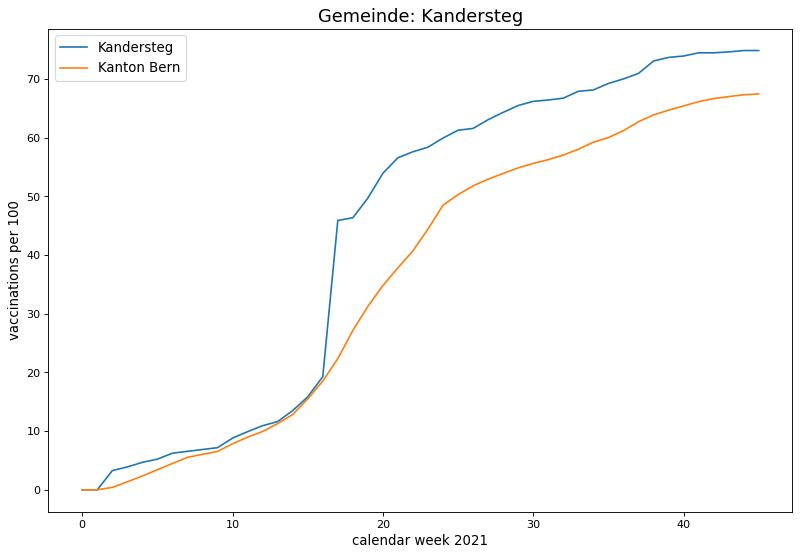

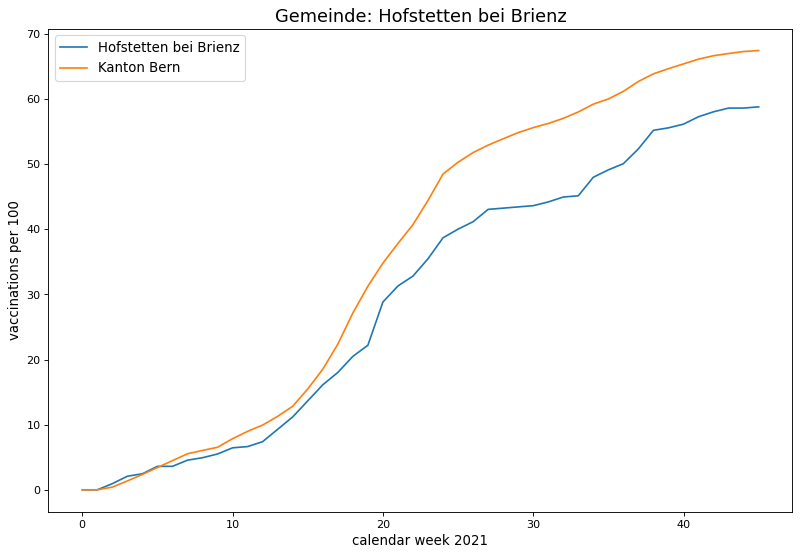

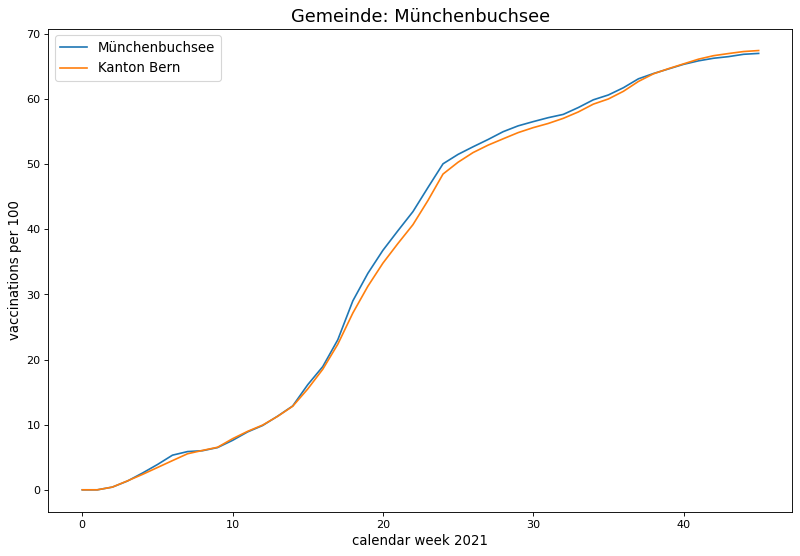

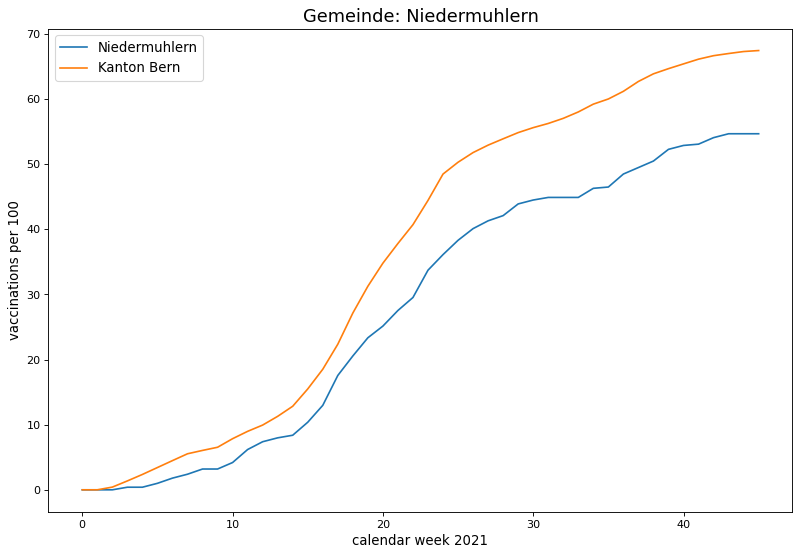

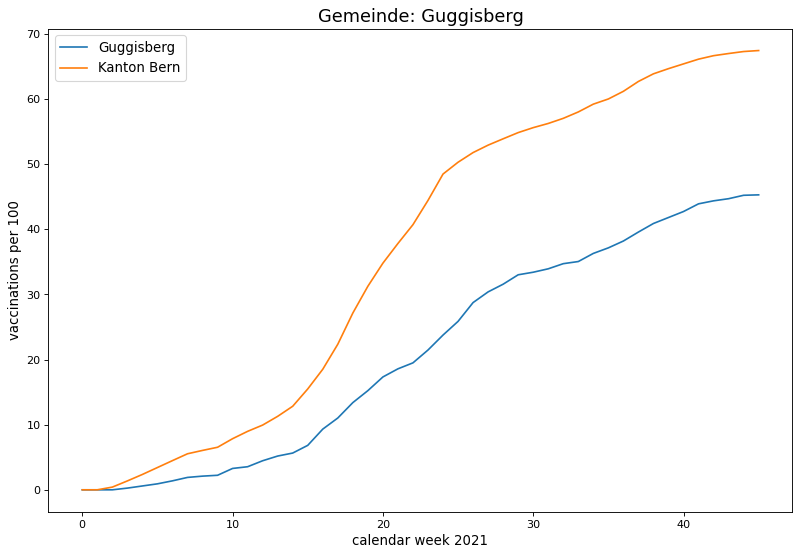

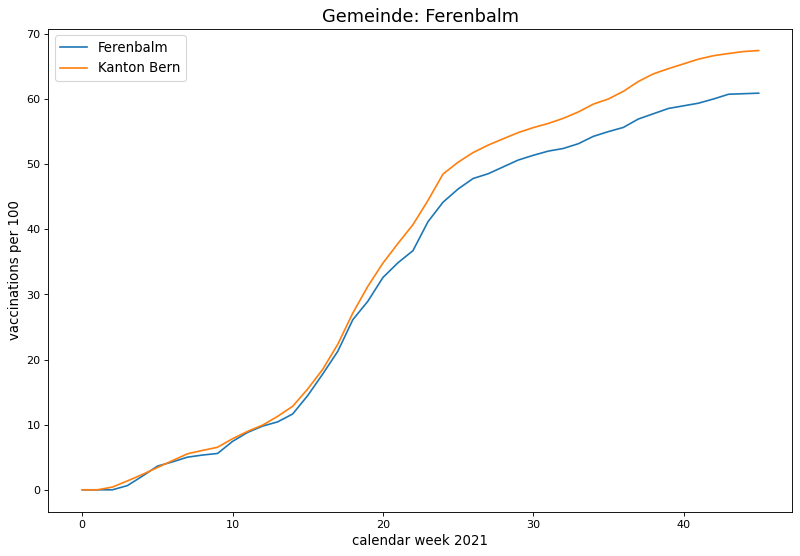

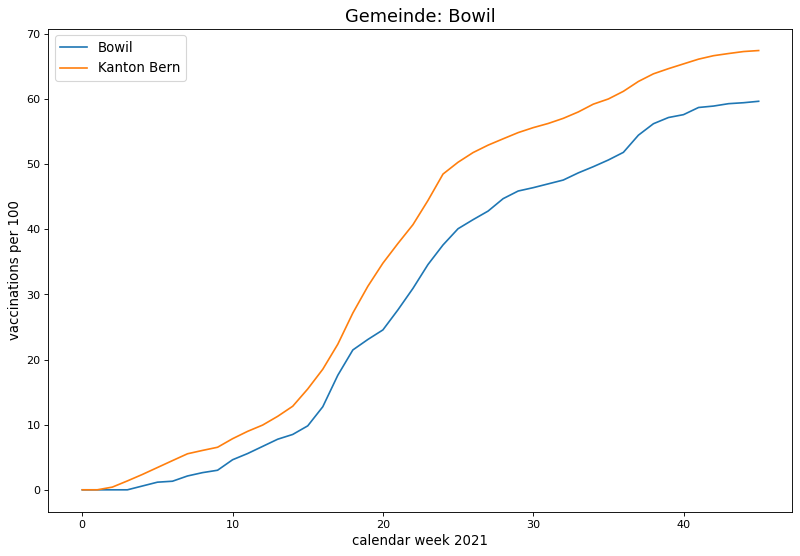

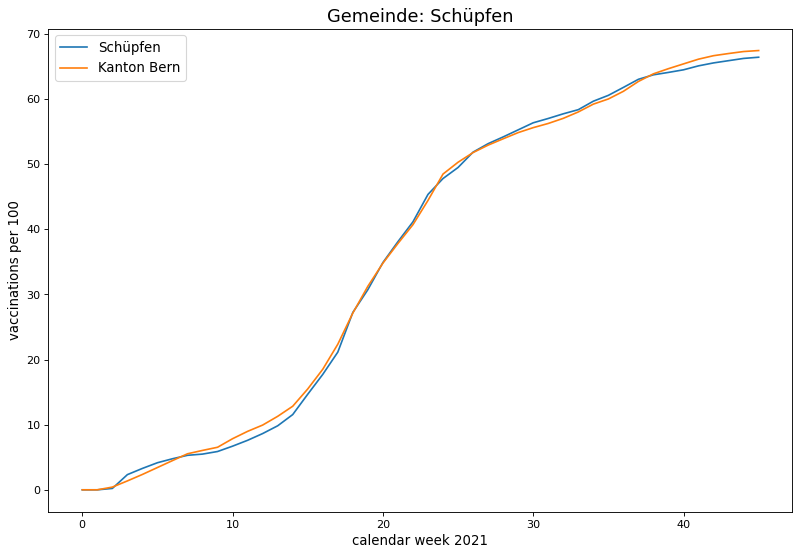

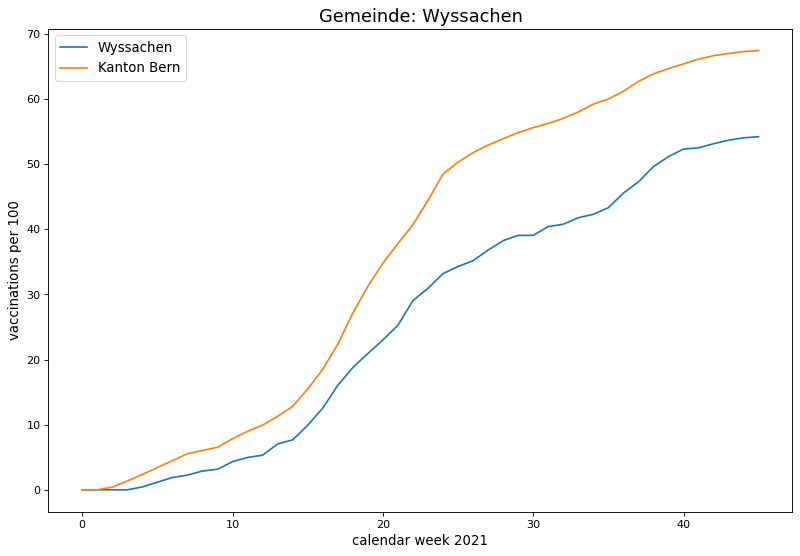

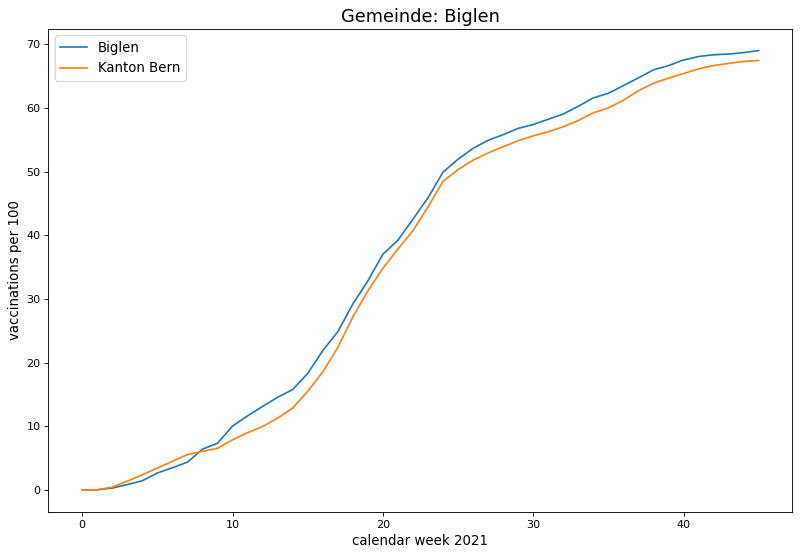

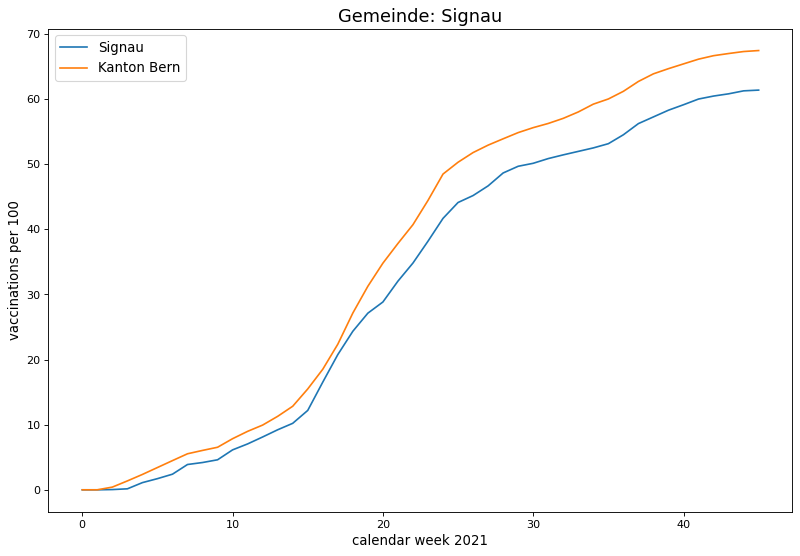

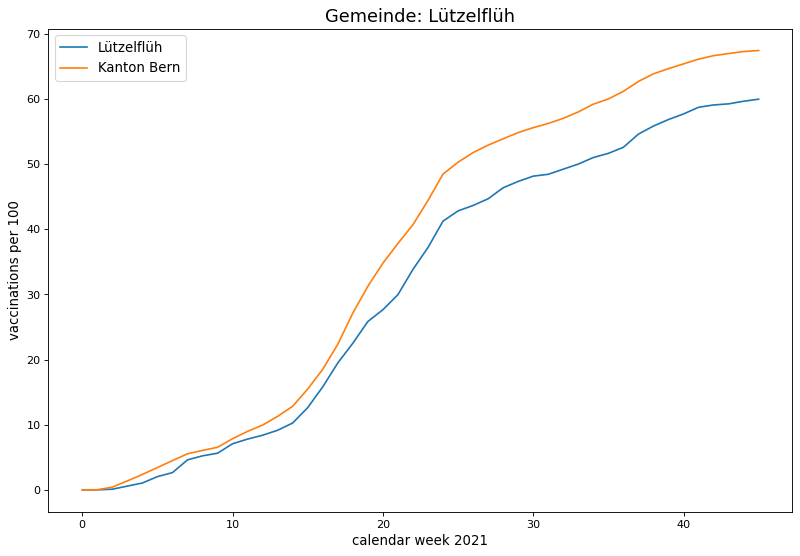

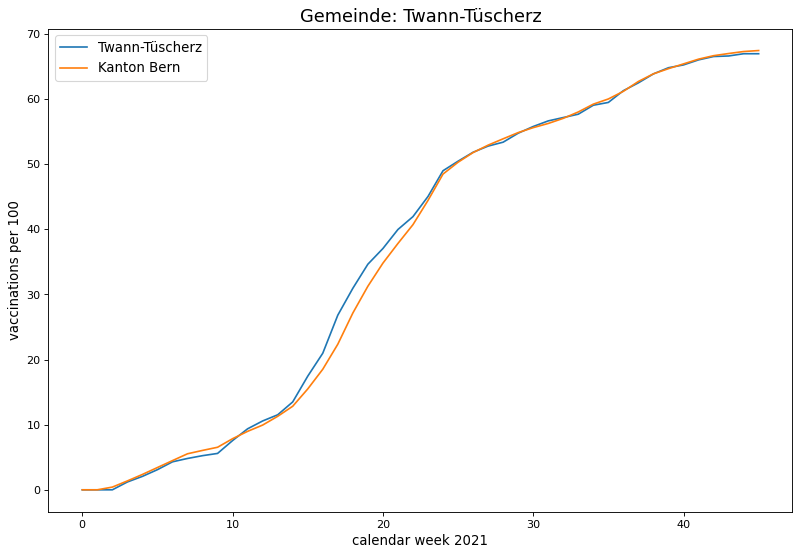

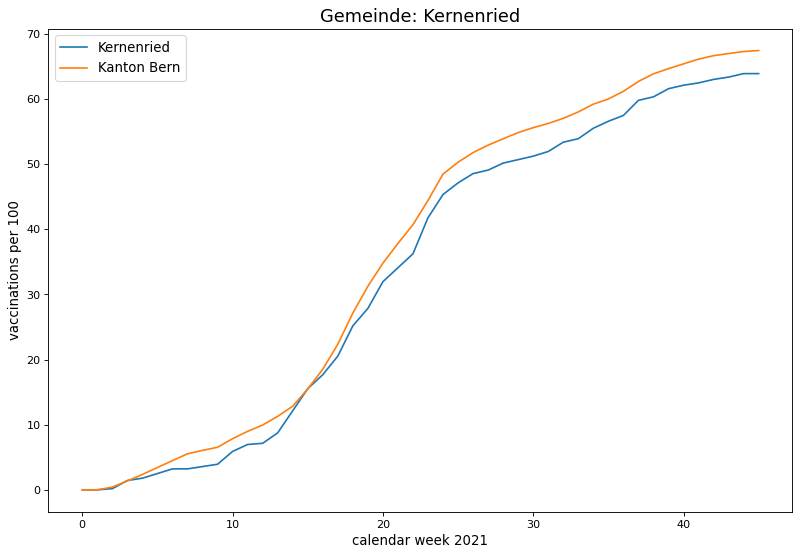

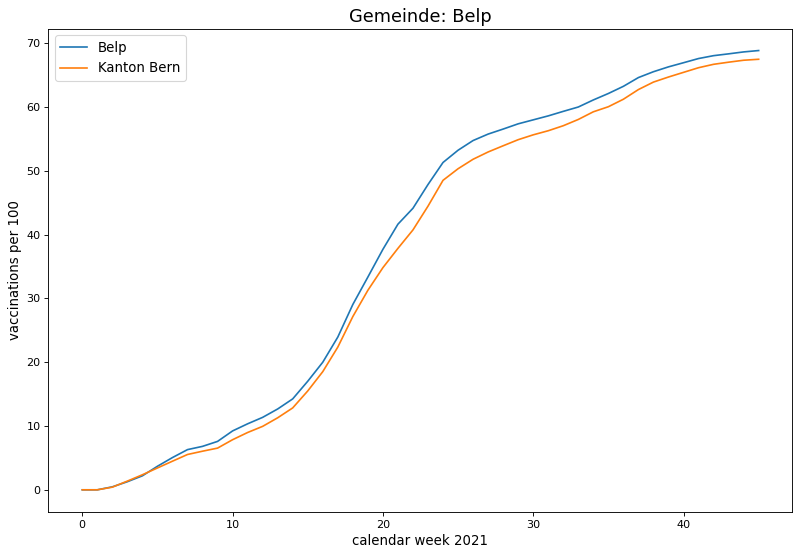

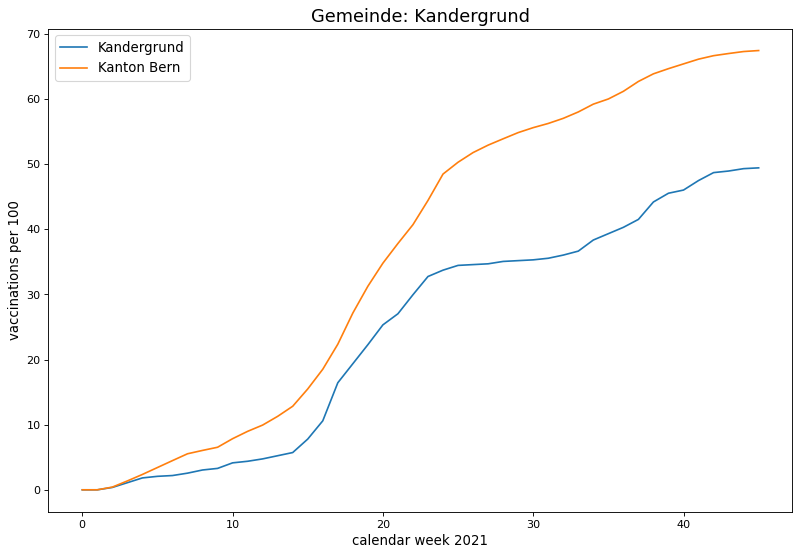

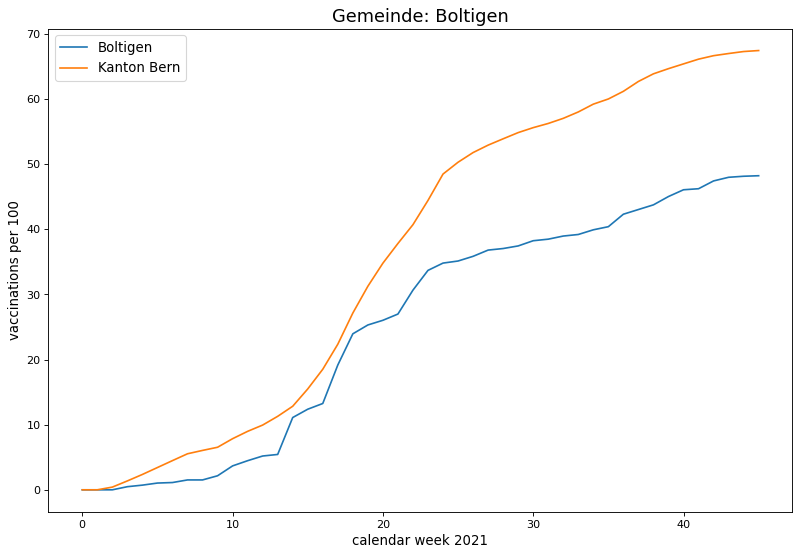

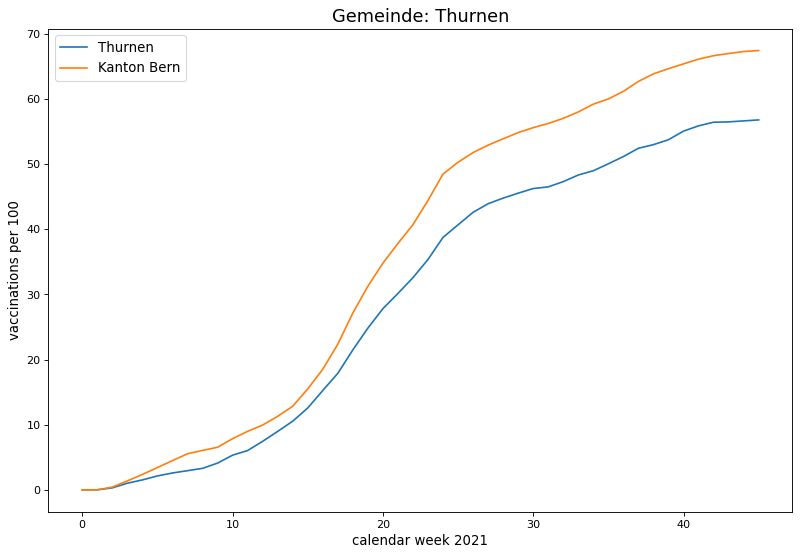

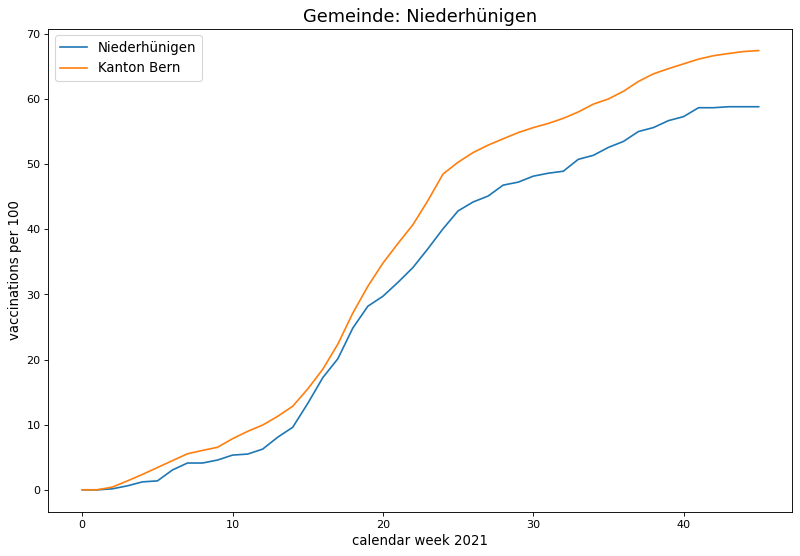

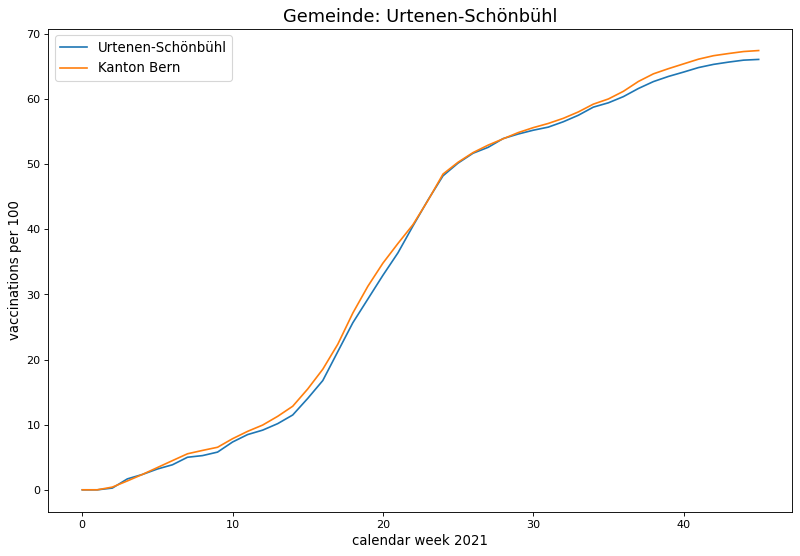

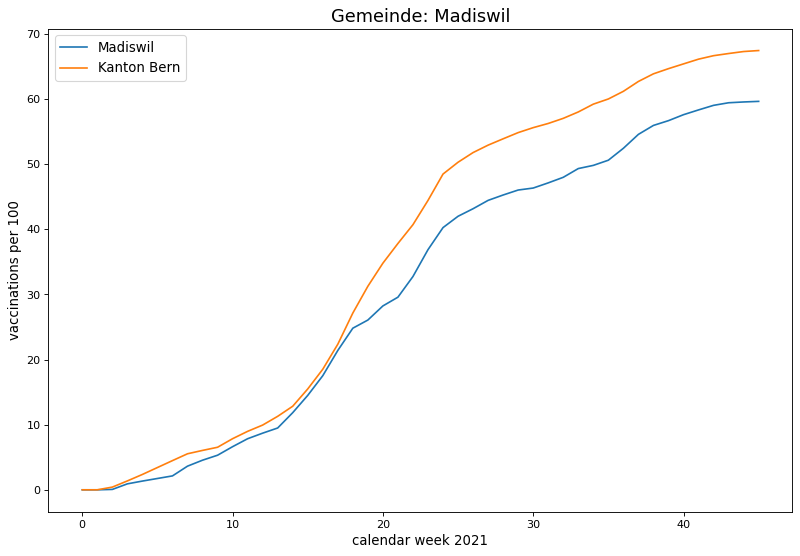

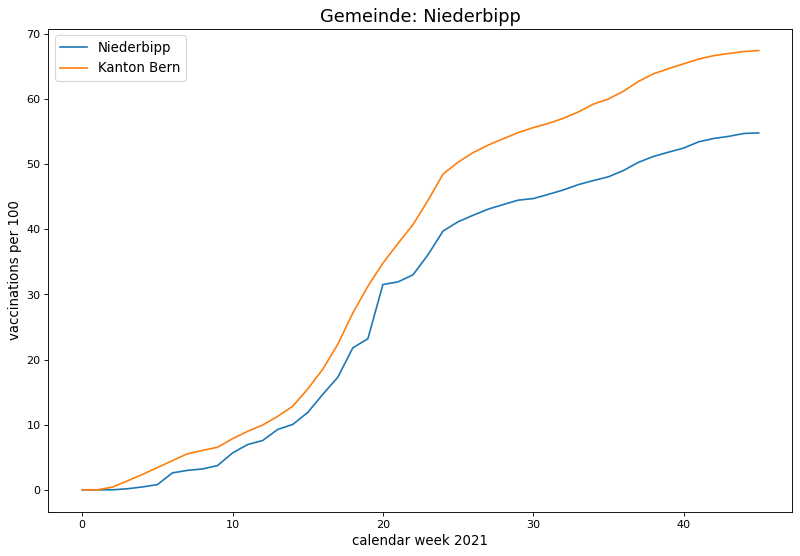

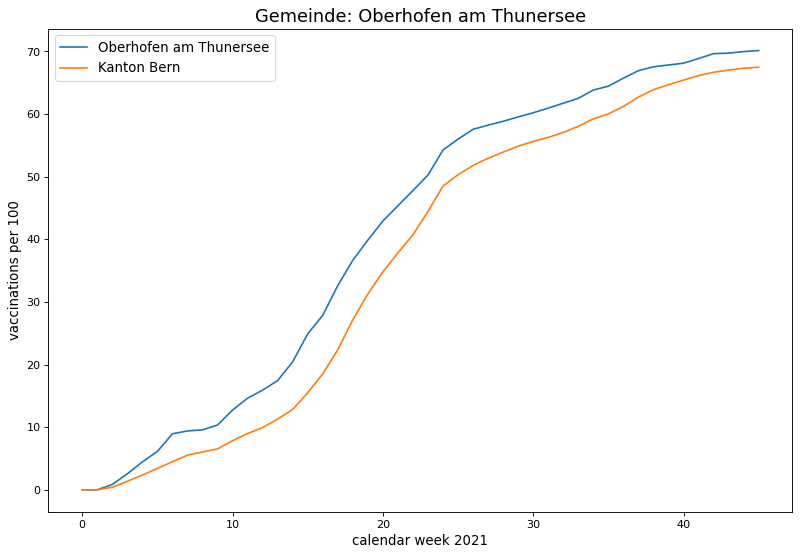

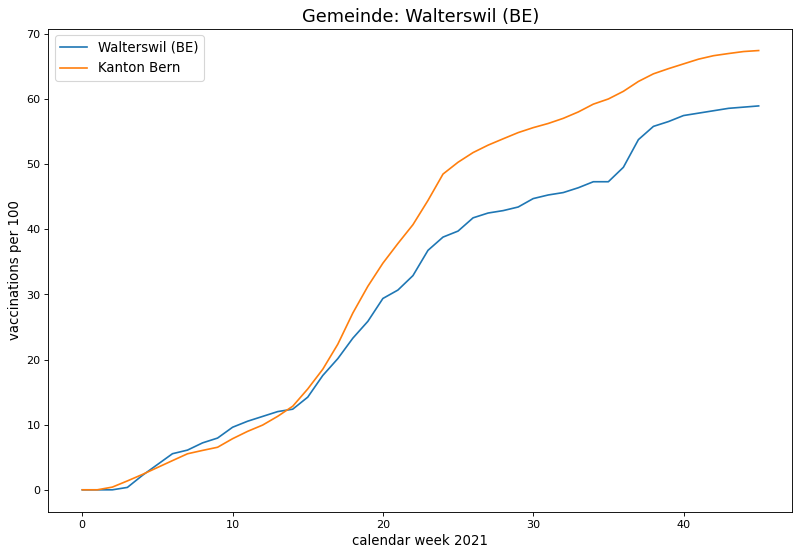

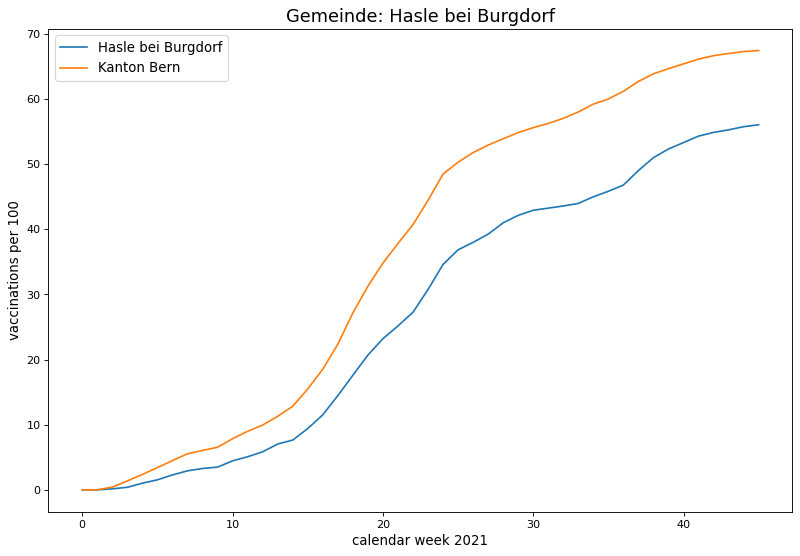

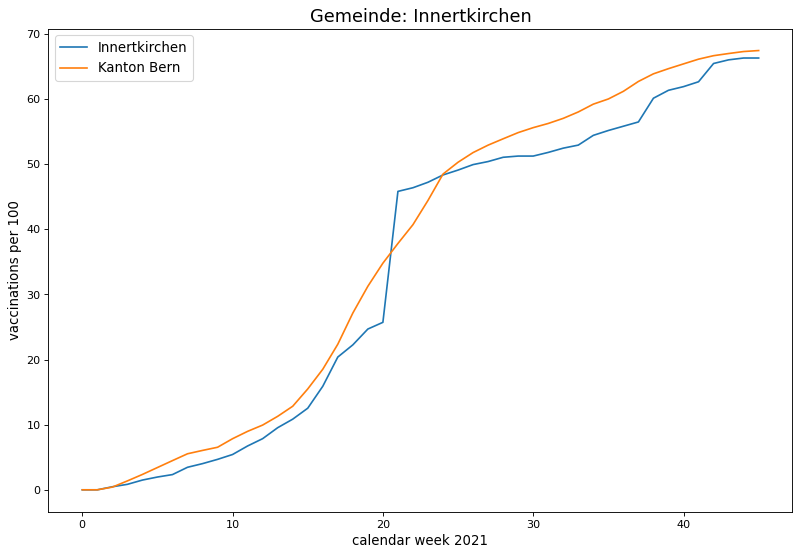

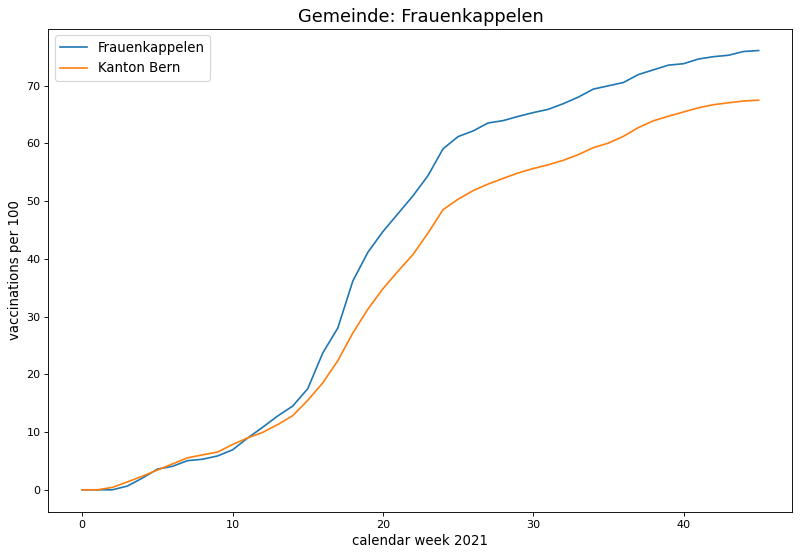

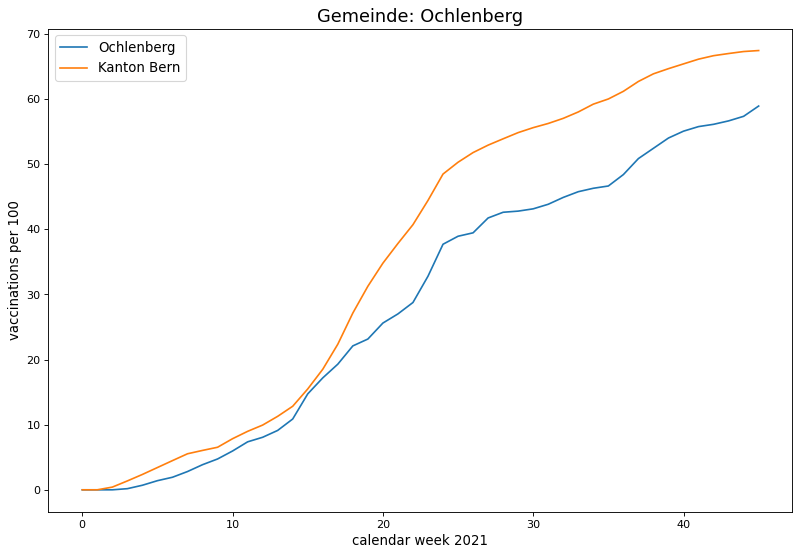

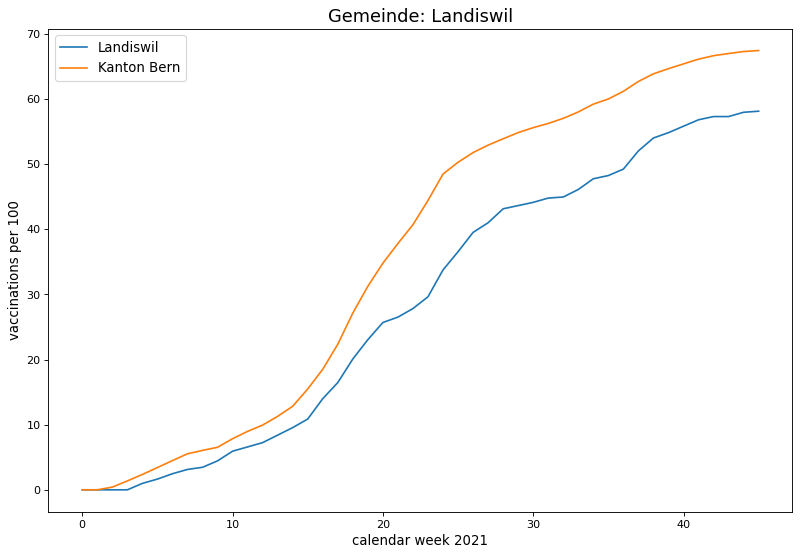

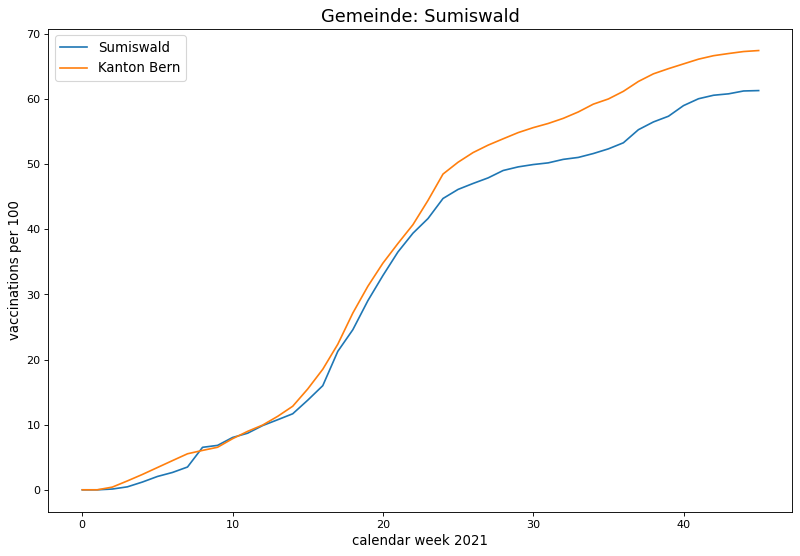

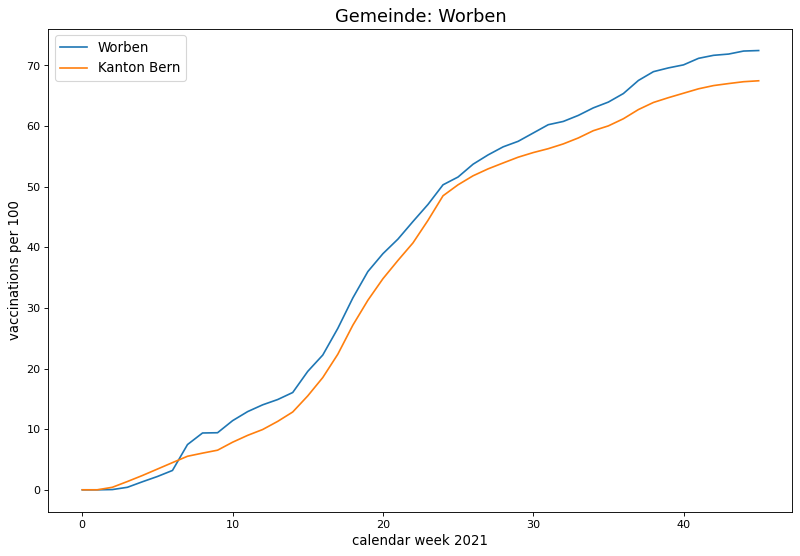

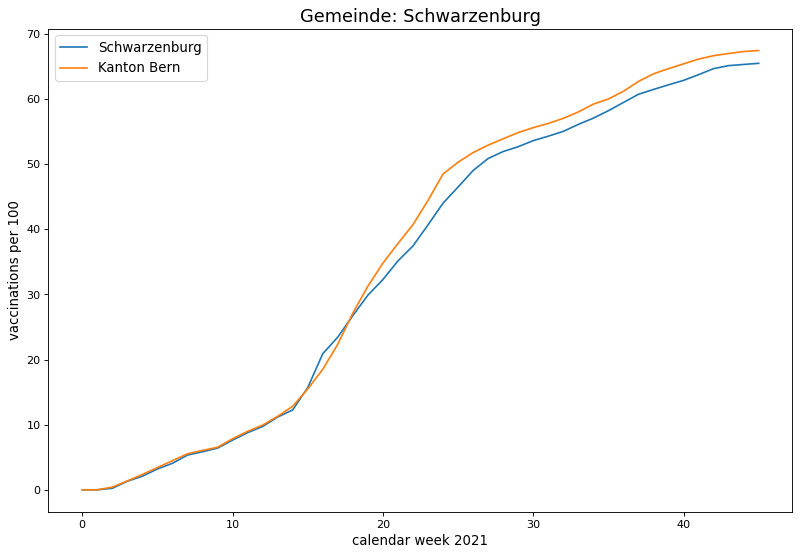

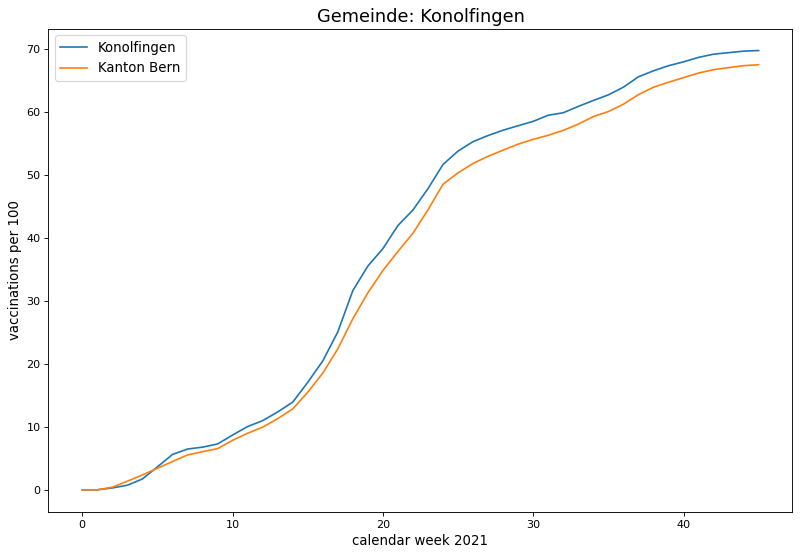

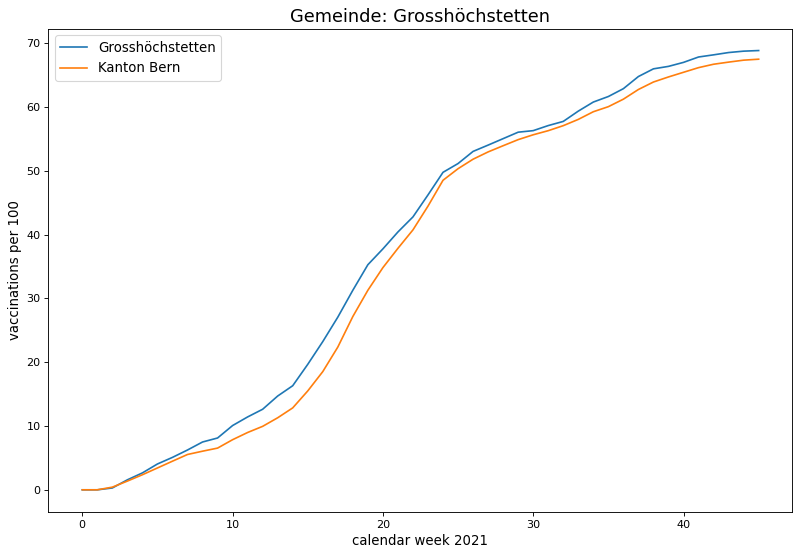

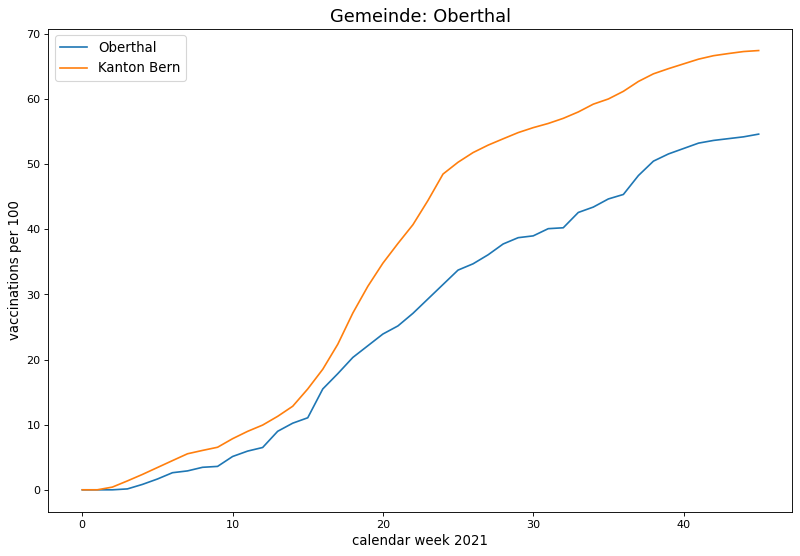

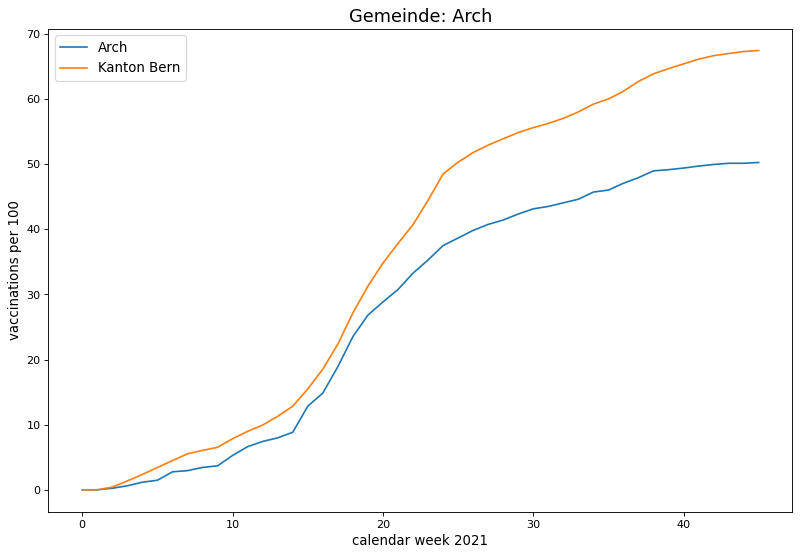

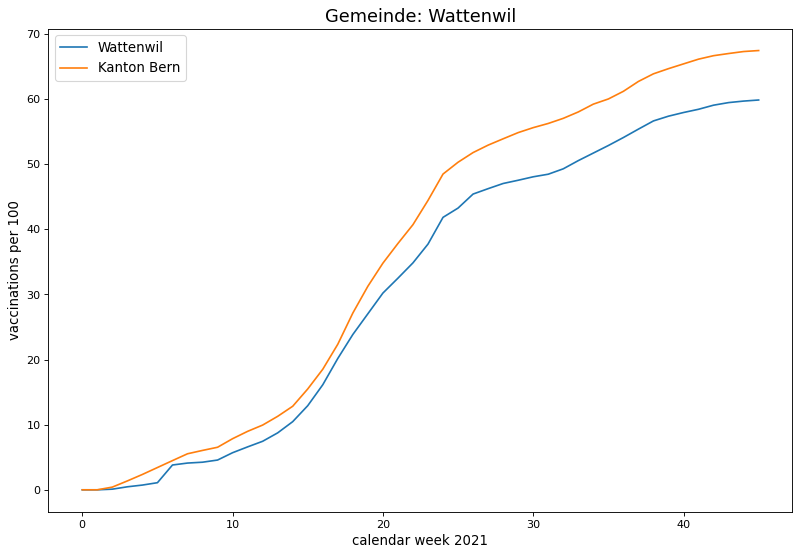

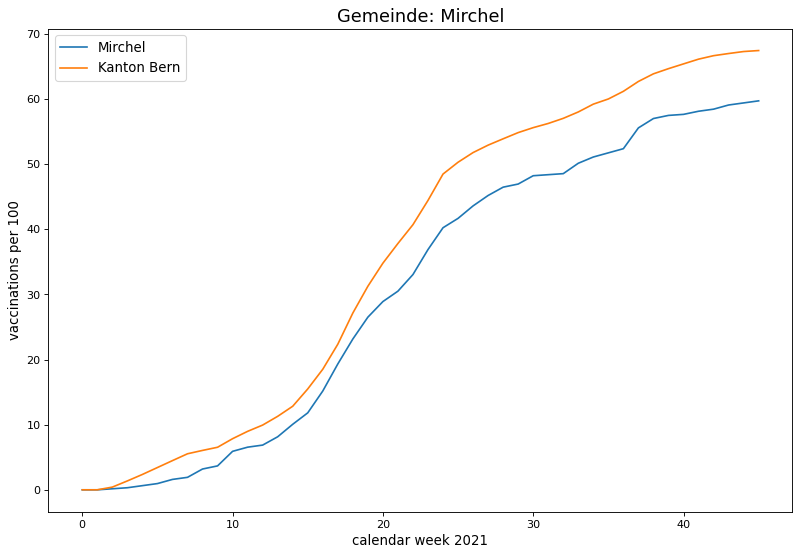

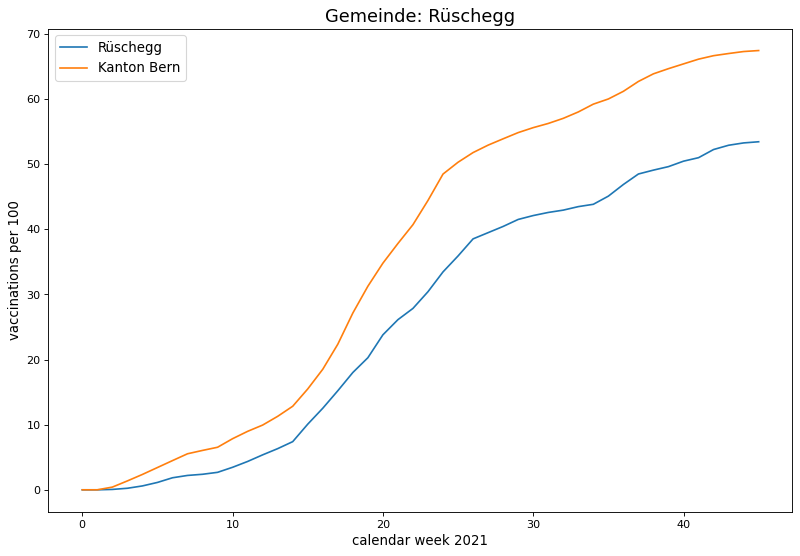

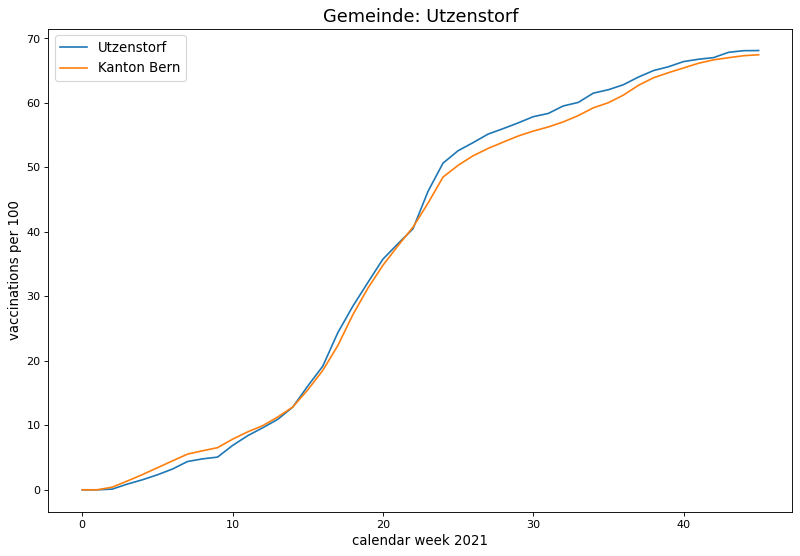

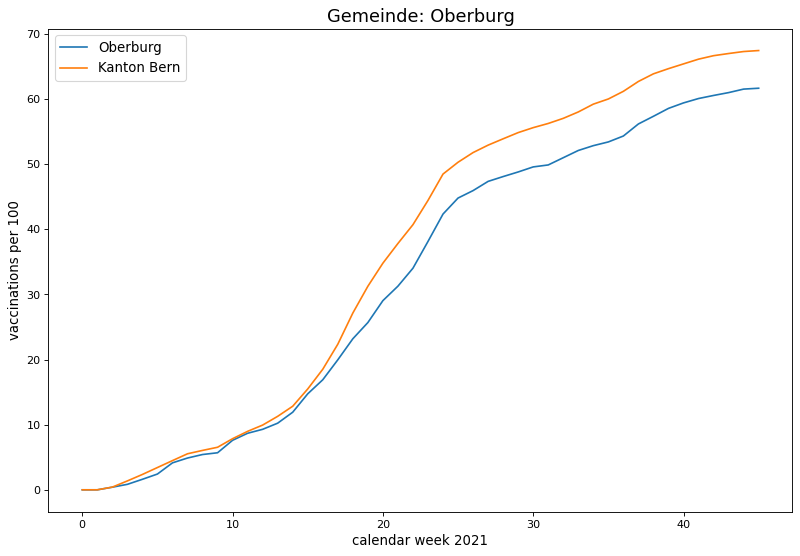

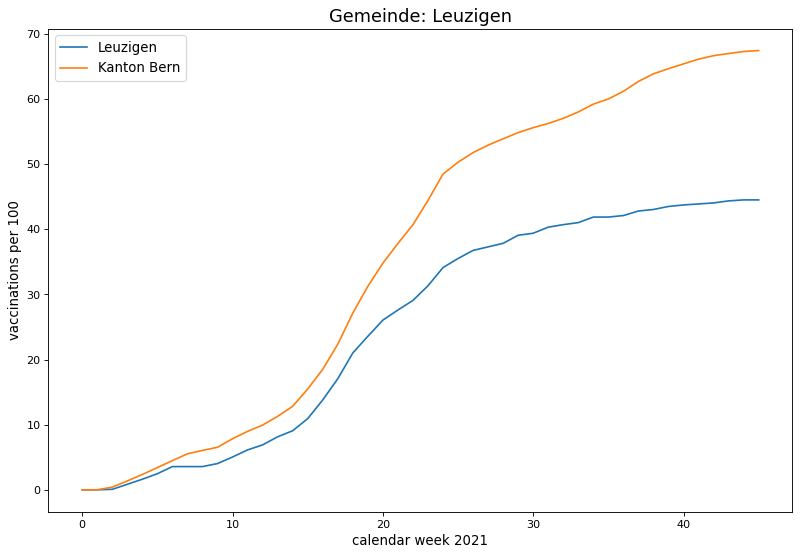

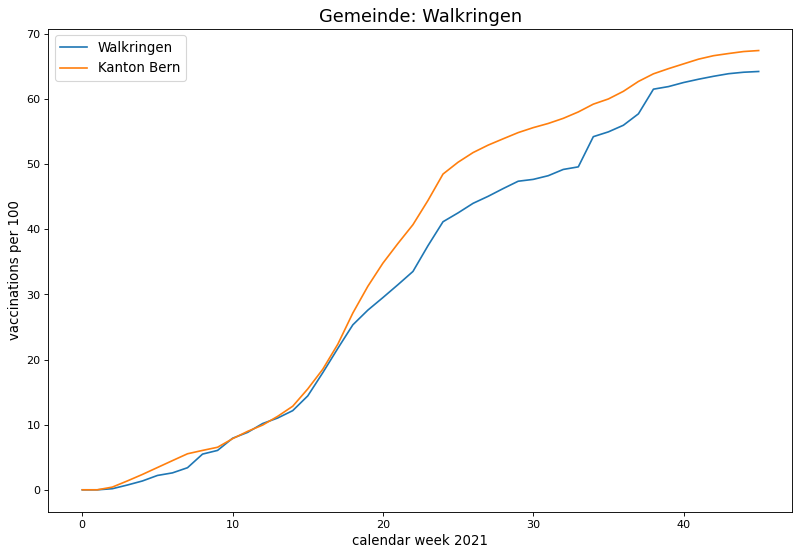

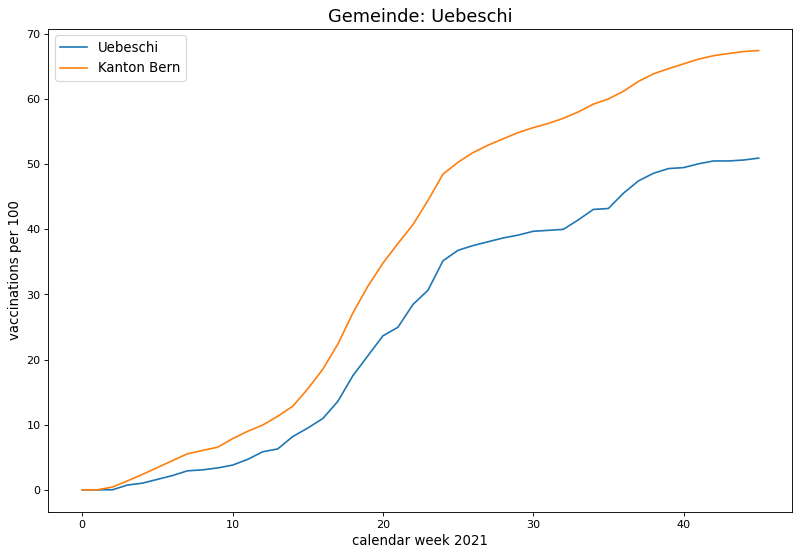

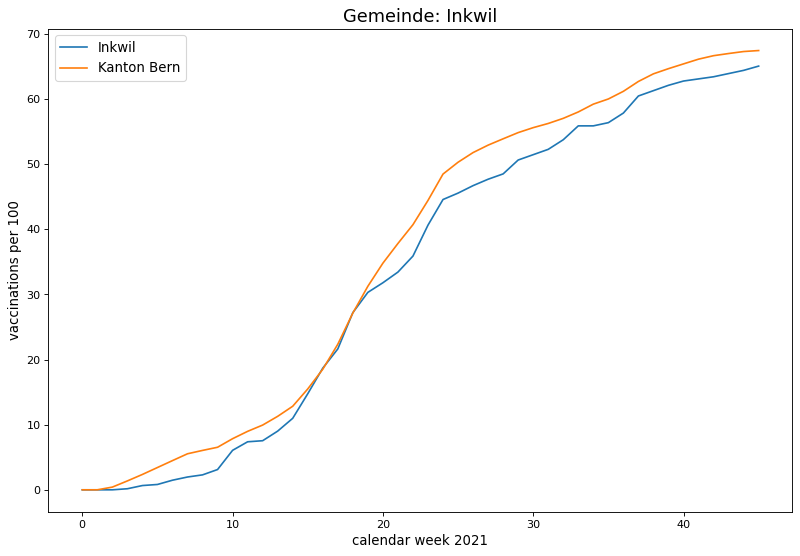

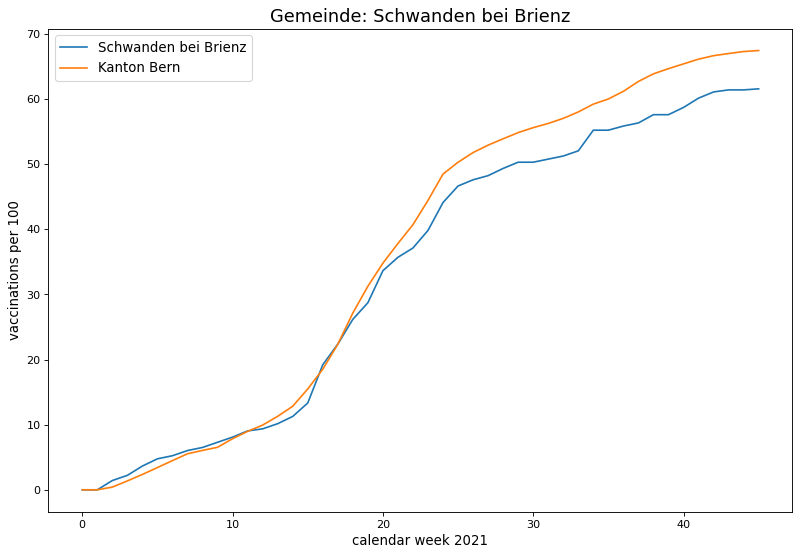

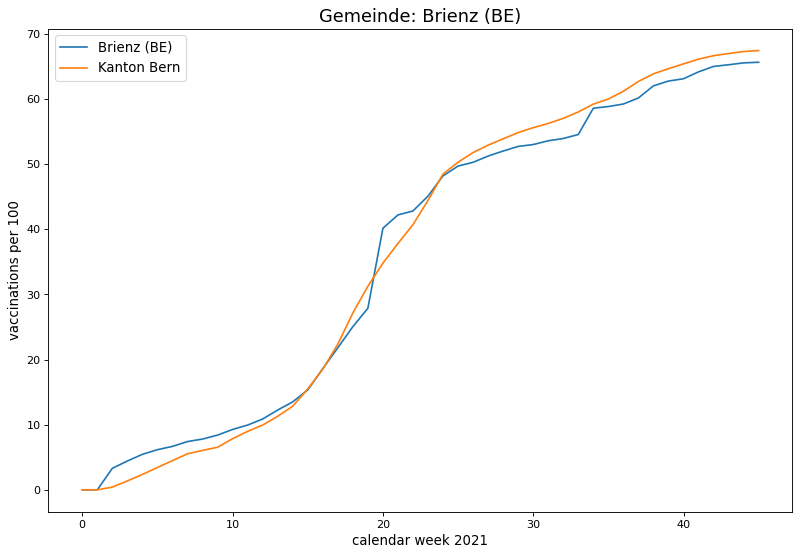

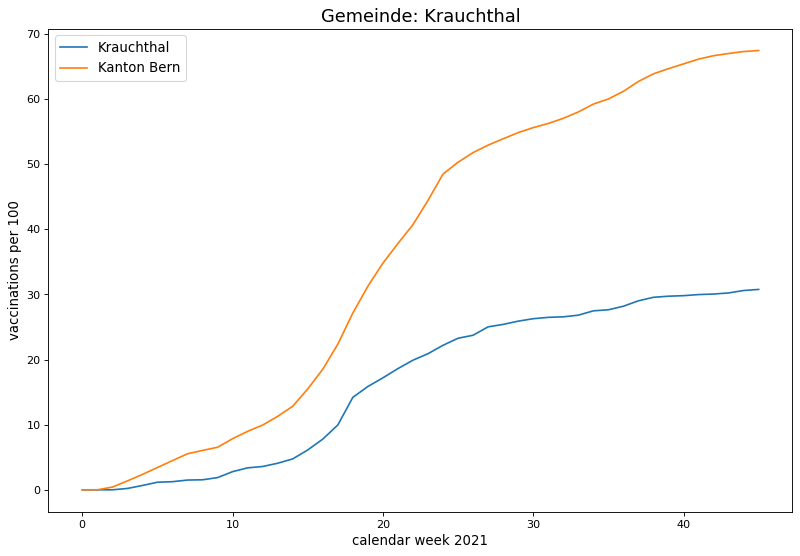

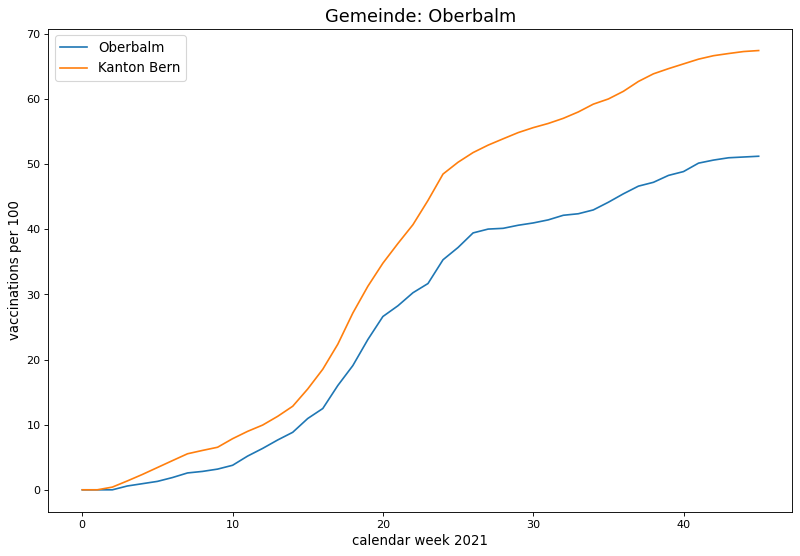

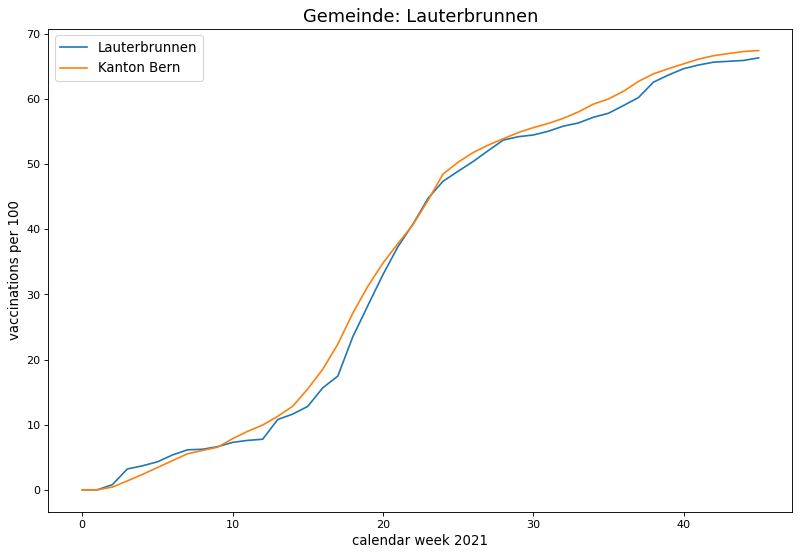

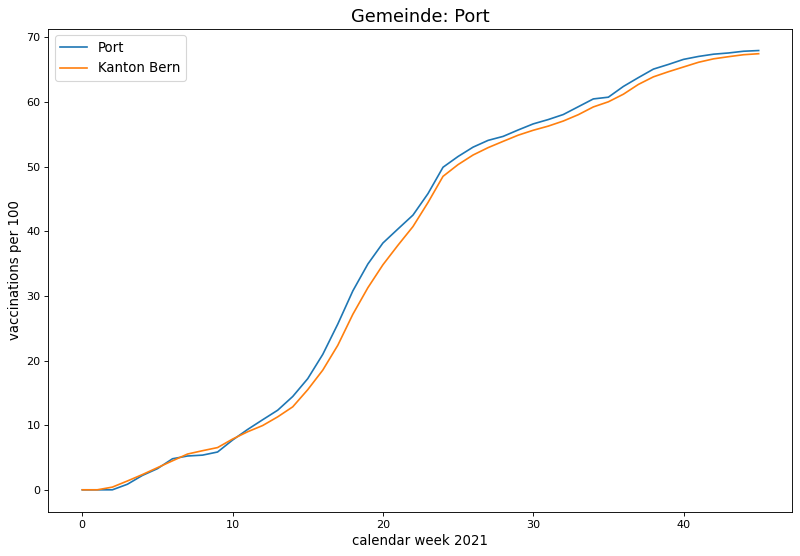

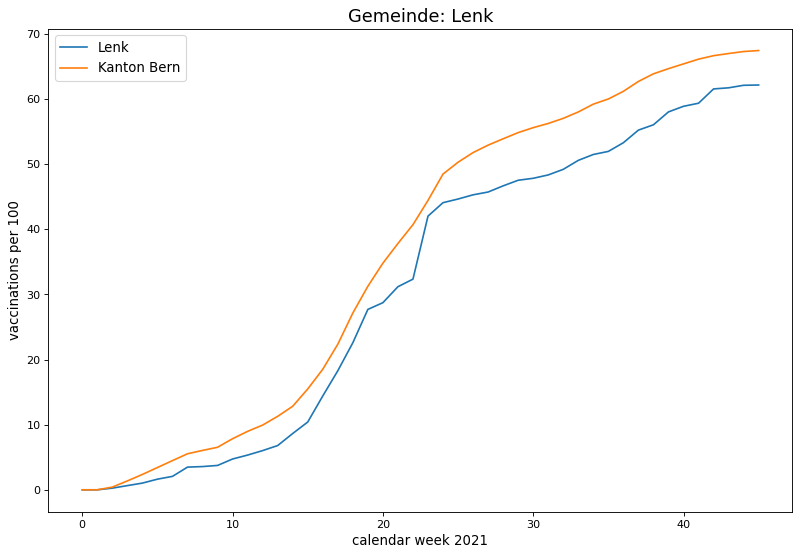

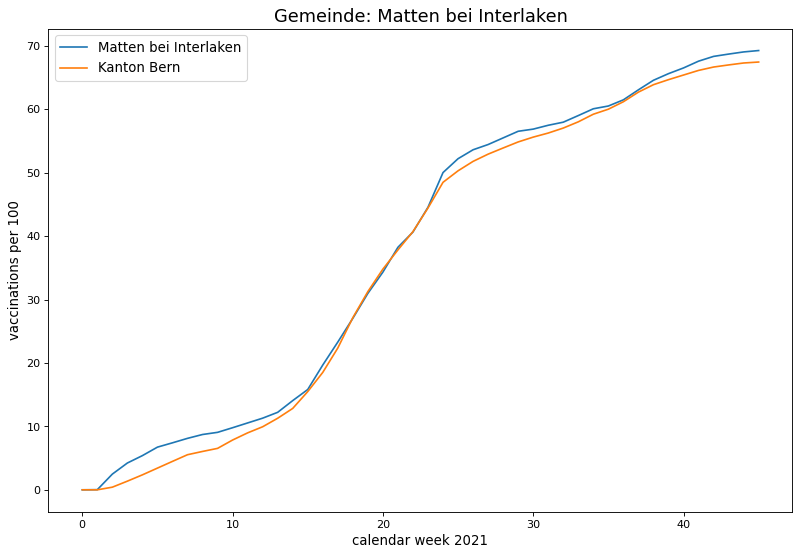

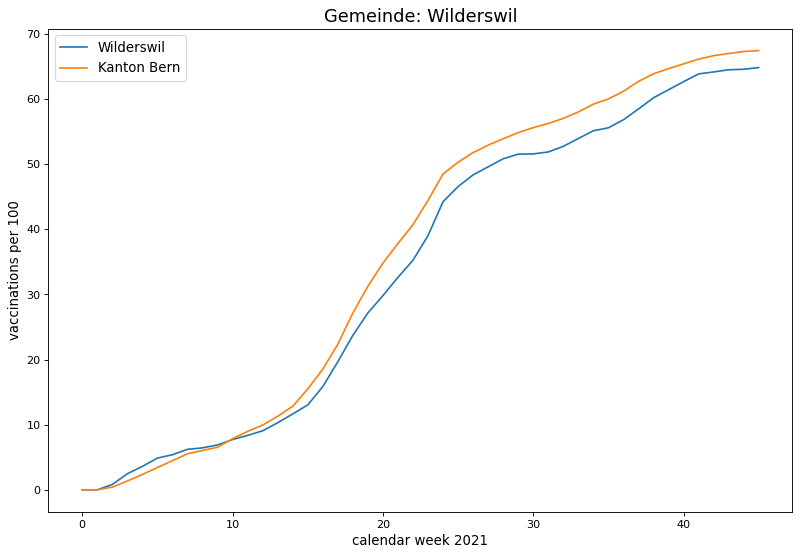

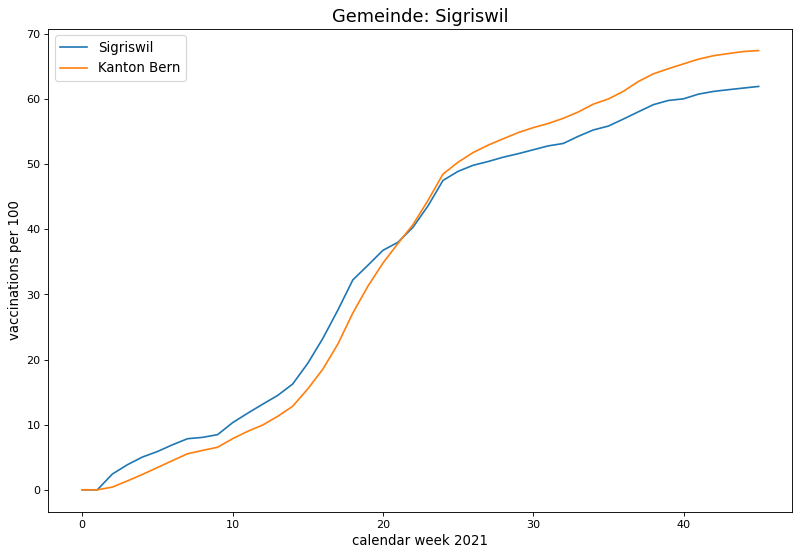

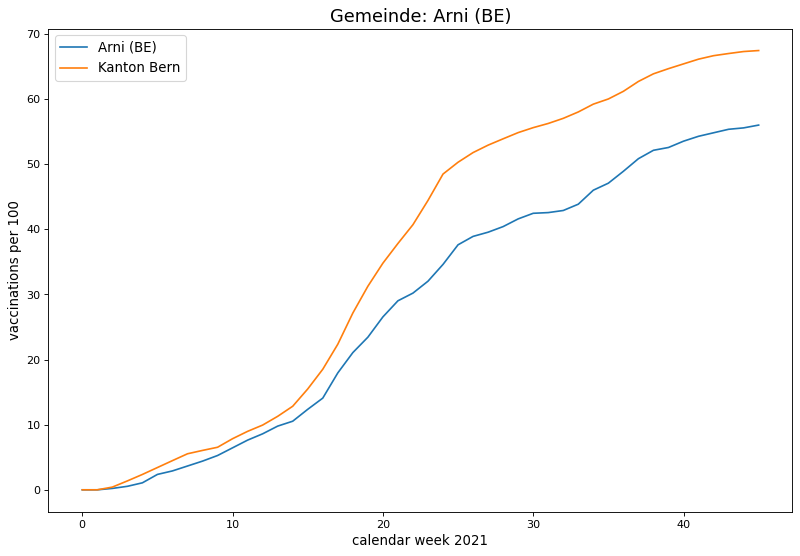

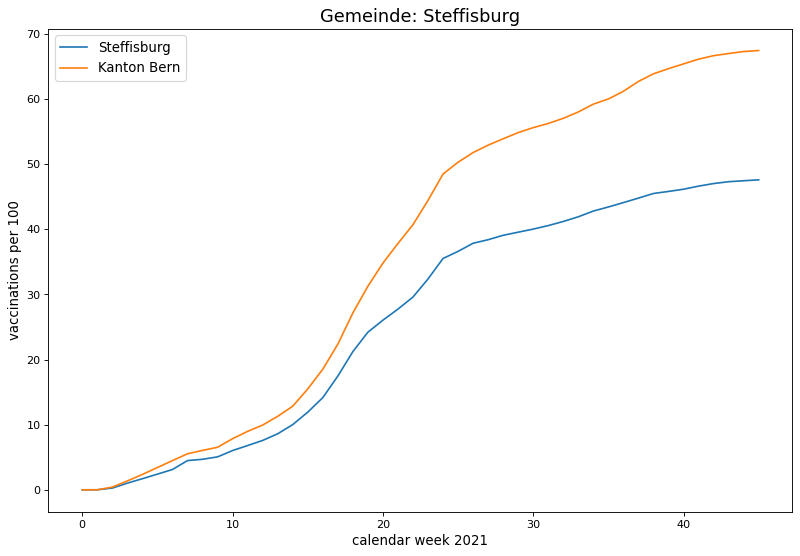

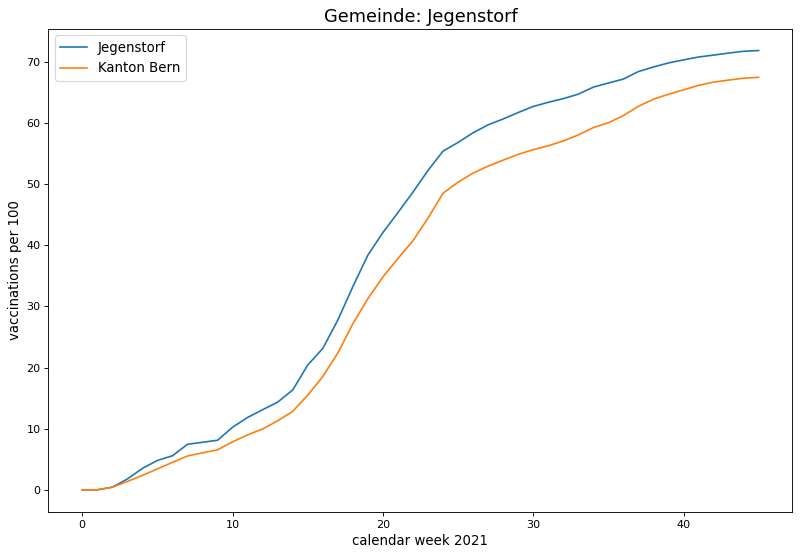

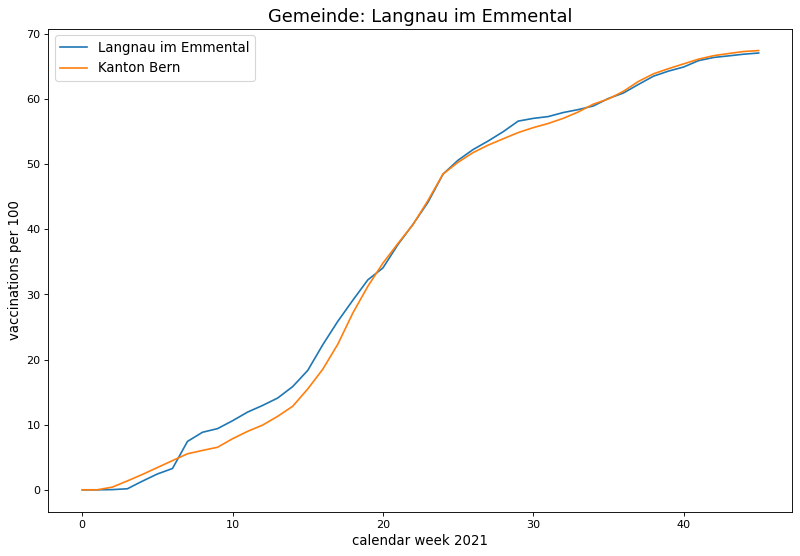

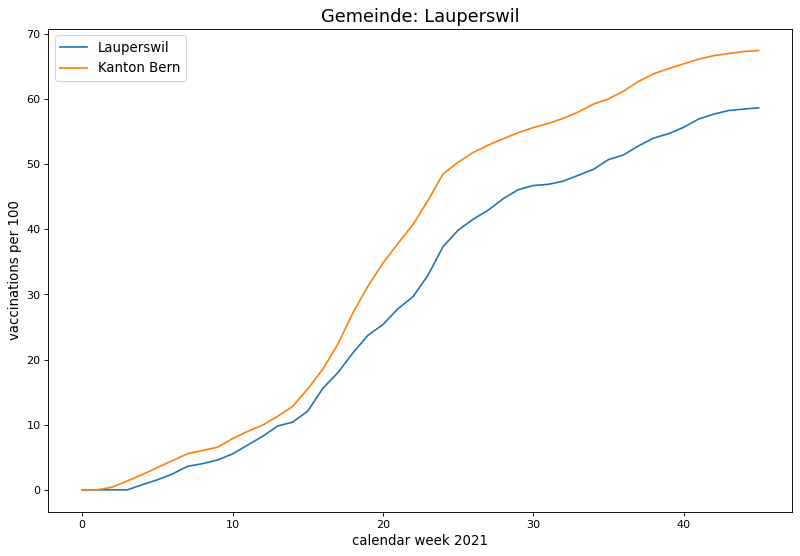

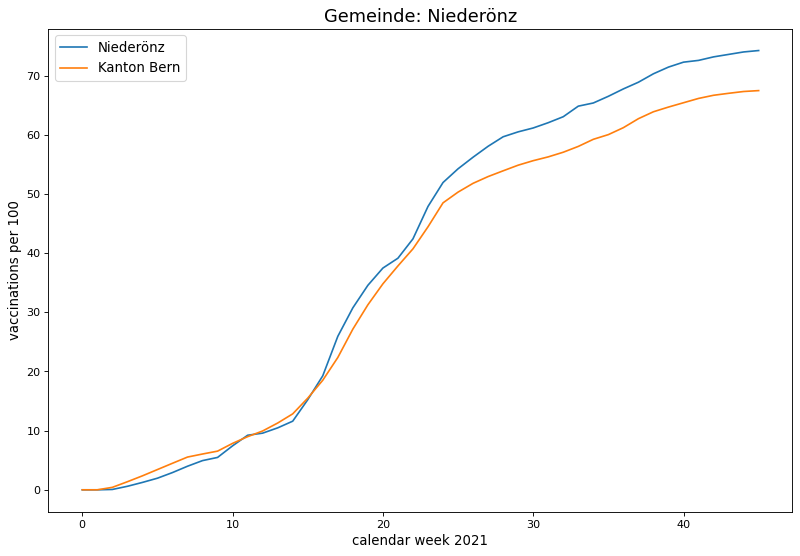

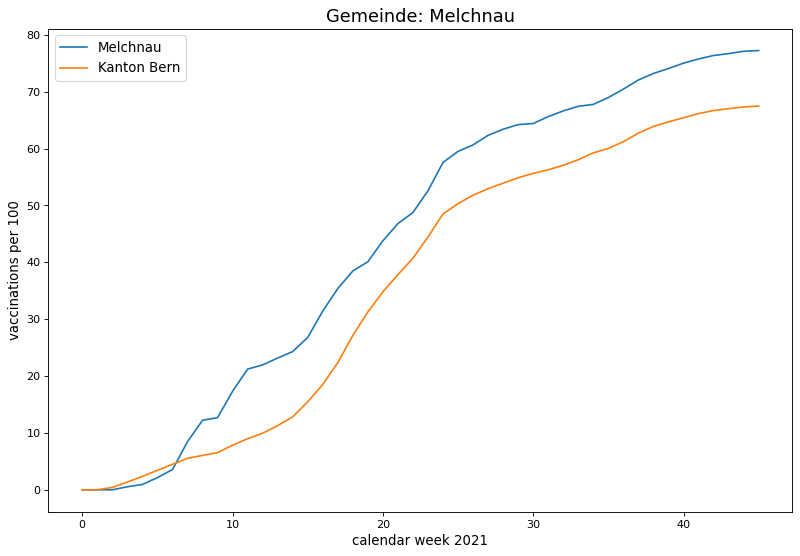

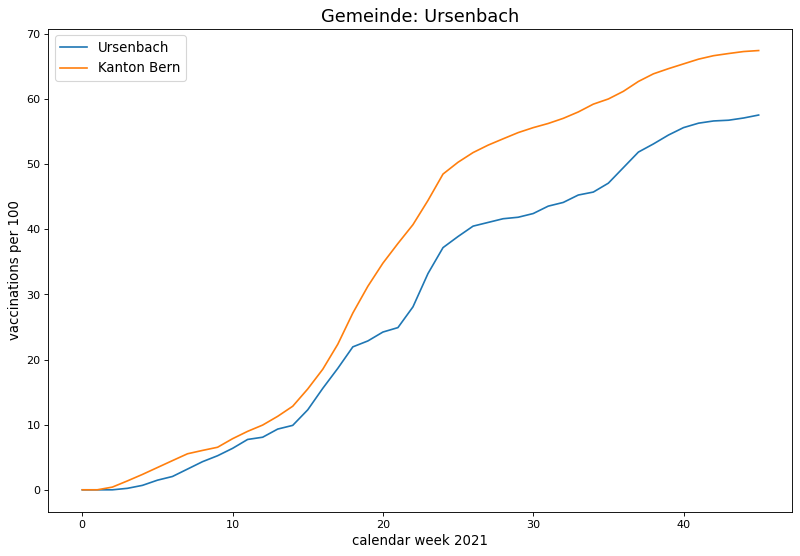

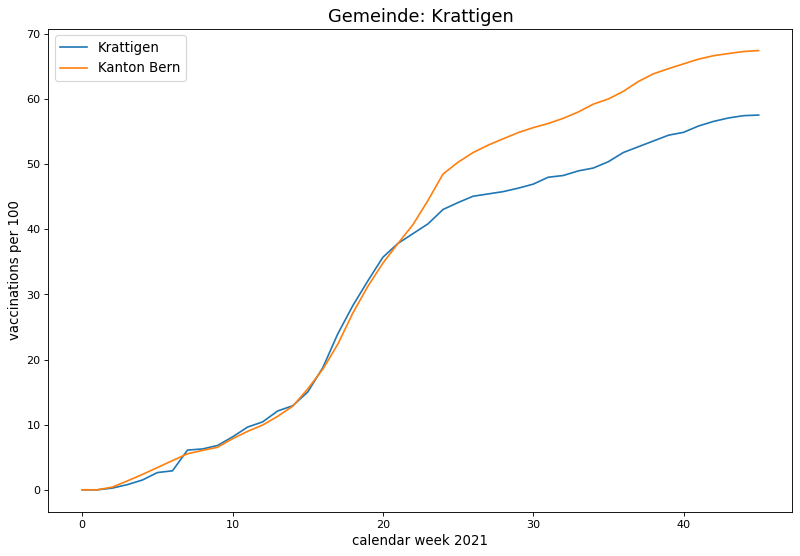

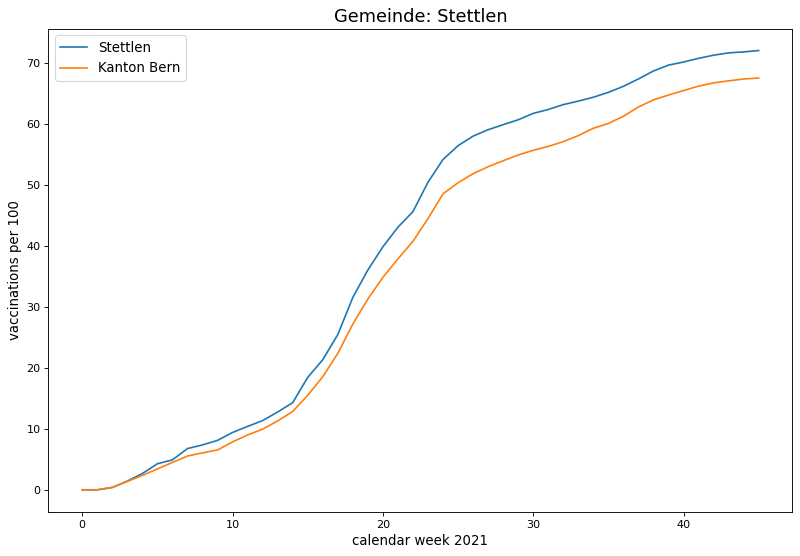

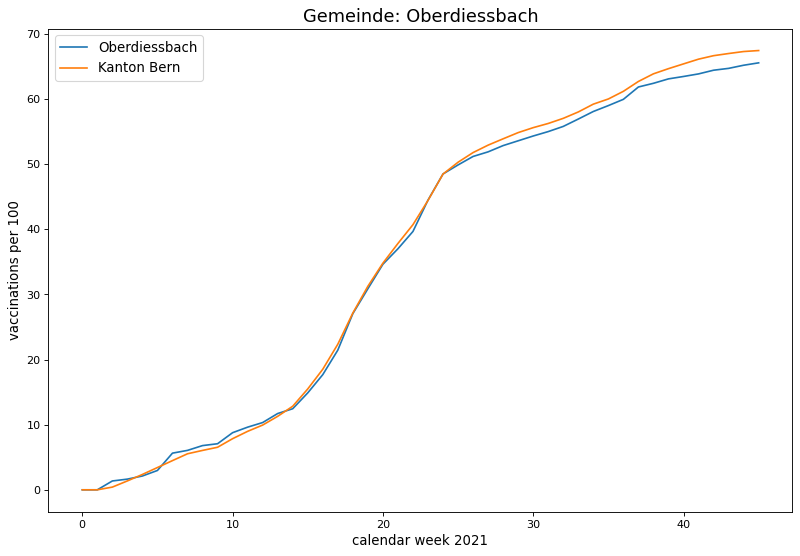

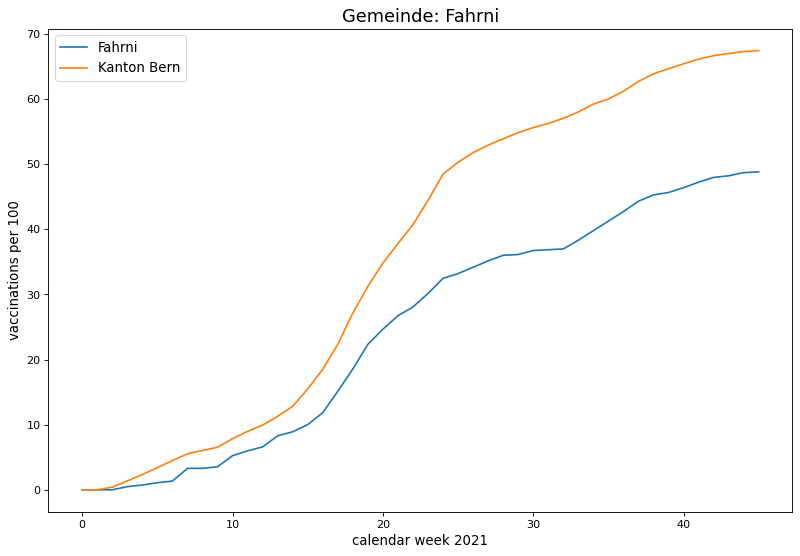

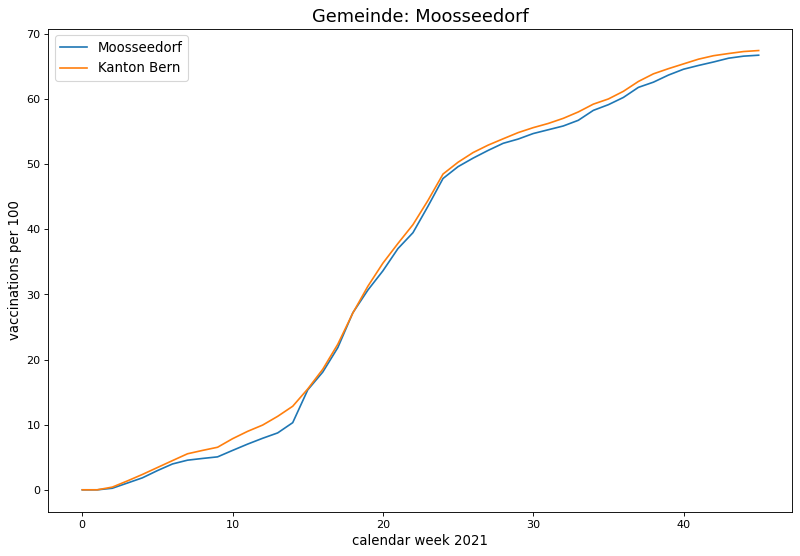

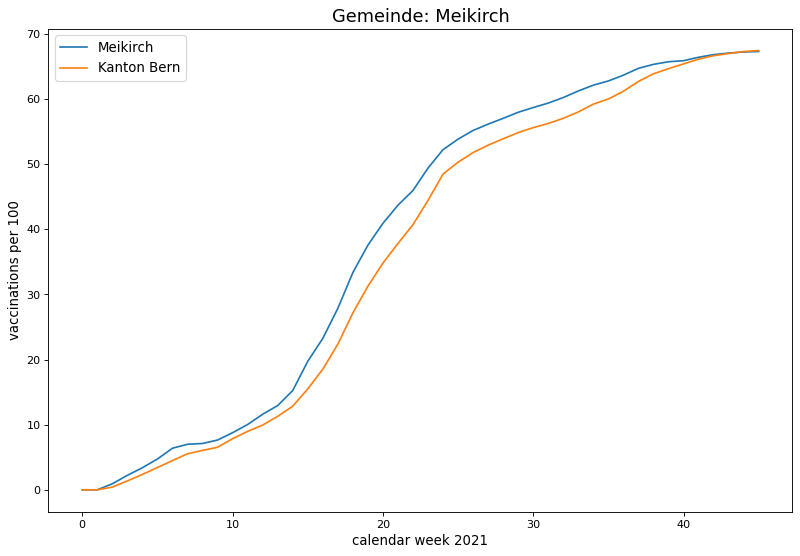

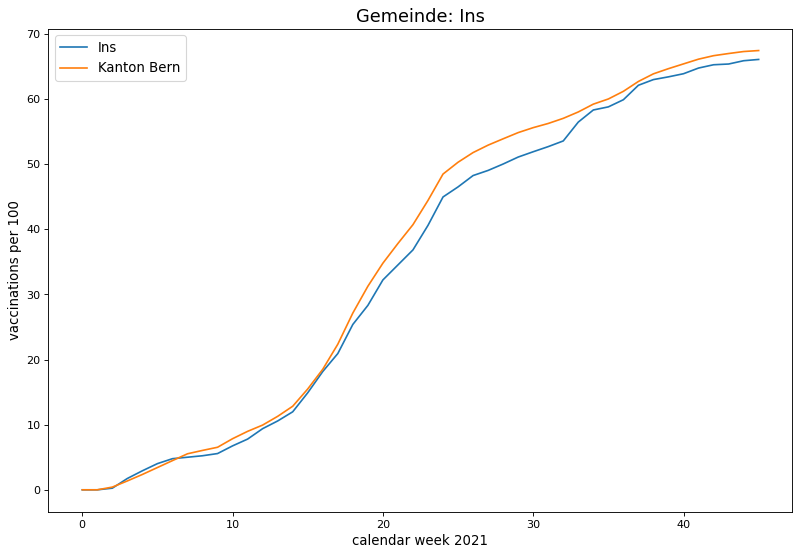

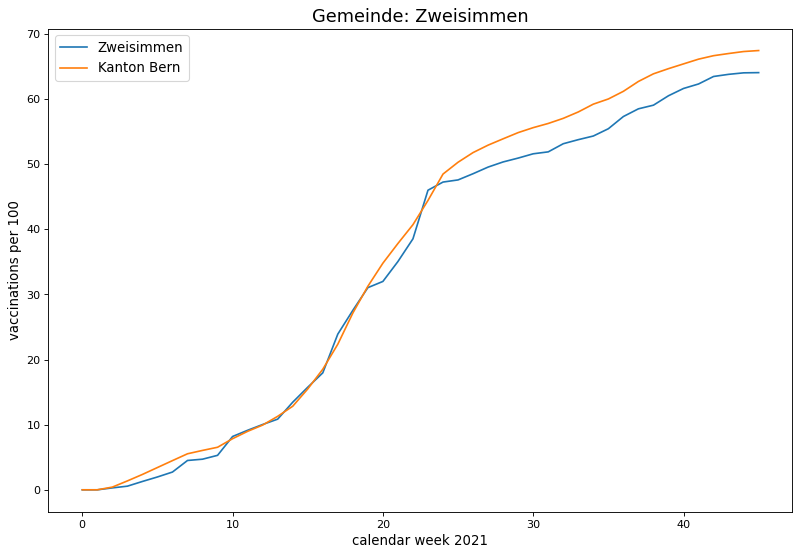

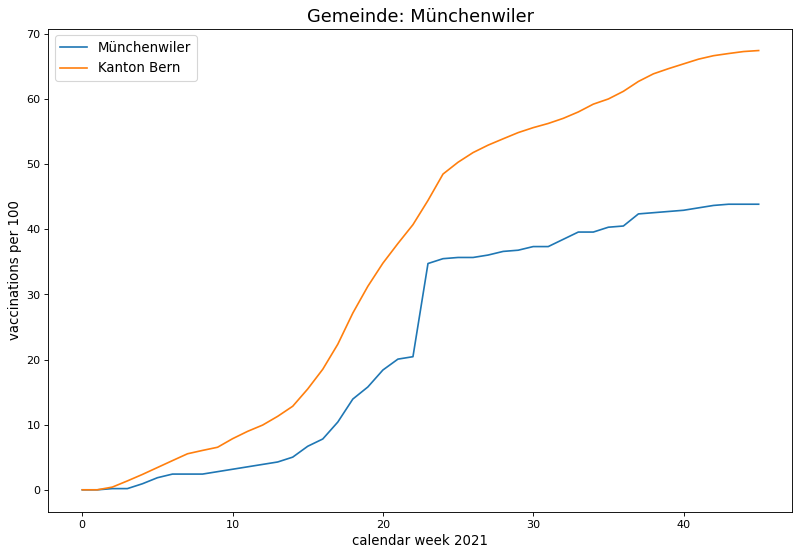

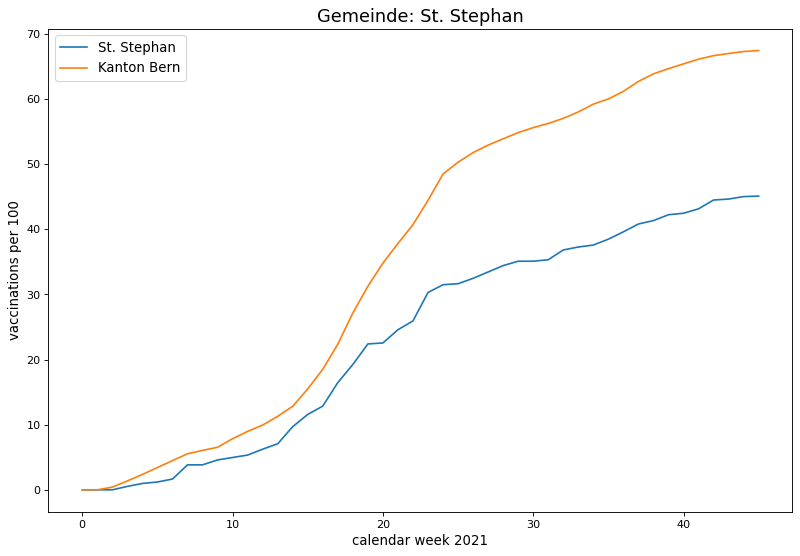

In [57]:
%matplotlib inline
from pylab import *

for community in communities_with_vaccinations:
    figure(figsize=(12, 8), dpi=80)
    plt.plot(stats_cumulative[community].keys(), stats_cumulative[community].values(), label=community)
    plt.plot(stats_cumulative['kanton'].keys(), stats_cumulative['kanton'].values(), label='Kanton Bern')
    plt.title('Gemeinde: ' + community, fontsize=16)
    plt.xlabel('calendar week 2021', fontsize=12)
    plt.ylabel('vaccinations per 100', fontsize=12)
    plt.legend(prop={'size': 12})
    savefig('plots/' + community.replace('/', '-'))